* 데이터 개수가 어느정도 있지만 분류가 잘 안된 레이블 정의
  * 3) 레이블별 토픽모델링
      * ex. H01B 특허들의 토픽모델링 진행 : 토픽 5개가 나왔는데 1개가 너무 뜬금없는 주제야 → 해당 토픽에 해당하는 특허들 때문에 분류가 잘 안되지 않았을까?로 추측해볼 수 있음 → 실제 해당 특허들이 분류 잘 안된 특허들인지 확인해보기! → 만약 진짜 잘 안된 애들이면 이런 특허들을 잘 분류해줄 수 있는 CPC 제안 or 기존 H01B CPC 분류를 수정 / 만약 잘 된 애들이면 노답… 다른 레이블로 넘어가서 확인
  * H02N, H03G, H04Q, H03H, H01B, H04J 확인하기!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터프레임 생성

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Capstone/data/wd(0.005)_lr(1e-5)_raw_epoch6_pred_prob_classification.csv",index_col=0)

true = pd.read_csv("/content/drive/MyDrive/Capstone/data/test_label.csv",index_col=0) 
true.reset_index(inplace=True)
true.drop('index',axis=1,inplace=True)

In [ ]:
pred = pd.read_csv("/content/drive/MyDrive/Capstone/data/wd(0.005)_lr(1e-5)_raw_epoch6_pred_label.csv",index_col=0) 
pred

,patent_abstract_y,H01B,H01C,H01F,H01G,H01H,H01J,H01K,H01L,H01M,...,H04S,H04T,H04W,H05B,H05C,H05F,H05G,H05H,H05K,H99Z
0,A solenoid assembly includes the solenoid arma...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"A portable device includes solid-state memory,...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"A screen plate, a packaging method, a display ...",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,The subject matter discloses a computerized sy...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A vibration wave motor includes a first holdin...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24280,Concepts and technologies are disclosed herein...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24281,A broadband microstrip antenna formed on a pri...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24282,The present disclosure relates to a car audio ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24283,The present invention relates to a computer-im...,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
true['GoodBad'] = 0

# 분류 잘 안 된 특허 'GoodBad' 열의 값 1로 변경
no = data[data['classification']==1]
true.loc[no.index,'GoodBad'] = 1
true

,patent_abstract_y,H01B,H01C,H01F,H01G,H01H,H01J,H01K,H01L,H01M,...,H04T,H04W,H05B,H05C,H05F,H05G,H05H,H05K,H99Z,GoodBad
0,A solenoid assembly includes the solenoid arma...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,"A portable device includes solid-state memory,...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,"A screen plate, a packaging method, a display ...",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,The subject matter discloses a computerized sy...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A vibration wave motor includes a first holdin...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24280,Concepts and technologies are disclosed herein...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24281,A broadband microstrip antenna formed on a pri...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24282,The present disclosure relates to a car audio ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24283,The present invention relates to a computer-im...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
pre = pd.read_csv("/content/drive/MyDrive/Capstone/data/data_preprocess_final.csv", index_col = 0)
pre

,patent_number,patent_abstract,stopwords_after,pos_tag,NN,lemmatization
0,10524408,The present disclosure includes an agricultura...,"['present', 'disclosure', 'includes', 'agricul...","[('present', 'JJ'), ('disclosure', 'NN'), ('in...","['disclosure', 'system', 'product', 'meters', ...","['disclosure', 'system', 'product', 'meter', '..."
1,10524426,A method of stimulating plant growth in a cont...,"['method', 'stimulating', 'plant', 'growth', '...","[('method', 'NN'), ('stimulating', 'NN'), ('pl...","['method', 'stimulating', 'plant', 'growth', '...","['method', 'stimulating', 'plant', 'growth', '..."
2,10524504,"An exemplary atomizer includes a shell, a liqu...","['exemplary', 'atomizer', 'includes', 'shell',...","[('exemplary', 'JJ'), ('atomizer', 'NN'), ('in...","['atomizer', 'supply', 'shell', 'supply', 'tob...","['atomizer', 'supply', 'shell', 'supply', 'tob..."
3,10524505,An electronic vaping device includes a cartomi...,"['electronic', 'vaping', 'device', 'includes',...","[('electronic', 'JJ'), ('vaping', 'VBG'), ('de...","['device', 'battery', 'section', 'cartomizer',...","['device', 'battery', 'section', 'cartomizer',..."
4,10524508,An aerosol delivery device is provided that in...,"['aerosol', 'delivery', 'device', 'provided', ...","[('aerosol', 'JJ'), ('delivery', 'NN'), ('devi...","['delivery', 'device', 'substrate', 'aerosol',...","['delivery', 'device', 'substrate', 'aerosol',..."
...,...,...,...,...,...,...
242838,11212947,A module having a power semiconductor device a...,"['module', 'power', 'semiconductor', 'device',...","[('module', 'NN'), ('power', 'NN'), ('semicond...","['module', 'power', 'semiconductor', 'device',...","['module', 'power', 'semiconductor', 'device',..."
242839,11212948,A thermal management system for tightly contro...,"['thermal', 'management', 'system', 'tightly',...","[('thermal', 'JJ'), ('management', 'NN'), ('sy...","['management', 'system', 'temperature', 'load'...","['management', 'system', 'temperature', 'load'..."
242840,11212949,A solid state drive device is provided. The so...,"['solid', 'state', 'drive', 'device', 'provide...","[('solid', 'JJ'), ('state', 'NN'), ('drive', '...","['state', 'drive', 'device', 'state', 'drive',...","['state', 'drive', 'device', 'state', 'drive',..."
242841,11212950,A support pin arrangement determination assist...,"['support', 'pin', 'arrangement', 'determinati...","[('support', 'NN'), ('pin', 'NN'), ('arrangeme...","['support', 'pin', 'arrangement', 'determinati...","['support', 'pin', 'arrangement', 'determinati..."


In [ ]:
df = true[['patent_abstract_y', 'H02N','H03G', 'H04Q', 'H03H', 'H01B', 'H04J', 'GoodBad']]
df['lemmatization'] = ''
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,patent_abstract_y,H02N,H03G,H04Q,H03H,H01B,H04J,GoodBad,lemmatization
0,A solenoid assembly includes the solenoid arma...,0,0,0,0,0,0,1,
1,"A portable device includes solid-state memory,...",0,0,0,0,0,0,1,
2,"A screen plate, a packaging method, a display ...",0,0,0,0,0,0,1,
3,The subject matter discloses a computerized sy...,0,0,0,0,0,0,0,
4,A vibration wave motor includes a first holdin...,1,0,0,0,0,0,1,
...,...,...,...,...,...,...,...,...,...
24280,Concepts and technologies are disclosed herein...,0,0,0,0,0,0,0,
24281,A broadband microstrip antenna formed on a pri...,0,0,0,0,0,0,0,
24282,The present disclosure relates to a car audio ...,0,0,0,0,0,0,1,
24283,The present invention relates to a computer-im...,0,0,0,0,0,0,1,


In [ ]:
from tqdm import tqdm
patent_abstract_list = true['patent_abstract_y'].values.tolist()
for i in tqdm(range(len(patent_abstract_list))):
  value = pre.loc[pre['patent_abstract'] == patent_abstract_list[i],'lemmatization']
  df.loc[df['patent_abstract_y'] == patent_abstract_list[i], 'lemmatization'] = value.values[0]
df

  0%|          | 0/24285 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
100%|██████████| 24285/24285 [15:46<00:00, 25.66it/s]


,patent_abstract_y,H02N,H03G,H04Q,H03H,H01B,H04J,GoodBad,lemmatization
0,A solenoid assembly includes the solenoid arma...,0,0,0,0,0,0,1,"['solenoid', 'assembly', 'armature', 'assembly..."
1,"A portable device includes solid-state memory,...",0,0,0,0,0,0,1,"['device', 'state', 'memory', 'ethernet', 'wir..."
2,"A screen plate, a packaging method, a display ...",0,0,0,0,0,0,1,"['plate', 'packaging', 'method', 'display', 'p..."
3,The subject matter discloses a computerized sy...,0,0,0,0,0,0,0,"['matter', 'discloses', 'system', 'data', 'nod..."
4,A vibration wave motor includes a first holdin...,1,0,0,0,0,0,1,"['vibration', 'wave', 'motor', 'member', 'memb..."
...,...,...,...,...,...,...,...,...,...
24280,Concepts and technologies are disclosed herein...,0,0,0,0,0,0,0,"['concept', 'technology', 'topology', 'load', ..."
24281,A broadband microstrip antenna formed on a pri...,0,0,0,0,0,0,0,"['broadband', 'microstrip', 'antenna', 'circui..."
24282,The present disclosure relates to a car audio ...,0,0,0,0,0,0,1,"['disclosure', 'car', 'information', 'transmit..."
24283,The present invention relates to a computer-im...,0,0,0,0,0,0,1,"['invention', 'computer', 'data', 'placeholder..."


In [ ]:
df.to_csv('/content/drive/MyDrive/Capstone/data/label_topicmodeling_6.csv', index = False)

#LDA

In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=9324c04dee85fa45629526cd9b1afdf19599ebffe317a463980586fd375504d4
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=0b554ae38c3fc3b5dcf36ec4bc1039a9c4a459e6a3c1287809bca2d1077dc4f9
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


* 학습 파라미터 설명
  * topic : 당신이 가설로 잡은 토픽의 갯수는?
  * chunksize : 얼마나 많은 문서가 훈련 알고리즘에 사용되는가?
    * 만약에 빠른 학습이 중요하시다면, 청크사이즈를 키워서 돌려봅시다!
    * Hoffman의 논문에 의하면 Chunksize는 모델 품질에 영향을 미치지만 차이그 그렇게 크진 않다고 합니다!
  * passes : 패스는 모델 학습시 전체 코퍼스에서 모델을 학습시키는 빈도를 제어한다고 합니다.
    * epochs 와 같은 용어 같다!
    * model를 학습시키는 횟수를 말하는것 같아요! model sampling?
  * iteration : 각각 문서에 대해서 루프를 얼마나 돌리는지를 제어한다고 합니다.
  * pass & iteration 은 최대한 많은게 좋다!
  * eval_every = 1 in LdaModel
  * alpha, eta = auto, 디리클레 분포의 감마함수에 대한 파라미터입니다!

* 평가 기준
  * Perplexity(혼란도) : 특정 확률 모델이 실제도 관측되는 값을 얼마나 잘 예측하는지를 뜻합니다. Perlexity값이 작으면 토픽모델이 문서를 잘 반영된다고 알 수 있습니다. 따라서 **작아지는것이 중요**합니다.
    * 의미 의미확률 모델이 결과를 얼마나 정확하게 예측하는지.낮을수록 정확하게 예측.
    * 토픽 모델링 기법이 얼마나 빠르게 수렴하는지 확인할 때,
    * 확률 모델이 다른 모델에 비해 얼마나 개선되었는지 평가할 때,
    * 동일 모델 내 파라미터에 따른 성능 평가할 때 주로 사용
    * 한계 Perplexity가 낮다고 해서, 결과가 해석 용이하다는 의미가 아님

  * Coherence(일관성) : 해당 토픽모델이 모델링이 잘 되었을수록 한 주제 안에는 의미론적으로 유사한 단어가 많이 모여있게 마련입니다. 따라서 **상위 단어 간의 유사도를 계산**하면 실제로 해당 주제가 의미론적으로 일치하는 단어들끼리 모여있는지 알 수 있습니다.
    * 토픽이 얼마나 의미론적으로 일관성 있는지.
    * **높을수록** 의미론적 일관성 높음
    * 해당 모델이 얼마나 실제로 의미있는 결과를 내는지 확인하기 위해 사용
    * 평가를 진행하기 위해 다른 외부 데이터(코퍼스, 시소러스 등)가 필요
    * [주의사항]
      * Coherence 가 높아지면 monotonic 해지는 문제.
      * Bias-Variance tradeoff 처럼 coherence가 너무 높아지면 정보의 양이 줄어들게 되고, coherence가 너무 낮아 정보들이 연관성이 없다면 분석의 의미가 낲아진다.

In [ ]:
import pandas as pd
from tqdm import tqdm 
import re 
from gensim.models.ldamodel import LdaModel 
from gensim.models.callbacks import CoherenceMetric 
from gensim import corpora 
from gensim.models.callbacks import PerplexityMetric 
import logging 
import pickle 
import pyLDAvis.gensim_models 
from gensim.models.coherencemodel import CoherenceModel 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone/data/label_topicmodeling_6.csv')

from ast import literal_eval
df['lemmatization'] = df['lemmatization'].apply(literal_eval)

In [ ]:
df

,patent_abstract_y,H02N,H03G,H04Q,H03H,H01B,H04J,GoodBad,lemmatization
0,A solenoid assembly includes the solenoid arma...,0,0,0,0,0,0,1,"[solenoid, assembly, armature, assembly, flux,..."
1,"A portable device includes solid-state memory,...",0,0,0,0,0,0,1,"[device, state, memory, ethernet, wireless, ne..."
2,"A screen plate, a packaging method, a display ...",0,0,0,0,0,0,1,"[plate, packaging, method, display, panel, dis..."
3,The subject matter discloses a computerized sy...,0,0,0,0,0,0,0,"[matter, discloses, system, data, node, memory..."
4,A vibration wave motor includes a first holdin...,1,0,0,0,0,0,1,"[vibration, wave, motor, member, member, regio..."
...,...,...,...,...,...,...,...,...,...
24280,Concepts and technologies are disclosed herein...,0,0,0,0,0,0,0,"[concept, technology, topology, load, engine, ..."
24281,A broadband microstrip antenna formed on a pri...,0,0,0,0,0,0,0,"[broadband, microstrip, antenna, circuit, boar..."
24282,The present disclosure relates to a car audio ...,0,0,0,0,0,0,1,"[disclosure, car, information, transmitter, co..."
24283,The present invention relates to a computer-im...,0,0,0,0,0,0,1,"[invention, computer, data, placeholder, repla..."


In [ ]:
df.columns

Index(['patent_abstract_y', 'H02N', 'H03G', 'H04Q', 'H03H', 'H01B', 'H04J',
       'GoodBad', 'lemmatization'],
      dtype='object')

# 1. H02N
- 데이터 74개 / passes 10 / topic 3개

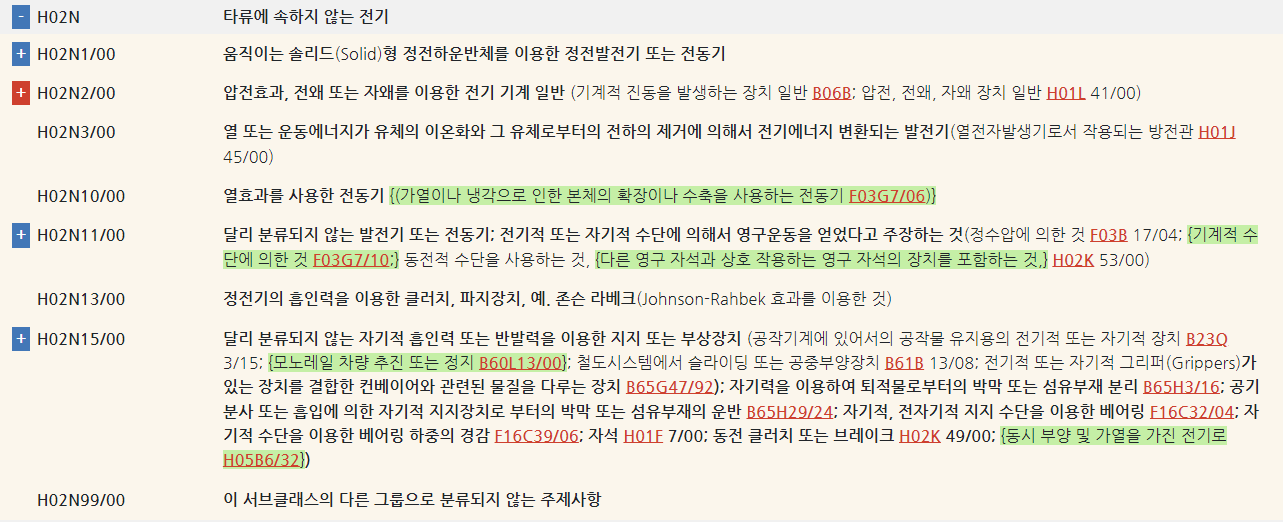

In [ ]:
dataframe = df[df['H02N']==1]
dataframe

,patent_abstract_y,H02N,H03G,H04Q,H03H,H01B,H04J,GoodBad,lemmatization
4,A vibration wave motor includes a first holdin...,1,0,0,0,0,0,1,"[vibration, wave, motor, member, member, regio..."
267,A piezoelectric power generation device compri...,1,0,0,0,0,0,1,"[power, generation, device, power, generation,..."
392,A triboelectric generator and method are provi...,1,0,0,0,0,0,1,"[generator, method, generator, electrode, inne..."
530,The present invention relates to a flooring sy...,1,0,0,0,0,0,1,"[invention, system, electricity, user, system,..."
559,A haptic feedback device includes a mechanical...,1,0,0,0,0,0,1,"[feedback, device, ground, surface, plurality,..."
...,...,...,...,...,...,...,...,...,...
22138,A power generating device is provided. The pow...,1,0,0,0,0,0,1,"[power, device, power, device, flexibility, su..."
22914,A method and apparatus for producing electrici...,1,0,0,0,0,0,1,"[method, apparatus, electricity, combination, ..."
23209,The present disclosure provides a displacement...,1,0,0,0,0,0,1,"[disclosure, amplification, structure, method,..."
23350,A device for wirelessly monitoring well condit...,1,0,0,0,0,0,1,"[device, condition, power, material, edge, lev..."


데이터가 74개밖에 없음!

In [ ]:
# epoch 반복에 따른 coherence변화

import time

coherences=[]
perplexities=[]
passes=[]

dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############


for i in range(11):

    ntopics, nwords = 10, 50
    if i==0:
        p=1
    else:
        p=i*5
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=p,random_state=0)
    print('epoch',p,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherences.append(coherence)

    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexities.append(lda4.log_perplexity(corpus))

epoch 1 0.24205231666564941
Cpherence -11.16551947929278
Perplexity:  -5.626661687973408 


epoch 5 0.3797321319580078
Cpherence -11.07568992457718
Perplexity:  -5.609313597591007 


epoch 10 0.6783466339111328
Cpherence -11.026862408011656
Perplexity:  -5.607327935018428 


epoch 15 0.7066993713378906
Cpherence -11.066922319684062
Perplexity:  -5.606957740194603 


epoch 20 0.8750565052032471
Cpherence -11.055964647832855
Perplexity:  -5.606857113615548 


epoch 25 1.026097297668457
Cpherence -11.2974202884524
Perplexity:  -5.6068417398150325 


epoch 30 1.2593603134155273
Cpherence -11.296112442847248
Perplexity:  -5.60683858791214 


epoch 35 1.43263840675354
Cpherence -11.296988318011524
Perplexity:  -5.606838538790491 


epoch 40 1.6754183769226074
Cpherence -11.308260640915758
Perplexity:  -5.606838459541826 


epoch 45 1.8537013530731201
Cpherence -11.297751914265344
Perplexity:  -5.606838626342061 


epoch 50 2.077101707458496
Cpherence -11.306773360264835
Perplexity:  -5.60683

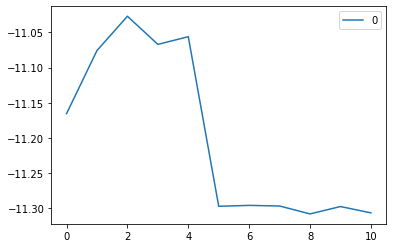

In [ ]:
pd.DataFrame(coherences).plot()

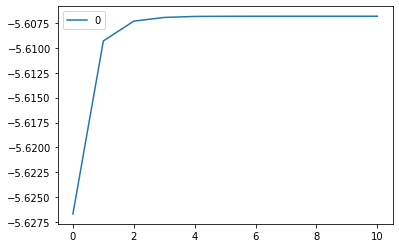

In [ ]:
pd.DataFrame(perplexities).plot()

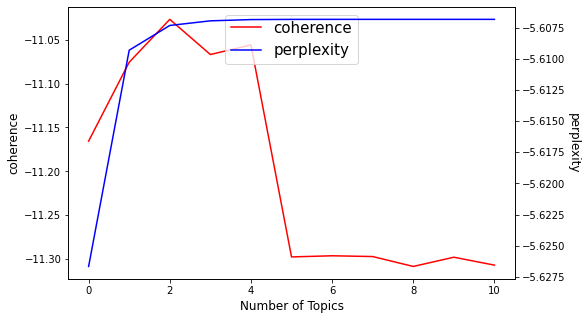

In [ ]:
fig, ax1 = plt.subplots(figsize = (8, 5))
x = [0,1,2,3,4,5,6,7,8,9,10]

ax1.set_xlabel('Number of Topics', fontsize = 12)
ax1.set_ylabel('coherence', rotation = 90, fontsize = 12)
line1 = ax1.plot(x, coherences, color = 'red', label = 'coherence')

ax2 =ax1.twinx()
ax2.set_ylabel('perplexity', rotation = -90, labelpad = 15, fontsize = 12)
line2 = ax2.plot(x, perplexities, color = 'blue', label = 'perplexity')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', fontsize = 15)
# plt.title("H01F", fontsize = 20)
plt.show()

coherence가 높을수록 좋고, perplexity가 낮을수록 좋으므로 2가 best -> passes : 10

In [ ]:
# perplexity, coherence 기준으로 최적의 토픽 개수 선정

coherencesT=[]
perplexitiesT=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(2, 10):
    #nwords = 50
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=i, iterations=400, passes=10,random_state=0) ###
    print('ntopics',ntopics,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherencesT.append(coherence)

    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexitiesT.append(lda4.log_perplexity(corpus))

ntopics 10 1.0426025390625
Cpherence -8.900246676265278
Perplexity:  -5.776126672391298 


ntopics 10 0.7187118530273438
Cpherence -9.04714527992539
Perplexity:  -5.734129897792052 


ntopics 10 0.6723775863647461
Cpherence -9.791330732934954
Perplexity:  -5.715629817841118 


ntopics 10 0.6355206966400146
Cpherence -11.366118333282426
Perplexity:  -5.676091028164333 


ntopics 10 0.5803961753845215
Cpherence -12.046820343032062
Perplexity:  -5.6265079807446625 


ntopics 10 0.597658634185791
Cpherence -11.526238949558358
Perplexity:  -5.611434980751476 


ntopics 10 0.5444481372833252
Cpherence -12.051830039040212
Perplexity:  -5.599709177689793 


ntopics 10 0.5330264568328857
Cpherence -11.489618400428093
Perplexity:  -5.584060489783491 




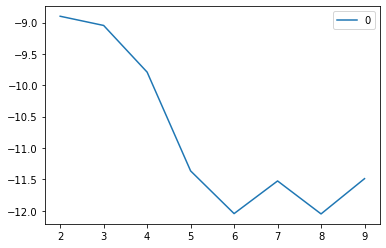

In [ ]:
pd.DataFrame(coherencesT,[2, 3, 4, 5, 6, 7, 8, 9]).plot()

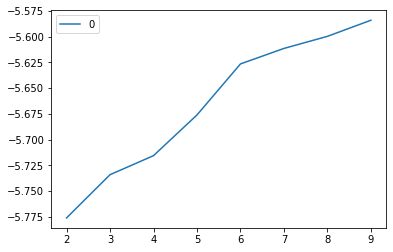

In [ ]:
pd.DataFrame(perplexitiesT,[2, 3, 4, 5, 6, 7, 8, 9]).plot()

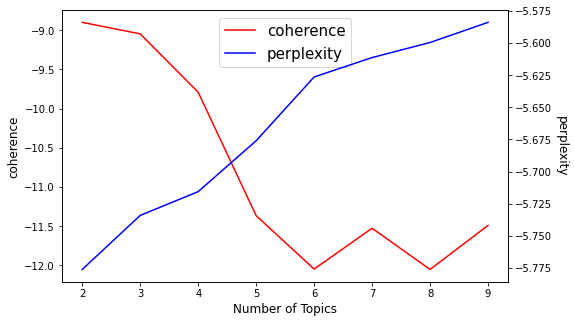

In [ ]:
fig, ax1 = plt.subplots(figsize = (8, 5))
x = [2,3,4,5,6,7,8,9]

ax1.set_xlabel('Number of Topics', fontsize = 12)
ax1.set_ylabel('coherence', rotation = 90, fontsize = 12)
line1 = ax1.plot(x, coherencesT, color = 'red', label = 'coherence')

ax2 =ax1.twinx()
ax2.set_ylabel('perplexity', rotation = -90, labelpad = 15, fontsize = 12)
line2 = ax2.plot(x, perplexitiesT, color = 'blue', label = 'perplexity')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', fontsize = 15)
# plt.title("H01F", fontsize = 20)
plt.show()

최적 토픽 개수 : 3개

In [ ]:
# 최종 모델 돌리기!

import gensim
from gensim import corpora

dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############

## LDA 모델 훈련시키기

NUM_TOPICS = 3 #################
PASSES = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary,  passes=PASSES, random_state=0) #passes는 알고리즘의 동작 횟수
topics = ldamodel.print_topics(num_words=20) #총 8개의 단어만 출력

for topic in topics:
    print(topic)

(0, '0.036*"surface" + 0.034*"vibration" + 0.031*"direction" + 0.026*"portion" + 0.023*"member" + 0.017*"region" + 0.017*"element" + 0.016*"body" + 0.016*"point" + 0.016*"system" + 0.015*"stator" + 0.014*"plurality" + 0.013*"motor" + 0.012*"device" + 0.011*"plate" + 0.011*"energy" + 0.010*"structure" + 0.010*"end" + 0.010*"side" + 0.009*"rotor"')
(1, '0.035*"electrode" + 0.029*"layer" + 0.026*"actuator" + 0.020*"power" + 0.016*"element" + 0.015*"part" + 0.014*"beam" + 0.014*"motion" + 0.014*"energy" + 0.014*"body" + 0.014*"member" + 0.014*"material" + 0.014*"voltage" + 0.013*"contact" + 0.013*"device" + 0.013*"end" + 0.013*"deformation" + 0.011*"structure" + 0.011*"step" + 0.010*"unit"')
(2, '0.039*"power" + 0.031*"device" + 0.024*"plurality" + 0.019*"generator" + 0.019*"vibrator" + 0.018*"member" + 0.017*"frequency" + 0.014*"surface" + 0.014*"charge" + 0.013*"message" + 0.013*"system" + 0.013*"conversion" + 0.011*"portion" + 0.010*"control" + 0.009*"housing" + 0.009*"energy" + 0.009*"

In [ ]:
import pyLDAvis.gensim_models   

pyLDAvis.enable_notebook()  
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)  
pyLDAvis.display(vis)  

In [ ]:
# pyLDAvis html 저장   
pyLDAvis.save_html(vis, '/content/drive/MyDrive/Capstone/LDA/lda_result/H02N_10p_3T.html') ##############

In [ ]:
# 문서 별 토픽 분포 보기

def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,0.0,0.9830,"[(0, 0.98298293)]"
1,1,0.0,0.6197,"[(0, 0.6197054), (2, 0.3716351)]"
2,2,2.0,0.6440,"[(0, 0.016287597), (1, 0.33970198), (2, 0.6440..."
3,3,2.0,0.8894,"[(0, 0.0871519), (1, 0.023490217), (2, 0.88935..."
4,4,0.0,0.9680,"[(0, 0.96797186), (1, 0.015425471), (2, 0.0166..."
5,5,0.0,0.6757,"[(0, 0.6757075), (1, 0.31345004), (2, 0.010842..."
6,6,1.0,0.9794,"[(0, 0.010292036), (1, 0.97940713), (2, 0.0103..."
7,7,0.0,0.5489,"[(0, 0.54894125), (1, 0.010154335), (2, 0.4409..."
8,8,2.0,0.9843,"[(2, 0.98430485)]"
9,9,1.0,0.8846,"[(0, 0.10467065), (1, 0.8845874), (2, 0.010741..."


In [ ]:
dataframe.reset_index(drop = True, inplace = True)

In [ ]:
final = pd.concat([dataframe,topictable.iloc[:,1:]],axis=1)
final.to_csv('/content/drive/MyDrive/Capstone/data/LDA/LDA_H02N_final.csv')
final

,patent_abstract_y,H02N,H03G,H04Q,H03H,H01B,H04J,GoodBad,lemmatization,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,A vibration wave motor includes a first holdin...,1,0,0,0,0,0,1,"[vibration, wave, motor, member, member, regio...",0.0,0.9830,"[(0, 0.98298293)]"
1,A piezoelectric power generation device compri...,1,0,0,0,0,0,1,"[power, generation, device, power, generation,...",0.0,0.6197,"[(0, 0.6197054), (2, 0.3716351)]"
2,A triboelectric generator and method are provi...,1,0,0,0,0,0,1,"[generator, method, generator, electrode, inne...",2.0,0.6440,"[(0, 0.016287597), (1, 0.33970198), (2, 0.6440..."
3,The present invention relates to a flooring sy...,1,0,0,0,0,0,1,"[invention, system, electricity, user, system,...",2.0,0.8894,"[(0, 0.0871519), (1, 0.023490217), (2, 0.88935..."
4,A haptic feedback device includes a mechanical...,1,0,0,0,0,0,1,"[feedback, device, ground, surface, plurality,...",0.0,0.9680,"[(0, 0.96797186), (1, 0.015425471), (2, 0.0166..."
...,...,...,...,...,...,...,...,...,...,...,...,...
69,A power generating device is provided. The pow...,1,0,0,0,0,0,1,"[power, device, power, device, flexibility, su...",1.0,0.9551,"[(0, 0.022881184), (1, 0.9550843), (2, 0.02203..."
70,A method and apparatus for producing electrici...,1,0,0,0,0,0,1,"[method, apparatus, electricity, combination, ...",1.0,0.9799,"[(1, 0.97993565), (2, 0.010261397)]"
71,The present disclosure provides a displacement...,1,0,0,0,0,0,1,"[disclosure, amplification, structure, method,...",1.0,0.9810,"[(1, 0.980999)]"
72,A device for wirelessly monitoring well condit...,1,0,0,0,0,0,1,"[device, condition, power, material, edge, lev...",1.0,0.9728,"[(0, 0.01410544), (1, 0.9728114), (2, 0.013083..."


In [ ]:
final['가장 비중이 높은 토픽'].value_counts()

0.0    28
1.0    27
2.0    19
Name: 가장 비중이 높은 토픽, dtype: int64

In [ ]:
final['GoodBad'].value_counts()

1    71
0     3
Name: GoodBad, dtype: int64

In [ ]:
final = pd.read_csv('/content/drive/MyDrive/Capstone/data/LDA/LDA_H02N_final.csv')
final

,Unnamed: 0,patent_abstract_y,H02N,H03G,H04Q,H03H,H01B,H04J,GoodBad,lemmatization,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,A vibration wave motor includes a first holdin...,1,0,0,0,0,0,1,"['vibration', 'wave', 'motor', 'member', 'memb...",0.0,0.9830,"[(0, 0.98298293)]"
1,1,A piezoelectric power generation device compri...,1,0,0,0,0,0,1,"['power', 'generation', 'device', 'power', 'ge...",0.0,0.6197,"[(0, 0.6197054), (2, 0.3716351)]"
2,2,A triboelectric generator and method are provi...,1,0,0,0,0,0,1,"['generator', 'method', 'generator', 'electrod...",2.0,0.6440,"[(0, 0.016287597), (1, 0.33970198), (2, 0.6440..."
3,3,The present invention relates to a flooring sy...,1,0,0,0,0,0,1,"['invention', 'system', 'electricity', 'user',...",2.0,0.8894,"[(0, 0.0871519), (1, 0.023490217), (2, 0.88935..."
4,4,A haptic feedback device includes a mechanical...,1,0,0,0,0,0,1,"['feedback', 'device', 'ground', 'surface', 'p...",0.0,0.9680,"[(0, 0.96797186), (1, 0.015425471), (2, 0.0166..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,69,A power generating device is provided. The pow...,1,0,0,0,0,0,1,"['power', 'device', 'power', 'device', 'flexib...",1.0,0.9551,"[(0, 0.022881184), (1, 0.9550843), (2, 0.02203..."
70,70,A method and apparatus for producing electrici...,1,0,0,0,0,0,1,"['method', 'apparatus', 'electricity', 'combin...",1.0,0.9799,"[(1, 0.97993565), (2, 0.010261397)]"
71,71,The present disclosure provides a displacement...,1,0,0,0,0,0,1,"['disclosure', 'amplification', 'structure', '...",1.0,0.9810,"[(1, 0.980999)]"
72,72,A device for wirelessly monitoring well condit...,1,0,0,0,0,0,1,"['device', 'condition', 'power', 'material', '...",1.0,0.9728,"[(0, 0.01410544), (1, 0.9728114), (2, 0.013083..."


In [ ]:
final['GoodBad'].value_counts()

1    71
0     3
Name: GoodBad, dtype: int64

기존 기준으로 구하면 기준이 너무 빡세서 비율을 구할 수 없음 -> 레이블 당으로 확인해보기

In [ ]:
## 확인

check = final.merge(pred, on='patent_abstract_y', how='left')
check

,Unnamed: 0,patent_abstract_y,H02N_x,H03G_x,H04Q_x,H03H_x,H01B_x,H04J_x,GoodBad,lemmatization,...,H04S,H04T,H04W,H05B,H05C,H05F,H05G,H05H,H05K,H99Z
0,0,A vibration wave motor includes a first holdin...,1,0,0,0,0,0,1,"['vibration', 'wave', 'motor', 'member', 'memb...",...,0,0,0,0,0,0,0,0,0,0
1,1,A piezoelectric power generation device compri...,1,0,0,0,0,0,1,"['power', 'generation', 'device', 'power', 'ge...",...,0,0,0,0,0,0,0,0,0,0
2,2,A triboelectric generator and method are provi...,1,0,0,0,0,0,1,"['generator', 'method', 'generator', 'electrod...",...,0,0,0,0,0,0,0,0,0,0
3,3,The present invention relates to a flooring sy...,1,0,0,0,0,0,1,"['invention', 'system', 'electricity', 'user',...",...,0,0,0,0,0,0,0,0,0,0
4,4,A haptic feedback device includes a mechanical...,1,0,0,0,0,0,1,"['feedback', 'device', 'ground', 'surface', 'p...",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,69,A power generating device is provided. The pow...,1,0,0,0,0,0,1,"['power', 'device', 'power', 'device', 'flexib...",...,0,0,0,0,0,0,0,0,0,0
70,70,A method and apparatus for producing electrici...,1,0,0,0,0,0,1,"['method', 'apparatus', 'electricity', 'combin...",...,0,0,0,0,0,0,0,0,0,0
71,71,The present disclosure provides a displacement...,1,0,0,0,0,0,1,"['disclosure', 'amplification', 'structure', '...",...,0,0,0,0,0,0,0,0,0,0
72,72,A device for wirelessly monitoring well condit...,1,0,0,0,0,0,1,"['device', 'condition', 'power', 'material', '...",...,0,0,0,0,0,0,0,0,0,0


In [ ]:
check['H02N_y'].value_counts() # 예측값(1이 예측한 개수)

0    70
1     4
Name: H02N_y, dtype: int64

그래도 너무 적음... -> 확인하는게 의미가 없음.

In [ ]:
## 분류안된 애들 중 애매한 토픽 비율(topic=2)
fail = check[check['GoodBad']==1]
success = check[check['GoodBad']==0]

In [ ]:
fail

,Unnamed: 0,patent_abstract_y,H02N_x,H03G_x,H04Q_x,H03H_x,H01B_x,H04J_x,GoodBad,lemmatization,...,H04S,H04T,H04W,H05B,H05C,H05F,H05G,H05H,H05K,H99Z
0,0,A vibration wave motor includes a first holdin...,1,0,0,0,0,0,1,"['vibration', 'wave', 'motor', 'member', 'memb...",...,0,0,0,0,0,0,0,0,0,0
1,1,A piezoelectric power generation device compri...,1,0,0,0,0,0,1,"['power', 'generation', 'device', 'power', 'ge...",...,0,0,0,0,0,0,0,0,0,0
2,2,A triboelectric generator and method are provi...,1,0,0,0,0,0,1,"['generator', 'method', 'generator', 'electrod...",...,0,0,0,0,0,0,0,0,0,0
3,3,The present invention relates to a flooring sy...,1,0,0,0,0,0,1,"['invention', 'system', 'electricity', 'user',...",...,0,0,0,0,0,0,0,0,0,0
4,4,A haptic feedback device includes a mechanical...,1,0,0,0,0,0,1,"['feedback', 'device', 'ground', 'surface', 'p...",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,69,A power generating device is provided. The pow...,1,0,0,0,0,0,1,"['power', 'device', 'power', 'device', 'flexib...",...,0,0,0,0,0,0,0,0,0,0
70,70,A method and apparatus for producing electrici...,1,0,0,0,0,0,1,"['method', 'apparatus', 'electricity', 'combin...",...,0,0,0,0,0,0,0,0,0,0
71,71,The present disclosure provides a displacement...,1,0,0,0,0,0,1,"['disclosure', 'amplification', 'structure', '...",...,0,0,0,0,0,0,0,0,0,0
72,72,A device for wirelessly monitoring well condit...,1,0,0,0,0,0,1,"['device', 'condition', 'power', 'material', '...",...,0,0,0,0,0,0,0,0,0,0


In [ ]:
success

,Unnamed: 0,patent_abstract_y,H02N_x,H03G_x,H04Q_x,H03H_x,H01B_x,H04J_x,GoodBad,lemmatization,...,H04S,H04T,H04W,H05B,H05C,H05F,H05G,H05H,H05K,H99Z
23,23,A vibration type motor includes a vibrator tha...,1,0,0,0,0,0,0,"['vibration', 'type', 'motor', 'vibrator', 'el...",...,0,0,0,0,0,0,0,0,0,0
35,35,A non-destructive examination (NDE) system for...,1,0,0,0,0,0,0,"['examination', 'nde', 'system', 'element', 'c...",...,0,0,0,0,0,0,0,0,0,0
61,61,An energy harvesting device for generating ele...,1,0,0,0,0,0,0,"['energy', 'device', 'power', 'frequency', 'os...",...,0,0,0,0,0,0,0,0,0,0


# 2. H03G
- 데이터 95개 / passes 20 / topic 4개

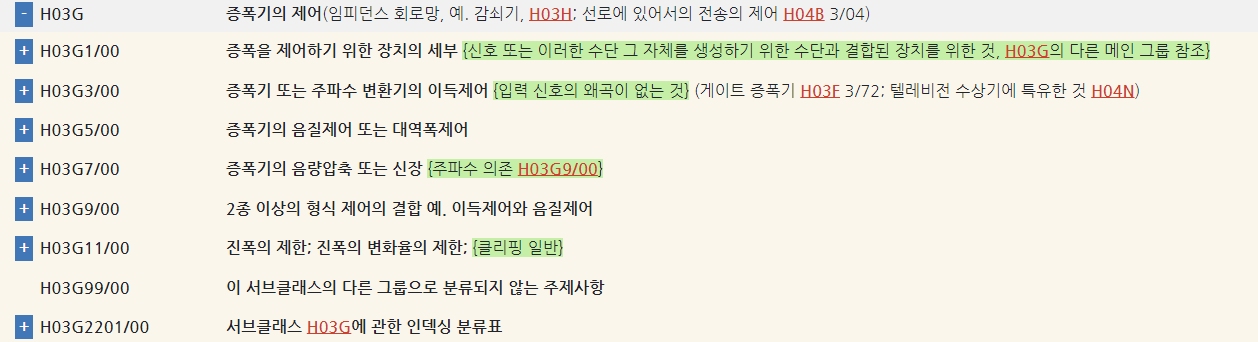

In [ ]:
dataframe = df[df['H03G']==1]
dataframe

,patent_abstract_y,H02N,H03G,H04Q,H03H,H01B,H04J,GoodBad,lemmatization
248,"Provided are systems, methods and techniques f...",0,1,0,0,0,0,1,"[system, method, technique, range, signal, imp..."
443,A method of enhancing an audio signal from an ...,0,1,0,0,0,0,1,"[method, signal, audio, output, device, freque..."
809,The present invention relates to an interface ...,0,1,0,0,0,0,1,"[invention, circuit, accelerometer, sensor, ac..."
1101,A personalized sound management system for an ...,0,1,0,0,0,0,1,"[management, system, space, transducer, data, ..."
1378,Embodiments of the invention relate generally ...,0,1,0,0,0,0,1,"[embodiment, invention, device, device, ambien..."
...,...,...,...,...,...,...,...,...,...
23312,A HDR CTIA pixel which provides automatic gain...,0,1,0,0,0,0,1,"[hdr, ctia, pixel, gain, selection, coherence,..."
23478,A field-effect transistor system is provided t...,0,1,0,0,0,0,1,"[field, effect, transistor, system, comprises,..."
23812,A signal processing system may include a modul...,0,1,0,0,0,0,1,"[signal, processing, system, modulation, stage..."
24153,The specification and drawings present a new m...,0,1,0,0,0,0,1,"[specification, drawing, method, apparatus, so..."


데이터가 95개밖에 없음!

In [ ]:
# epoch 반복에 따른 coherence변화

import time

coherences=[]
perplexities=[]
passes=[]

dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############


for i in range(11):

    ntopics, nwords = 10, 50
    if i==0:
        p=1
    else:
        p=i*5
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=p, random_state=0)
    print('epoch',p,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherences.append(coherence)

    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexities.append(lda4.log_perplexity(corpus))

epoch 1 0.3234243392944336
Cpherence -8.07412741242535
Perplexity:  -5.499805555672846 


epoch 5 0.5973029136657715
Cpherence -7.853930138454328
Perplexity:  -5.452112452191478 


epoch 10 0.8766424655914307
Cpherence -7.999420985891182
Perplexity:  -5.434184798892612 


epoch 15 1.1087148189544678
Cpherence -7.845823495999869
Perplexity:  -5.426976930136373 


epoch 20 1.420412540435791
Cpherence -7.678733401482401
Perplexity:  -5.420136667880555 


epoch 25 1.7296156883239746
Cpherence -8.505577858756132
Perplexity:  -5.415980934356529 


epoch 30 2.020334482192993
Cpherence -8.390906046976498
Perplexity:  -5.413655294408325 


epoch 35 2.3340871334075928
Cpherence -9.316834864887358
Perplexity:  -5.412610939714346 


epoch 40 2.5518834590911865
Cpherence -9.234500373950084
Perplexity:  -5.4112979716481995 


epoch 45 2.9181969165802
Cpherence -9.258906594418946
Perplexity:  -5.409799916214805 


epoch 50 3.201996326446533
Cpherence -9.254711184923604
Perplexity:  -5.408332970934039

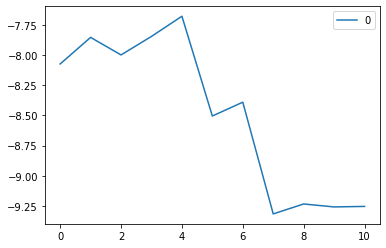

In [ ]:
pd.DataFrame(coherences).plot()

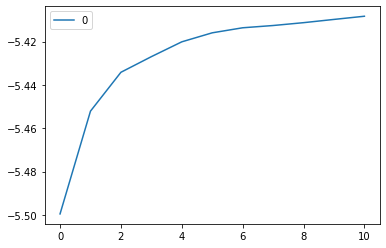

In [ ]:
pd.DataFrame(perplexities).plot()

coherence가 높을수록 좋고, perplexity가 낮을수록 좋으므로 4가 best -> passes : 20

In [ ]:
# perplexity, coherence 기준으로 최적의 토픽 개수 선정

coherencesT=[]
perplexitiesT=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(2, 10):
    #nwords = 50
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=i, iterations=400, passes=20, random_state=0) ###
    print('ntopics',ntopics,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherencesT.append(coherence)

    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexitiesT.append(lda4.log_perplexity(corpus))

ntopics 10 2.082162380218506
Cpherence -3.6625868515320996
Perplexity:  -5.456144136606342 


ntopics 10 2.0432345867156982
Cpherence -5.1237734927201
Perplexity:  -5.447950345781835 


ntopics 10 1.9602105617523193
Cpherence -6.26857307405617
Perplexity:  -5.505417700563924 


ntopics 10 1.5861284732818604
Cpherence -6.903998307305507
Perplexity:  -5.513806442971909 


ntopics 10 2.5417866706848145
Cpherence -8.360038844272239
Perplexity:  -5.5021061449449915 


ntopics 10 1.5133028030395508
Cpherence -7.853841385924663
Perplexity:  -5.4750750700198 


ntopics 10 1.4859745502471924
Cpherence -8.443539769911027
Perplexity:  -5.464448340206299 


ntopics 10 1.4163093566894531
Cpherence -8.576847206506363
Perplexity:  -5.392211911612753 




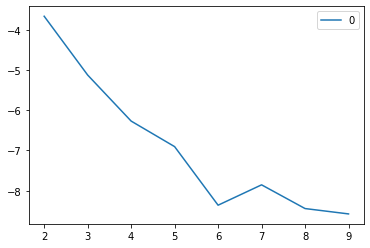

In [ ]:
pd.DataFrame(coherencesT,[2, 3, 4, 5, 6, 7, 8, 9]).plot()

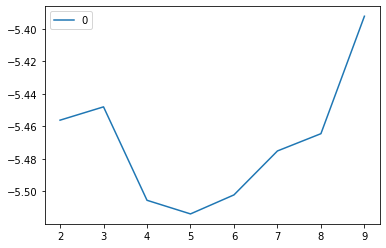

In [ ]:
pd.DataFrame(perplexitiesT,[2, 3, 4, 5, 6, 7, 8, 9]).plot()

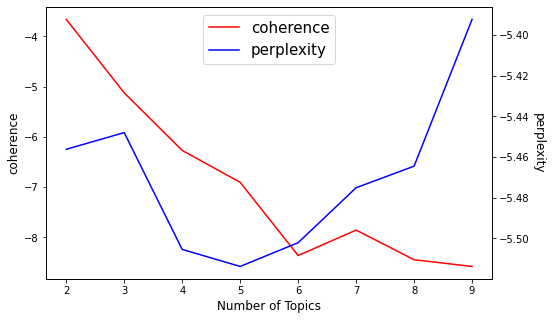

In [ ]:
fig, ax1 = plt.subplots(figsize = (8, 5))
x = [2,3,4,5,6,7,8,9]

ax1.set_xlabel('Number of Topics', fontsize = 12)
ax1.set_ylabel('coherence', rotation = 90, fontsize = 12)
line1 = ax1.plot(x, coherencesT, color = 'red', label = 'coherence')

ax2 =ax1.twinx()
ax2.set_ylabel('perplexity', rotation = -90, labelpad = 15, fontsize = 12)
line2 = ax2.plot(x, perplexitiesT, color = 'blue', label = 'perplexity')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', fontsize = 15)
# plt.title("H01F", fontsize = 20)
plt.show()

최적 토픽 개수 : 4개

In [ ]:
# 최종 모델 돌리기!

import gensim
from gensim import corpora

dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############

## LDA 모델 훈련시키기

NUM_TOPICS = 4 #################
PASSES = 20 #################
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary,  passes=PASSES, random_state=0) #passes는 알고리즘의 동작 횟수
topics = ldamodel.print_topics(num_words=20) #총 8개의 단어만 출력

for topic in topics:
    print(topic)

(0, '0.038*"circuit" + 0.036*"gain" + 0.033*"output" + 0.032*"path" + 0.027*"voltage" + 0.022*"system" + 0.020*"method" + 0.019*"signal" + 0.018*"source" + 0.016*"input" + 0.015*"amplifier" + 0.015*"data" + 0.012*"playback" + 0.012*"detection" + 0.010*"stage" + 0.009*"control" + 0.009*"polarization" + 0.008*"level" + 0.008*"frequency" + 0.008*"power"')
(1, '0.062*"power" + 0.038*"circuit" + 0.035*"voltage" + 0.035*"supply" + 0.034*"transistor" + 0.025*"amplifier" + 0.022*"frequency" + 0.021*"state" + 0.019*"gain" + 0.019*"source" + 0.016*"processing" + 0.015*"switch" + 0.014*"field" + 0.011*"band" + 0.011*"effect" + 0.011*"drive" + 0.010*"system" + 0.009*"speaker" + 0.009*"function" + 0.009*"circuitry"')
(2, '0.086*"volume" + 0.034*"voltage" + 0.030*"level" + 0.029*"system" + 0.029*"control" + 0.029*"signal" + 0.017*"audio" + 0.017*"device" + 0.017*"output" + 0.016*"group" + 0.015*"input" + 0.015*"reference" + 0.014*"time" + 0.012*"sound" + 0.012*"difference" + 0.011*"node" + 0.010*"me

In [ ]:
import pyLDAvis.gensim_models   

pyLDAvis.enable_notebook()  
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)  
pyLDAvis.display(vis)  

In [ ]:
# pyLDAvis html 저장   
pyLDAvis.save_html(vis, '/content/drive/MyDrive/Capstone/LDA/lda_result/H03G_20p_4T.html') ##############

In [ ]:
# 문서 별 토픽 분포 보기

def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,3.0,0.9819,"[(3, 0.9819063)]"
1,1,2.0,0.9754,"[(2, 0.9753575)]"
2,2,1.0,0.9583,"[(0, 0.014312559), (1, 0.9582634), (2, 0.01366..."
3,3,0.0,0.9834,"[(0, 0.9834154)]"
4,4,3.0,0.7937,"[(2, 0.19171983), (3, 0.7936634)]"
5,5,2.0,0.9763,"[(2, 0.9762519)]"
6,6,1.0,0.5020,"[(1, 0.50197464), (2, 0.12925911), (3, 0.36310..."
7,7,3.0,0.9750,"[(3, 0.975033)]"
8,8,3.0,0.9765,"[(3, 0.97653466)]"
9,9,2.0,0.9871,"[(2, 0.9870976)]"


In [ ]:
dataframe.reset_index(drop = True, inplace = True)

In [ ]:
final = pd.concat([dataframe,topictable.iloc[:,1:]],axis=1)
final.to_csv('/content/drive/MyDrive/Capstone/data/LDA/LDA_H03G_final.csv')
final

,patent_abstract_y,H02N,H03G,H04Q,H03H,H01B,H04J,GoodBad,lemmatization,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,"Provided are systems, methods and techniques f...",0,1,0,0,0,0,1,"[system, method, technique, range, signal, imp...",3.0,0.9819,"[(3, 0.9819063)]"
1,A method of enhancing an audio signal from an ...,0,1,0,0,0,0,1,"[method, signal, audio, output, device, freque...",2.0,0.9754,"[(2, 0.9753575)]"
2,The present invention relates to an interface ...,0,1,0,0,0,0,1,"[invention, circuit, accelerometer, sensor, ac...",1.0,0.9583,"[(0, 0.014312559), (1, 0.9582634), (2, 0.01366..."
3,A personalized sound management system for an ...,0,1,0,0,0,0,1,"[management, system, space, transducer, data, ...",0.0,0.9834,"[(0, 0.9834154)]"
4,Embodiments of the invention relate generally ...,0,1,0,0,0,0,1,"[embodiment, invention, device, device, ambien...",3.0,0.7937,"[(2, 0.19171983), (3, 0.7936634)]"
...,...,...,...,...,...,...,...,...,...,...,...,...
90,A HDR CTIA pixel which provides automatic gain...,0,1,0,0,0,0,1,"[hdr, ctia, pixel, gain, selection, coherence,...",0.0,0.9822,"[(0, 0.98219514)]"
91,A field-effect transistor system is provided t...,0,1,0,0,0,0,1,"[field, effect, transistor, system, comprises,...",1.0,0.9838,"[(1, 0.9837935)]"
92,A signal processing system may include a modul...,0,1,0,0,0,0,1,"[signal, processing, system, modulation, stage...",3.0,0.7834,"[(1, 0.2030578), (3, 0.7833888)]"
93,The specification and drawings present a new m...,0,1,0,0,0,0,1,"[specification, drawing, method, apparatus, so...",2.0,0.6135,"[(2, 0.61346275), (3, 0.36899757)]"


In [ ]:
final['가장 비중이 높은 토픽'].value_counts()

3.0    46
0.0    17
2.0    16
1.0    16
Name: 가장 비중이 높은 토픽, dtype: int64

In [ ]:
final['GoodBad'].value_counts()

1    93
0     2
Name: GoodBad, dtype: int64

In [ ]:
## 확인

check = final.merge(pred, on='patent_abstract_y', how='left')
check

,patent_abstract_y,H02N_x,H03G_x,H04Q_x,H03H_x,H01B_x,H04J_x,GoodBad,lemmatization,가장 비중이 높은 토픽,...,H04S,H04T,H04W,H05B,H05C,H05F,H05G,H05H,H05K,H99Z
0,"Provided are systems, methods and techniques f...",0,1,0,0,0,0,1,"[system, method, technique, range, signal, imp...",3.0,...,0,0,0,0,0,0,0,0,0,0
1,A method of enhancing an audio signal from an ...,0,1,0,0,0,0,1,"[method, signal, audio, output, device, freque...",2.0,...,0,0,0,0,0,0,0,0,0,0
2,The present invention relates to an interface ...,0,1,0,0,0,0,1,"[invention, circuit, accelerometer, sensor, ac...",1.0,...,0,0,0,0,0,0,0,0,0,0
3,A personalized sound management system for an ...,0,1,0,0,0,0,1,"[management, system, space, transducer, data, ...",0.0,...,0,0,0,0,0,0,0,0,0,0
4,Embodiments of the invention relate generally ...,0,1,0,0,0,0,1,"[embodiment, invention, device, device, ambien...",3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,A HDR CTIA pixel which provides automatic gain...,0,1,0,0,0,0,1,"[hdr, ctia, pixel, gain, selection, coherence,...",0.0,...,0,0,0,0,0,0,0,0,0,0
93,A field-effect transistor system is provided t...,0,1,0,0,0,0,1,"[field, effect, transistor, system, comprises,...",1.0,...,0,0,0,0,0,0,0,0,0,0
94,A signal processing system may include a modul...,0,1,0,0,0,0,1,"[signal, processing, system, modulation, stage...",3.0,...,0,0,0,0,0,0,0,0,0,0
95,The specification and drawings present a new m...,0,1,0,0,0,0,1,"[specification, drawing, method, apparatus, so...",2.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 96
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patent_abstract_y  97 non-null     object 
 1   H02N_x             97 non-null     int64  
 2   H03G_x             97 non-null     int64  
 3   H04Q_x             97 non-null     int64  
 4   H03H_x             97 non-null     int64  
 5   H01B_x             97 non-null     int64  
 6   H04J_x             97 non-null     int64  
 7   GoodBad            97 non-null     int64  
 8   lemmatization      97 non-null     object 
 9   가장 비중이 높은 토픽       97 non-null     float64
 10  가장 높은 토픽의 비중       97 non-null     float32
 11  각 토픽의 비중           97 non-null     object 
 12  H01B_y             97 non-null     int64  
 13  H01C               97 non-null     int64  
 14  H01F               97 non-null     int64  
 15  H01G               97 non-null     int64  
 16  H01H               97 non-nu

In [ ]:
check['H03G_y'].value_counts()

0    95
1     2
Name: H03G_y, dtype: int64

In [ ]:
check['H03F'].value_counts()

0    79
1    18
Name: H03F, dtype: int64

In [ ]:
check['H03M'].value_counts()

0    94
1     3
Name: H03M, dtype: int64

# 3. H04Q
- 데이터 175개 / passes 10 / topic 3개

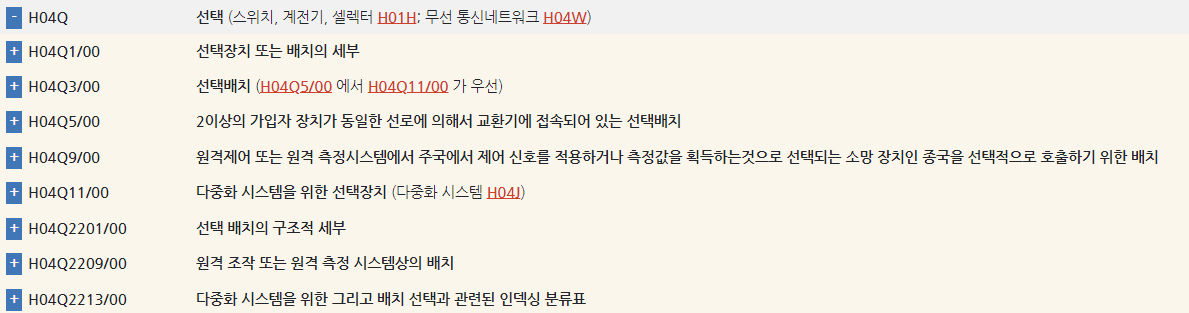

In [ ]:
dataframe = df[df['H04Q']==1]
dataframe

,patent_abstract_y,H02N,H03G,H04Q,H03H,H01B,H04J,GoodBad,lemmatization
91,Apparatus and methods for guaranteeing a quali...,0,0,1,0,0,1,1,"[apparatus, method, quality, experience, qoe, ..."
132,Techniques pertaining to powering multiple pla...,0,0,1,0,0,0,1,"[technique, platform, air, passage, environmen..."
161,A cognitive analysis computer device is progra...,0,0,1,0,0,0,1,"[analysis, computer, device, set, input, data,..."
259,Systems and methods include managing optical s...,0,0,1,0,0,1,1,"[system, method, spectrum, network, channel, n..."
261,"A wavelength selective switch (WSS), reconfigu...",0,0,1,0,0,1,1,"[wavelength, switch, add, drop, method, condit..."
...,...,...,...,...,...,...,...,...,...
23672,The present technology provides minimal touch ...,0,0,1,0,0,0,1,"[technology, touch, cable, guide, device, cabl..."
23702,A patient monitoring device includes an ECG se...,0,0,1,0,0,0,1,"[monitoring, device, sensor, patient, sensor, ..."
23822,A method for transmitting a digital frame by a...,0,0,1,0,0,0,1,"[method, frame, network, unit, communication, ..."
23999,A networking device with orthogonal switch bar...,0,0,1,0,0,0,1,"[device, switch, bar, device, plurality, switc..."


데이터가 174개

In [ ]:
# epoch 반복에 따른 coherence변화

import time

coherences=[]
perplexities=[]
passes=[]

dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############


for i in range(11):

    ntopics, nwords = 10, 50
    if i==0:
        p=1
    else:
        p=i*5
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=p, random_state=0)
    print('epoch',p,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherences.append(coherence)

    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexities.append(lda4.log_perplexity(corpus))

epoch 1 0.46198034286499023
Cpherence -7.35571808926413
Perplexity:  -5.892597080593041 




epoch 5 1.02388596534729
Cpherence -8.00406418258424
Perplexity:  -5.84244056981097 


epoch 10 1.530947208404541
Cpherence -8.123607747028187
Perplexity:  -5.8240543354882135 


epoch 15 2.169903516769409
Cpherence -8.195512174015594
Perplexity:  -5.816846398632159 


epoch 20 3.2750844955444336
Cpherence -8.200855262763628
Perplexity:  -5.812749361393699 


epoch 25 3.201953172683716
Cpherence -8.29368981451027
Perplexity:  -5.810234729944591 


epoch 30 3.775623083114624
Cpherence -8.295443859455013
Perplexity:  -5.8090011069936995 


epoch 35 4.335155725479126
Cpherence -8.333924397749684
Perplexity:  -5.808267226253359 


epoch 40 4.925985813140869
Cpherence -8.333993193595395
Perplexity:  -5.807819147169804 


epoch 45 5.457756757736206
Cpherence -8.336384576157844
Perplexity:  -5.807599586500489 


epoch 50 6.141651153564453
Cpherence -8.369772225083278
Perplexity:  -5.807450479777483 




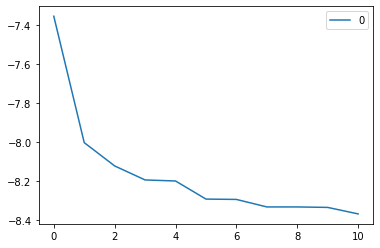

In [ ]:
pd.DataFrame(coherences).plot()

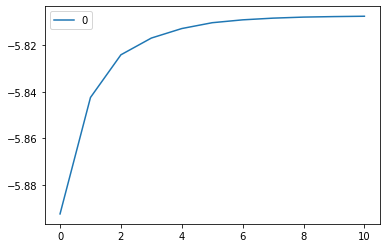

In [ ]:
pd.DataFrame(perplexities).plot()

coherence가 높을수록 좋고, perplexity(거의 비슷)가 낮을수록 좋으므로 2이 best -> passes : 10

In [ ]:
# perplexity, coherence 기준으로 최적의 토픽 개수 선정

coherencesT=[]
perplexitiesT=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(2, 10):
    #nwords = 50
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=i, iterations=400, passes=10, random_state=0) ###
    print('ntopics',ntopics,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherencesT.append(coherence)

    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexitiesT.append(lda4.log_perplexity(corpus))

ntopics 10 2.7741336822509766
Cpherence -3.2138751445859794
Perplexity:  -5.921916634874105 


ntopics 10 1.9904794692993164
Cpherence -3.3302426658222317
Perplexity:  -5.916225522846304 


ntopics 10 1.9651002883911133
Cpherence -5.215427253256908
Perplexity:  -5.889032487681263 


ntopics 10 1.9704172611236572
Cpherence -6.003431445817972
Perplexity:  -5.869446115527956 


ntopics 10 1.568145513534546
Cpherence -6.031300729287615
Perplexity:  -5.855361070538934 


ntopics 10 1.7566630840301514
Cpherence -6.59182112721119
Perplexity:  -5.8323946626297465 


ntopics 10 1.5144155025482178
Cpherence -6.719538578620641
Perplexity:  -5.806120946014227 


ntopics 10 1.6818668842315674
Cpherence -7.908630643057959
Perplexity:  -5.816937903845182 




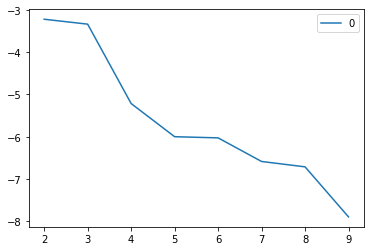

In [ ]:
pd.DataFrame(coherencesT,[2, 3, 4, 5, 6, 7, 8, 9]).plot()

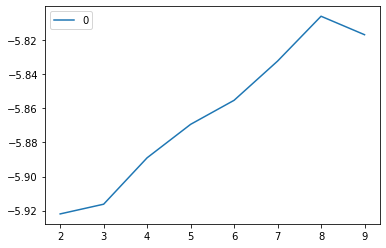

In [ ]:
pd.DataFrame(perplexitiesT,[2, 3, 4, 5, 6, 7, 8, 9]).plot()

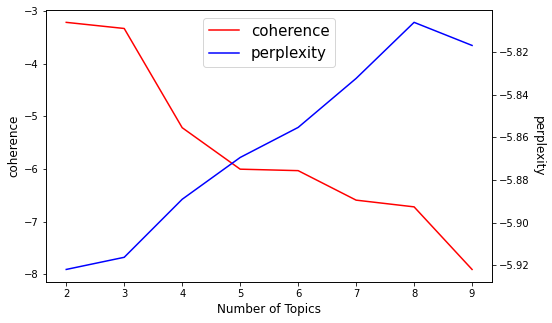

In [ ]:
fig, ax1 = plt.subplots(figsize = (8, 5))
x = [2,3,4,5,6,7,8,9]

ax1.set_xlabel('Number of Topics', fontsize = 12)
ax1.set_ylabel('coherence', rotation = 90, fontsize = 12)
line1 = ax1.plot(x, coherencesT, color = 'red', label = 'coherence')

ax2 =ax1.twinx()
ax2.set_ylabel('perplexity', rotation = -90, labelpad = 15, fontsize = 12)
line2 = ax2.plot(x, perplexitiesT, color = 'blue', label = 'perplexity')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', fontsize = 15)
# plt.title("H01F", fontsize = 20)
plt.show()

최적 토픽 개수 : 3개

In [ ]:
# 최종 모델 돌리기!

import gensim
from gensim import corpora

dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############

## LDA 모델 훈련시키기

NUM_TOPICS = 3 #################
PASSES = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary,  passes=PASSES, random_state=0) #passes는 알고리즘의 동작 횟수
topics = ldamodel.print_topics(num_words=20) #총 8개의 단어만 출력

for topic in topics:
    print(topic)

(0, '0.026*"sensor" + 0.025*"plurality" + 0.023*"data" + 0.021*"channel" + 0.019*"output" + 0.018*"device" + 0.018*"signal" + 0.017*"system" + 0.016*"node" + 0.016*"switch" + 0.015*"input" + 0.014*"module" + 0.014*"port" + 0.014*"unit" + 0.013*"method" + 0.011*"interface" + 0.011*"line" + 0.011*"controller" + 0.010*"connector" + 0.010*"value"')
(1, '0.049*"network" + 0.047*"device" + 0.033*"data" + 0.029*"communication" + 0.025*"system" + 0.022*"information" + 0.014*"method" + 0.013*"service" + 0.013*"unit" + 0.012*"plurality" + 0.011*"control" + 0.011*"port" + 0.009*"sensor" + 0.009*"signal" + 0.009*"component" + 0.009*"transmission" + 0.008*"wireless" + 0.007*"configuration" + 0.007*"state" + 0.007*"battery"')
(2, '0.038*"data" + 0.021*"system" + 0.020*"power" + 0.019*"node" + 0.019*"network" + 0.017*"unit" + 0.017*"sensor" + 0.016*"device" + 0.016*"information" + 0.009*"method" + 0.009*"wireless" + 0.009*"supply" + 0.008*"cable" + 0.008*"control" + 0.008*"access" + 0.007*"computer" 

In [ ]:
import pyLDAvis.gensim_models   

pyLDAvis.enable_notebook()  
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)  
pyLDAvis.display(vis)  

In [ ]:
# pyLDAvis html 저장   
pyLDAvis.save_html(vis, '/content/drive/MyDrive/Capstone/LDA/lda_result/H04Q_10p_3T.html') ##############

In [ ]:
# 문서 별 토픽 분포 보기

def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,1.0,0.9878,"[(1, 0.98776656)]"
1,1,2.0,0.9580,"[(0, 0.03024728), (1, 0.011752595), (2, 0.9580..."
2,2,0.0,0.9863,"[(0, 0.9863483)]"
3,3,2.0,0.5007,"[(0, 0.02179459), (1, 0.47751704), (2, 0.50068..."
4,4,1.0,0.6338,"[(0, 0.35418612), (1, 0.6337689), (2, 0.012044..."
5,5,1.0,0.9869,"[(1, 0.986944)]"
6,6,1.0,0.5220,"[(0, 0.4317605), (1, 0.5220328), (2, 0.0462067..."
7,7,2.0,0.9842,"[(2, 0.98421043)]"
8,8,0.0,0.9822,"[(0, 0.9821523)]"
9,9,1.0,0.9634,"[(0, 0.018068323), (1, 0.96340525), (2, 0.0185..."


In [ ]:
dataframe.reset_index(drop = True, inplace = True)

In [ ]:
final = pd.concat([dataframe,topictable.iloc[:,1:]],axis=1)
final.to_csv('/content/drive/MyDrive/Capstone/data/LDA/LDA_H04Q_final.csv')
final

,patent_abstract_y,H02N,H03G,H04Q,H03H,H01B,H04J,GoodBad,lemmatization,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,Apparatus and methods for guaranteeing a quali...,0,0,1,0,0,1,1,"[apparatus, method, quality, experience, qoe, ...",1.0,0.9878,"[(1, 0.98776656)]"
1,Techniques pertaining to powering multiple pla...,0,0,1,0,0,0,1,"[technique, platform, air, passage, environmen...",2.0,0.9580,"[(0, 0.03024728), (1, 0.011752595), (2, 0.9580..."
2,A cognitive analysis computer device is progra...,0,0,1,0,0,0,1,"[analysis, computer, device, set, input, data,...",0.0,0.9863,"[(0, 0.9863483)]"
3,Systems and methods include managing optical s...,0,0,1,0,0,1,1,"[system, method, spectrum, network, channel, n...",2.0,0.5007,"[(0, 0.02179459), (1, 0.47751704), (2, 0.50068..."
4,"A wavelength selective switch (WSS), reconfigu...",0,0,1,0,0,1,1,"[wavelength, switch, add, drop, method, condit...",1.0,0.6338,"[(0, 0.35418612), (1, 0.6337689), (2, 0.012044..."
...,...,...,...,...,...,...,...,...,...,...,...,...
169,The present technology provides minimal touch ...,0,0,1,0,0,0,1,"[technology, touch, cable, guide, device, cabl...",2.0,0.9708,"[(0, 0.014186664), (1, 0.015060557), (2, 0.970..."
170,A patient monitoring device includes an ECG se...,0,0,1,0,0,0,1,"[monitoring, device, sensor, patient, sensor, ...",1.0,0.9469,"[(0, 0.044681918), (1, 0.946889)]"
171,A method for transmitting a digital frame by a...,0,0,1,0,0,0,1,"[method, frame, network, unit, communication, ...",1.0,0.9836,"[(1, 0.98361486)]"
172,A networking device with orthogonal switch bar...,0,0,1,0,0,0,1,"[device, switch, bar, device, plurality, switc...",0.0,0.9842,"[(0, 0.98423874)]"


In [ ]:
final['가장 비중이 높은 토픽'].value_counts()

1.0    77
0.0    55
2.0    42
Name: 가장 비중이 높은 토픽, dtype: int64

In [ ]:
final['GoodBad'].value_counts()

1    174
Name: GoodBad, dtype: int64

# 4. H03H
- 데이터 240개 / passes 15 / topic 5개

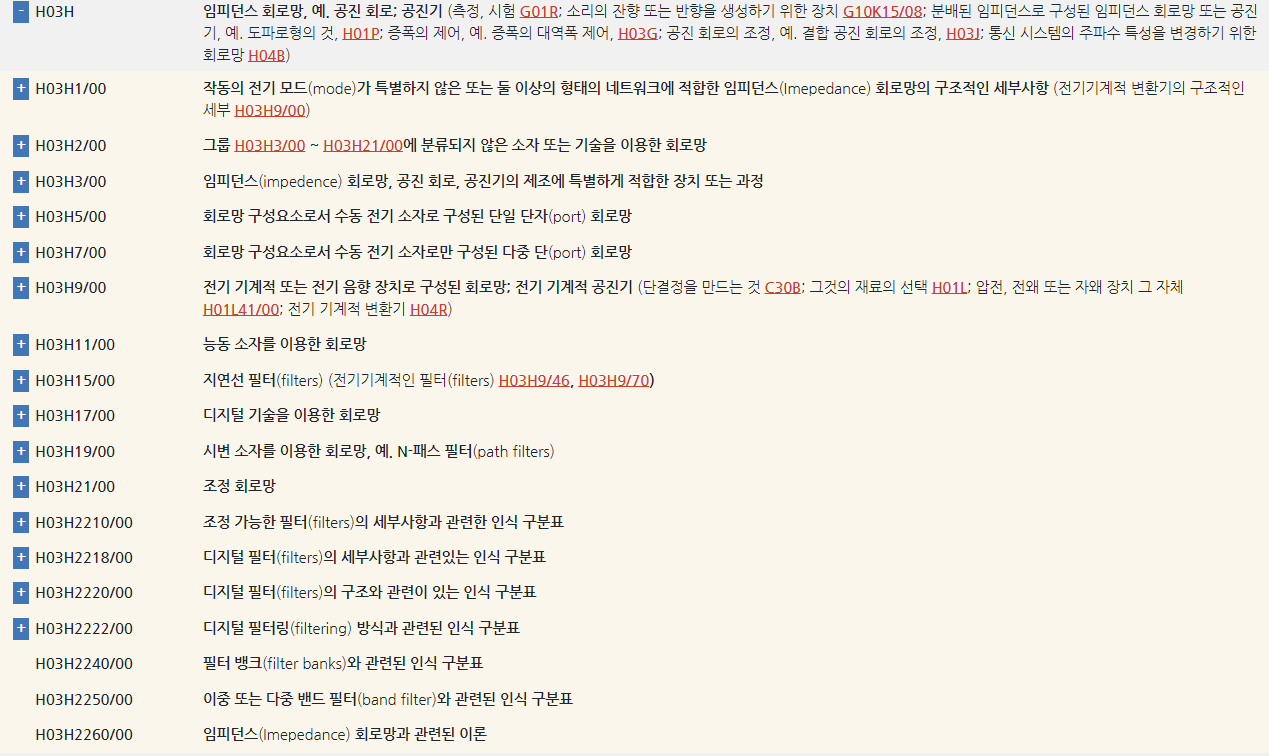

In [ ]:
dataframe = df[df['H03H']==1]
dataframe

,patent_abstract_y,H02N,H03G,H04Q,H03H,H01B,H04J,GoodBad,lemmatization
13,A method for in-phase (I) and quadrature (Q) s...,0,0,0,1,0,0,1,"[method, phase, quadrature, signal, generation..."
382,"In examples, systems and methods for increasin...",0,0,0,1,0,0,1,"[example, system, method, performance, antenna..."
448,A plasma control apparatus includes a power so...,0,0,0,1,0,0,1,"[plasma, control, apparatus, power, source, un..."
500,A method of manufacturing an electronic device...,0,0,0,1,0,0,1,"[method, device, cavity, bottom, surface, surf..."
570,A bulk-acoustic wave resonator includes a subs...,0,0,0,1,0,0,0,"[bulk, wave, resonator, electrode, portion, el..."
...,...,...,...,...,...,...,...,...,...
23770,A high frequency oscillator has a high frequen...,0,0,0,1,0,0,1,"[frequency, oscillator, frequency, generation,..."
23807,A film bulk acoustic resonator (FBAR) and a me...,0,0,0,1,0,0,1,"[film, bulk, resonator, fbar, method, fbar, fo..."
24120,A crystal vibrator includes an AT-cut crystal ...,0,0,0,1,0,0,1,"[vibrator, substrate, vibration, portion, surf..."
24151,A composite substrate according to the present...,0,0,0,1,0,0,1,"[substrate, invention, support, substrate, dia..."


데이터가 240개

In [ ]:
# epoch 반복에 따른 coherence변화

import time

coherences=[]
perplexities=[]
passes=[]

dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############


for i in range(11):

    ntopics, nwords = 10, 50
    if i==0:
        p=1
    else:
        p=i*5
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=p, random_state=0)
    print('epoch',p,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherences.append(coherence)

    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexities.append(lda4.log_perplexity(corpus))

epoch 1 0.8174993991851807
Cpherence -6.496861021302015


Perplexity:  -5.8011859581863945 


epoch 5 1.5589418411254883
Cpherence -6.7100830206094315
Perplexity:  -5.706953435256689 


epoch 10 2.4338176250457764
Cpherence -6.8509110703821054
Perplexity:  -5.669826512816383 


epoch 15 3.6347010135650635
Cpherence -6.788004973476282
Perplexity:  -5.653046451739883 


epoch 20 4.002230882644653
Cpherence -6.945861839074011
Perplexity:  -5.644440693136688 


epoch 25 5.03542685508728
Cpherence -6.97909561604869
Perplexity:  -5.6388108349614585 


epoch 30 5.776927471160889
Cpherence -7.0544662015282995
Perplexity:  -5.634653800595469 


epoch 35 6.81905460357666
Cpherence -7.041763787528355
Perplexity:  -5.631181358983231 


epoch 40 7.7527501583099365
Cpherence -7.169511791312916
Perplexity:  -5.62883291843192 


epoch 45 8.817761659622192
Cpherence -7.181553219857131
Perplexity:  -5.626045615624396 


epoch 50 9.084140062332153
Cpherence -7.064418781666626
Perplexity:  -5.623179947170376 




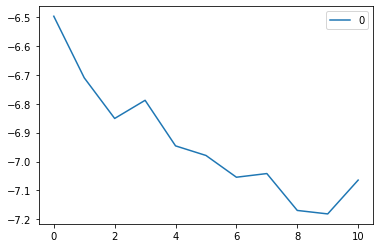

In [ ]:
pd.DataFrame(coherences).plot()

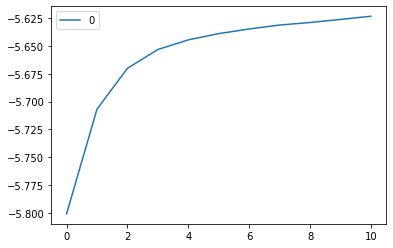

In [ ]:
pd.DataFrame(perplexities).plot()

coherence가 높을수록 좋고, perplexity(거의 비슷)가 낮을수록 좋으므로 3가 best -> passes : 15

In [ ]:
# perplexity, coherence 기준으로 최적의 토픽 개수 선정

coherencesT=[]
perplexitiesT=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(2, 10):
    #nwords = 50
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=i, iterations=400, passes=15, random_state=0) ###
    print('ntopics',ntopics,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherencesT.append(coherence)

    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexitiesT.append(lda4.log_perplexity(corpus))

ntopics 10 4.945345401763916
Cpherence -3.874379078570847
Perplexity:  -5.7354456158222025 


ntopics 10 4.962517023086548
Cpherence -4.5198172393925224
Perplexity:  -5.77713196596018 


ntopics 10 4.728009939193726
Cpherence -5.676148174026274
Perplexity:  -5.725419324083805 


ntopics 10 3.412524938583374
Cpherence -4.989737247579843
Perplexity:  -5.689784902117256 


ntopics 10 3.335792303085327
Cpherence -6.595837674937091
Perplexity:  -5.668717682149043 


ntopics 10 3.030586004257202
Cpherence -6.785892631171501
Perplexity:  -5.662279096484712 


ntopics 10 3.014314889907837
Cpherence -6.99458468475387
Perplexity:  -5.676476855210289 


ntopics 10 3.007089376449585
Cpherence -6.7710211135822185
Perplexity:  -5.642536066366251 




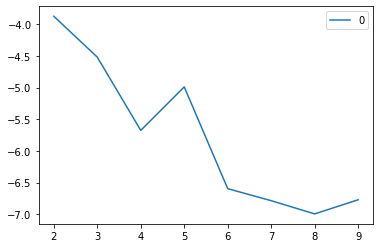

In [ ]:
pd.DataFrame(coherencesT,[2, 3, 4, 5, 6, 7, 8, 9]).plot()

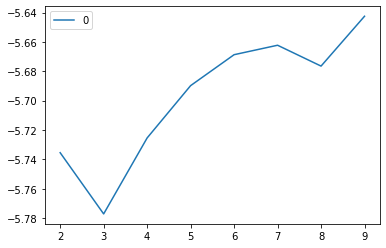

In [ ]:
pd.DataFrame(perplexitiesT,[2, 3, 4, 5, 6, 7, 8, 9]).plot()

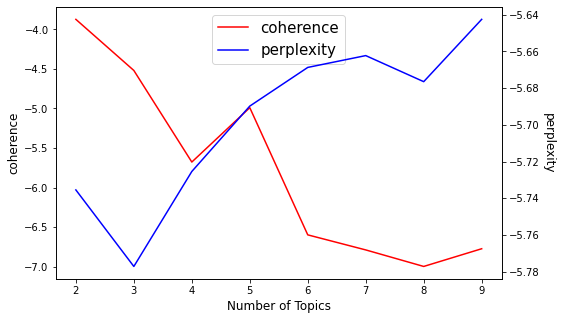

In [ ]:
fig, ax1 = plt.subplots(figsize = (8, 5))
x = [2,3,4,5,6,7,8,9]

ax1.set_xlabel('Number of Topics', fontsize = 12)
ax1.set_ylabel('coherence', rotation = 90, fontsize = 12)
line1 = ax1.plot(x, coherencesT, color = 'red', label = 'coherence')

ax2 =ax1.twinx()
ax2.set_ylabel('perplexity', rotation = -90, labelpad = 15, fontsize = 12)
line2 = ax2.plot(x, perplexitiesT, color = 'blue', label = 'perplexity')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', fontsize = 15)
# plt.title("H01F", fontsize = 20)
plt.show()

최적 토픽 개수 : 5개

In [ ]:
# 최종 모델 돌리기!

import gensim
from gensim import corpora

dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############

## LDA 모델 훈련시키기

NUM_TOPICS = 5 #################
PASSES = 15 
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary,  passes=PASSES, random_state=0) #passes는 알고리즘의 동작 횟수
topics = ldamodel.print_topics(num_words=20) #총 8개의 단어만 출력

for topic in topics:
    print(topic)

(0, '0.041*"capacitor" + 0.024*"member" + 0.022*"terminal" + 0.021*"layer" + 0.020*"resonator" + 0.019*"surface" + 0.019*"plate" + 0.017*"method" + 0.017*"filter" + 0.017*"wave" + 0.014*"structure" + 0.013*"vibration" + 0.013*"plurality" + 0.013*"metal" + 0.012*"network" + 0.011*"end" + 0.010*"device" + 0.010*"connection" + 0.009*"frequency" + 0.009*"match"')
(1, '0.067*"resonator" + 0.042*"portion" + 0.040*"electrode" + 0.040*"arm" + 0.030*"frequency" + 0.029*"circuit" + 0.024*"element" + 0.023*"part" + 0.020*"connection" + 0.019*"filter" + 0.018*"series" + 0.017*"substrate" + 0.016*"end" + 0.016*"finger" + 0.014*"output" + 0.014*"plurality" + 0.014*"component" + 0.013*"side" + 0.013*"idt" + 0.010*"ground"')
(2, '0.046*"circuit" + 0.029*"impedance" + 0.026*"resonator" + 0.026*"device" + 0.025*"control" + 0.021*"transistor" + 0.017*"plurality" + 0.015*"voltage" + 0.014*"stage" + 0.013*"capacitance" + 0.013*"input" + 0.013*"capacitor" + 0.012*"frequency" + 0.012*"unit" + 0.011*"cell" + 

In [ ]:
import pyLDAvis.gensim_models   

pyLDAvis.enable_notebook()  
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)  
pyLDAvis.display(vis)  

In [ ]:
# pyLDAvis html 저장   
pyLDAvis.save_html(vis, '/content/drive/MyDrive/Capstone/LDA/lda_result/H03H_15p_5T.html') ##############

In [ ]:
# 문서 별 토픽 분포 보기

def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,4.0,0.9747,"[(4, 0.9747461)]"
1,1,4.0,0.9774,"[(4, 0.9774215)]"
2,2,2.0,0.9816,"[(2, 0.9815576)]"
3,3,3.0,0.9819,"[(3, 0.9819058)]"
4,4,3.0,0.8152,"[(0, 0.15594094), (3, 0.8152115)]"
5,5,2.0,0.7442,"[(1, 0.2408036), (2, 0.7442467)]"
6,6,4.0,0.7290,"[(1, 0.25753942), (4, 0.728952)]"
7,7,3.0,0.9551,"[(0, 0.011220873), (1, 0.011292457), (2, 0.011..."
8,8,1.0,0.6708,"[(1, 0.67078453), (2, 0.10820109), (4, 0.21080..."
9,9,4.0,0.5997,"[(2, 0.3795733), (4, 0.5996688)]"


In [ ]:
dataframe.reset_index(drop = True, inplace = True)

In [ ]:
final = pd.concat([dataframe,topictable.iloc[:,1:]],axis=1)
final.to_csv('/content/drive/MyDrive/Capstone/data/LDA/LDA_H03H_final.csv')
final

,patent_abstract_y,H02N,H03G,H04Q,H03H,H01B,H04J,GoodBad,lemmatization,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,A method for in-phase (I) and quadrature (Q) s...,0,0,0,1,0,0,1,"[method, phase, quadrature, signal, generation...",4.0,0.9747,"[(4, 0.9747461)]"
1,"In examples, systems and methods for increasin...",0,0,0,1,0,0,1,"[example, system, method, performance, antenna...",4.0,0.9774,"[(4, 0.9774215)]"
2,A plasma control apparatus includes a power so...,0,0,0,1,0,0,1,"[plasma, control, apparatus, power, source, un...",2.0,0.9816,"[(2, 0.9815576)]"
3,A method of manufacturing an electronic device...,0,0,0,1,0,0,1,"[method, device, cavity, bottom, surface, surf...",3.0,0.9819,"[(3, 0.9819058)]"
4,A bulk-acoustic wave resonator includes a subs...,0,0,0,1,0,0,0,"[bulk, wave, resonator, electrode, portion, el...",3.0,0.8152,"[(0, 0.15594094), (3, 0.8152115)]"
...,...,...,...,...,...,...,...,...,...,...,...,...
235,A high frequency oscillator has a high frequen...,0,0,0,1,0,0,1,"[frequency, oscillator, frequency, generation,...",1.0,0.9861,"[(1, 0.98612463)]"
236,A film bulk acoustic resonator (FBAR) and a me...,0,0,0,1,0,0,1,"[film, bulk, resonator, fbar, method, fbar, fo...",0.0,0.5528,"[(0, 0.552788), (3, 0.42826372)]"
237,A crystal vibrator includes an AT-cut crystal ...,0,0,0,1,0,0,1,"[vibrator, substrate, vibration, portion, surf...",3.0,0.8034,"[(2, 0.18324587), (3, 0.80344194)]"
238,A composite substrate according to the present...,0,0,0,1,0,0,1,"[substrate, invention, support, substrate, dia...",1.0,0.7407,"[(1, 0.7406794), (3, 0.24292776)]"


In [ ]:
final = pd.read_csv('/content/drive/MyDrive/Capstone/data/LDA/LDA_H03H_final.csv')
final

,Unnamed: 0,patent_abstract_y,H02N,H03G,H04Q,H03H,H01B,H04J,GoodBad,lemmatization,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,A method for in-phase (I) and quadrature (Q) s...,0,0,0,1,0,0,1,"['method', 'phase', 'quadrature', 'signal', 'g...",4.0,0.9747,"[(4, 0.9747461)]"
1,1,"In examples, systems and methods for increasin...",0,0,0,1,0,0,1,"['example', 'system', 'method', 'performance',...",4.0,0.9774,"[(4, 0.9774215)]"
2,2,A plasma control apparatus includes a power so...,0,0,0,1,0,0,1,"['plasma', 'control', 'apparatus', 'power', 's...",2.0,0.9816,"[(2, 0.9815576)]"
3,3,A method of manufacturing an electronic device...,0,0,0,1,0,0,1,"['method', 'device', 'cavity', 'bottom', 'surf...",3.0,0.9819,"[(3, 0.9819058)]"
4,4,A bulk-acoustic wave resonator includes a subs...,0,0,0,1,0,0,0,"['bulk', 'wave', 'resonator', 'electrode', 'po...",3.0,0.8152,"[(0, 0.15594094), (3, 0.8152115)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,A high frequency oscillator has a high frequen...,0,0,0,1,0,0,1,"['frequency', 'oscillator', 'frequency', 'gene...",1.0,0.9861,"[(1, 0.98612463)]"
236,236,A film bulk acoustic resonator (FBAR) and a me...,0,0,0,1,0,0,1,"['film', 'bulk', 'resonator', 'fbar', 'method'...",0.0,0.5528,"[(0, 0.552788), (3, 0.42826372)]"
237,237,A crystal vibrator includes an AT-cut crystal ...,0,0,0,1,0,0,1,"['vibrator', 'substrate', 'vibration', 'portio...",3.0,0.8034,"[(2, 0.18324587), (3, 0.80344194)]"
238,238,A composite substrate according to the present...,0,0,0,1,0,0,1,"['substrate', 'invention', 'support', 'substra...",1.0,0.7407,"[(1, 0.7406794), (3, 0.24292776)]"


In [ ]:
final['가장 비중이 높은 토픽'].value_counts()

4.0    66
3.0    65
1.0    53
2.0    28
0.0    28
Name: 가장 비중이 높은 토픽, dtype: int64

In [ ]:
final['GoodBad'].value_counts()

1    196
0     44
Name: GoodBad, dtype: int64

In [ ]:
## 확인

check = final.merge(pred, on='patent_abstract_y', how='left')
check

,Unnamed: 0,patent_abstract_y,H02N_x,H03G_x,H04Q_x,H03H_x,H01B_x,H04J_x,GoodBad,lemmatization,...,H04S,H04T,H04W,H05B,H05C,H05F,H05G,H05H,H05K,H99Z
0,0,A method for in-phase (I) and quadrature (Q) s...,0,0,0,1,0,0,1,"['method', 'phase', 'quadrature', 'signal', 'g...",...,0,0,0,0,0,0,0,0,0,0
1,1,"In examples, systems and methods for increasin...",0,0,0,1,0,0,1,"['example', 'system', 'method', 'performance',...",...,0,0,0,0,0,0,0,0,0,0
2,2,A plasma control apparatus includes a power so...,0,0,0,1,0,0,1,"['plasma', 'control', 'apparatus', 'power', 's...",...,0,0,0,0,0,0,0,1,0,0
3,3,A method of manufacturing an electronic device...,0,0,0,1,0,0,1,"['method', 'device', 'cavity', 'bottom', 'surf...",...,0,0,0,0,0,0,0,0,1,0
4,4,A bulk-acoustic wave resonator includes a subs...,0,0,0,1,0,0,0,"['bulk', 'wave', 'resonator', 'electrode', 'po...",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,235,A high frequency oscillator has a high frequen...,0,0,0,1,0,0,1,"['frequency', 'oscillator', 'frequency', 'gene...",...,0,0,0,0,0,0,0,0,0,0
240,236,A film bulk acoustic resonator (FBAR) and a me...,0,0,0,1,0,0,1,"['film', 'bulk', 'resonator', 'fbar', 'method'...",...,0,0,0,0,0,0,0,0,0,0
241,237,A crystal vibrator includes an AT-cut crystal ...,0,0,0,1,0,0,1,"['vibrator', 'substrate', 'vibration', 'portio...",...,0,0,0,0,0,0,0,0,0,0
242,238,A composite substrate according to the present...,0,0,0,1,0,0,1,"['substrate', 'invention', 'support', 'substra...",...,0,0,0,0,0,0,0,0,0,0


In [ ]:
check['H03H_y'].value_counts() # 예측값(1이 예측한 개수)

0    161
1     83
Name: H03H_y, dtype: int64

In [ ]:
check['H03B'].value_counts() # 의심되는 예측값

0    241
1      3
Name: H03B, dtype: int64

In [ ]:
check['H03J'].value_counts() # 의심되는 예측값

0    244
Name: H03J, dtype: int64

In [ ]:
check['H01L'].value_counts()

0    225
1     19
Name: H01L, dtype: int64

In [ ]:
check.iloc[:,13:].sum().sort_values(ascending=False)

H03H_y    83
H01L      19
H03K      11
H04L      10
H04B       9
H01P       9
H03F       8
H01F       8
H02M       7
H01Q       7
H05K       6
H01J       5
H03M       5
H01G       4
H04R       4
H03B       3
H03L       2
H01H       2
H05B       2
H02J       2
H05H       2
H02K       1
H01M       1
H04W       1
H01R       1
H01S       1
H02G       1
H05G       0
H04M       0
H04K       0
H04N       0
H05C       0
H05F       0
H04S       0
H04T       0
H04Q_y     0
H01B_y     0
H04J_y     0
H04H       0
H03J       0
H03G_y     0
H01C       0
H03D       0
H03C       0
H02S       0
H02P       0
H02N_y     0
H02H       0
H02B       0
H01T       0
H01K       0
H99Z       0
dtype: int64

# 5. H01B
- 데이터 278개 / passes 25 / topic 4개

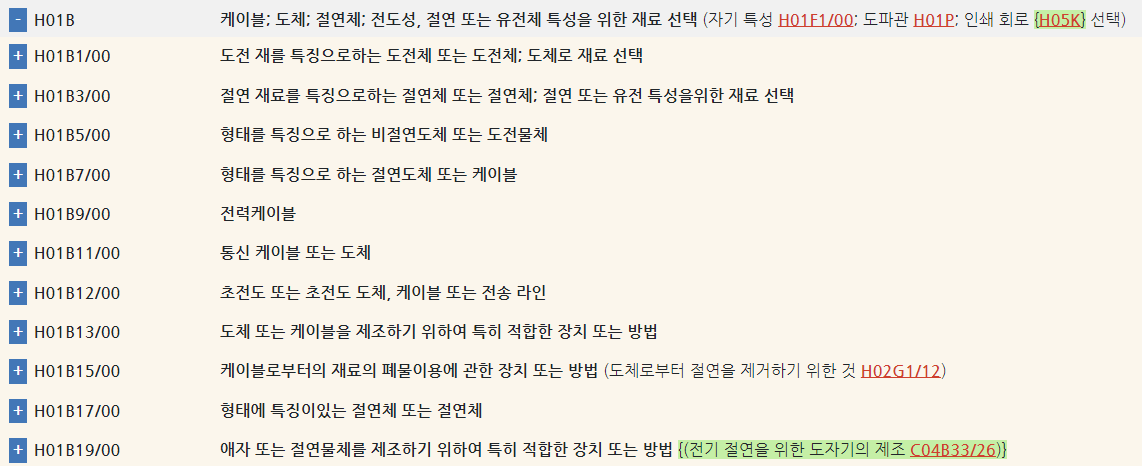

In [ ]:
dataframe = df[df['H01B']==1]
dataframe

,patent_abstract_y,H02N,H03G,H04Q,H03H,H01B,H04J,GoodBad,lemmatization
65,An electrochromic device according to an embod...,0,0,0,0,1,0,1,"[device, comprises, layer, ion, storage, layer..."
92,An electrical contact element for a car chargi...,0,0,0,0,1,0,1,"[contact, element, car, plug, connector, conta..."
124,A strut insulator for an overhead rail contact...,0,0,0,0,1,0,1,"[strut, insulator, rail, contact, system, end,..."
151,A highly bendable insulated electric wire incl...,0,0,0,0,1,0,0,"[wire, wire, plurality, metal, strand, insulat..."
157,Provided are resin composition and a molded ar...,0,0,0,0,1,0,1,"[resin, composition, article, resin, compositi..."
...,...,...,...,...,...,...,...,...,...
23763,A polymer composition that contains a polyamid...,0,0,0,0,1,0,1,"[polymer, composition, composition, exhibit, i..."
23918,A method for forming a carbon fiber-reinforced...,0,0,0,0,1,0,1,"[method, carbon, fiber, matrix, distributing, ..."
23955,An object of the present invention is to provi...,0,0,0,0,1,0,1,"[invention, provide, dispersant, resin, collec..."
24138,A monitoring device for managing at least one ...,0,0,0,0,1,0,1,"[monitoring, device, applicator, fixture, body..."


데이터가 278개

In [ ]:
# epoch 반복에 따른 coherence변화

import time

coherences=[]
perplexities=[]
passes=[]

dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############


for i in range(11):

    ntopics, nwords = 10, 50
    if i==0:
        p=1
    else:
        p=i*5
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=p, random_state=0)
    print('epoch',p,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherences.append(coherence)

    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexities.append(lda4.log_perplexity(corpus))

epoch 1 0.9511406421661377
Cpherence -7.560207259993911
Perplexity:  -6.080356308715402 




epoch 5 1.5709338188171387
Cpherence -8.062664579961718
Perplexity:  -6.037002140206923 


epoch 10 2.5475146770477295
Cpherence -8.301740081991495
Perplexity:  -6.012027327757261 


epoch 15 4.274987697601318
Cpherence -8.294673358336194
Perplexity:  -5.9970773001900115 


epoch 20 4.803713798522949
Cpherence -8.112207650930795
Perplexity:  -5.989104973689005 


epoch 25 5.420415639877319
Cpherence -7.862301380375553
Perplexity:  -5.982744427245352 


epoch 30 6.435375928878784
Cpherence -7.963120123861867
Perplexity:  -5.9777050628657395 


epoch 35 7.24219012260437
Cpherence -7.9227237187793
Perplexity:  -5.972995958365399 


epoch 40 8.076204538345337
Cpherence -8.089373119553018
Perplexity:  -5.967943708008538 


epoch 45 9.038270473480225
Cpherence -7.964023725607321
Perplexity:  -5.963243691285235 


epoch 50 9.93191647529602
Cpherence -7.811594245316094
Perplexity:  -5.958779917542014 




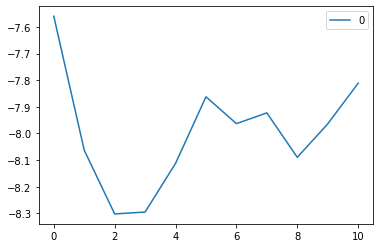

In [ ]:
pd.DataFrame(coherences).plot()

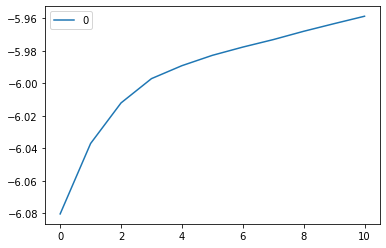

In [ ]:
pd.DataFrame(perplexities).plot()

coherence가 높을수록 좋고, perplexity(거의 비슷)가 낮을수록 좋으므로 5이 best -> passes : 25

In [ ]:
# perplexity, coherence 기준으로 최적의 토픽 개수 선정

coherencesT=[]
perplexitiesT=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(2, 10):
    #nwords = 50
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=i, iterations=400, passes=25, random_state=0) ###
    print('ntopics',ntopics,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherencesT.append(coherence)

    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexitiesT.append(lda4.log_perplexity(corpus))

ntopics 10 6.723658084869385
Cpherence -4.1030403288531065
Perplexity:  -6.013481764651276 


ntopics 10 6.6742613315582275
Cpherence -6.002899368328028
Perplexity:  -6.005667935348282 


ntopics 10 6.177389860153198
Cpherence -5.44939796345484
Perplexity:  -6.035959891950969 


ntopics 10 5.886594772338867
Cpherence -5.795544201434787
Perplexity:  -6.038840998569515 


ntopics 10 5.521578788757324
Cpherence -6.192694253875577
Perplexity:  -6.021925432962738 


ntopics 10 5.5034019947052
Cpherence -7.349280622799189
Perplexity:  -6.001005518135681 


ntopics 10 5.294739484786987
Cpherence -7.275098491940677
Perplexity:  -5.978978635406483 


ntopics 10 5.393783330917358
Cpherence -7.539696139223589
Perplexity:  -5.990860576813038 




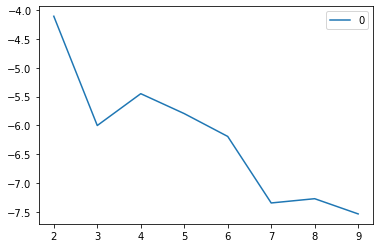

In [ ]:
pd.DataFrame(coherencesT,[2, 3, 4, 5, 6, 7, 8, 9]).plot()

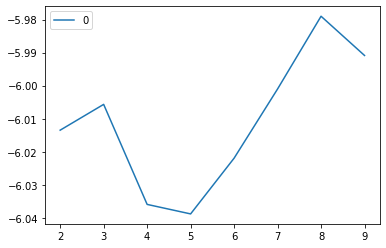

In [ ]:
pd.DataFrame(perplexitiesT,[2, 3, 4, 5, 6, 7, 8, 9]).plot()

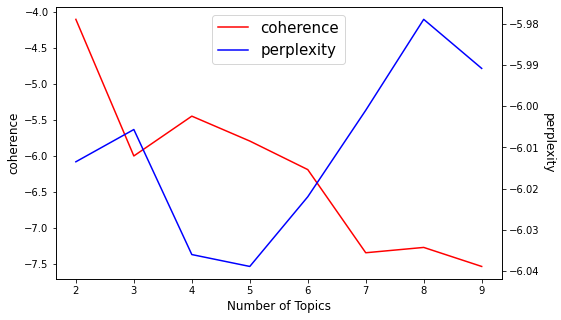

In [ ]:
fig, ax1 = plt.subplots(figsize = (8, 5))
x = [2,3,4,5,6,7,8,9]

ax1.set_xlabel('Number of Topics', fontsize = 12)
ax1.set_ylabel('coherence', rotation = 90, fontsize = 12)
line1 = ax1.plot(x, coherencesT, color = 'red', label = 'coherence')

ax2 =ax1.twinx()
ax2.set_ylabel('perplexity', rotation = -90, labelpad = 15, fontsize = 12)
line2 = ax2.plot(x, perplexitiesT, color = 'blue', label = 'perplexity')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', fontsize = 15)
# plt.title("H01F", fontsize = 20)
plt.show()

최적 토픽 개수 : 4개

In [ ]:
# 최종 모델 돌리기!

import gensim
from gensim import corpora

dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############

## LDA 모델 훈련시키기

NUM_TOPICS = 4 #################
PASSES = 25
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary,  passes=PASSES, random_state=0) #passes는 알고리즘의 동작 횟수
topics = ldamodel.print_topics(num_words=20) #총 8개의 단어만 출력

for topic in topics:
    print(topic)

(0, '0.030*"layer" + 0.028*"particle" + 0.022*"body" + 0.022*"part" + 0.021*"device" + 0.016*"group" + 0.016*"surface" + 0.016*"resin" + 0.016*"polymer" + 0.015*"conductor" + 0.014*"connection" + 0.013*"wherein" + 0.012*"structure" + 0.012*"metal" + 0.012*"composition" + 0.011*"method" + 0.011*"carbon" + 0.010*"material" + 0.009*"contact" + 0.008*"transparent"')
(1, '0.085*"wire" + 0.053*"portion" + 0.041*"conductor" + 0.024*"plurality" + 0.019*"material" + 0.017*"power" + 0.015*"harness" + 0.014*"member" + 0.013*"cable" + 0.012*"section" + 0.012*"body" + 0.010*"outer" + 0.009*"direction" + 0.009*"surface" + 0.009*"voltage" + 0.008*"housing" + 0.008*"sheath" + 0.008*"side" + 0.008*"contact" + 0.008*"cover"')
(2, '0.032*"material" + 0.027*"line" + 0.022*"surface" + 0.018*"member" + 0.017*"particle" + 0.016*"method" + 0.013*"carbon" + 0.012*"direction" + 0.012*"step" + 0.012*"power" + 0.012*"region" + 0.011*"support" + 0.011*"port" + 0.011*"plurality" + 0.011*"rubber" + 0.010*"metal" + 0

In [ ]:
import pyLDAvis.gensim_models   

pyLDAvis.enable_notebook()  
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)  
pyLDAvis.display(vis)  

In [ ]:
# pyLDAvis html 저장   
pyLDAvis.save_html(vis, '/content/drive/MyDrive/Capstone/LDA/lda_result/H01B_25p_4T.html') ##############

In [ ]:
# 문서 별 토픽 분포 보기

def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,0.0,0.9766,"[(0, 0.97655106)]"
1,1,0.0,0.9681,"[(0, 0.96807444), (1, 0.010860852), (3, 0.0111..."
2,2,3.0,0.9794,"[(3, 0.9794452)]"
3,3,1.0,0.7544,"[(1, 0.75440174), (3, 0.22577807)]"
4,4,0.0,0.5273,"[(0, 0.52733225), (1, 0.011454582), (2, 0.2670..."
5,5,1.0,0.6853,"[(0, 0.016476229), (1, 0.6852774), (2, 0.01627..."
6,6,1.0,0.9787,"[(1, 0.9787481)]"
7,7,2.0,0.6329,"[(2, 0.63288933), (3, 0.3517161)]"
8,8,2.0,0.8281,"[(2, 0.82811826), (3, 0.16057877)]"
9,9,0.0,0.9804,"[(0, 0.98039186)]"


In [ ]:
dataframe.reset_index(drop = True, inplace = True)

In [ ]:
final = pd.concat([dataframe,topictable.iloc[:,1:]],axis=1)
final.to_csv('/content/drive/MyDrive/Capstone/data/LDA/LDA_H01B_final.csv')
final

,patent_abstract_y,H02N,H03G,H04Q,H03H,H01B,H04J,GoodBad,lemmatization,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,An electrochromic device according to an embod...,0,0,0,0,1,0,1,"[device, comprises, layer, ion, storage, layer...",0.0,0.9766,"[(0, 0.97655106)]"
1,An electrical contact element for a car chargi...,0,0,0,0,1,0,1,"[contact, element, car, plug, connector, conta...",0.0,0.9681,"[(0, 0.96807444), (1, 0.010860852), (3, 0.0111..."
2,A strut insulator for an overhead rail contact...,0,0,0,0,1,0,1,"[strut, insulator, rail, contact, system, end,...",3.0,0.9794,"[(3, 0.9794452)]"
3,A highly bendable insulated electric wire incl...,0,0,0,0,1,0,0,"[wire, wire, plurality, metal, strand, insulat...",1.0,0.7544,"[(1, 0.75440174), (3, 0.22577807)]"
4,Provided are resin composition and a molded ar...,0,0,0,0,1,0,1,"[resin, composition, article, resin, compositi...",0.0,0.5273,"[(0, 0.52733225), (1, 0.011454582), (2, 0.2670..."
...,...,...,...,...,...,...,...,...,...,...,...,...
273,A polymer composition that contains a polyamid...,0,0,0,0,1,0,1,"[polymer, composition, composition, exhibit, i...",3.0,0.9442,"[(0, 0.019476727), (1, 0.017953666), (2, 0.018..."
274,A method for forming a carbon fiber-reinforced...,0,0,0,0,1,0,1,"[method, carbon, fiber, matrix, distributing, ...",3.0,0.7900,"[(2, 0.19361709), (3, 0.7899678)]"
275,An object of the present invention is to provi...,0,0,0,0,1,0,1,"[invention, provide, dispersant, resin, collec...",3.0,0.7383,"[(0, 0.010261558), (2, 0.2416428), (3, 0.73826..."
276,A monitoring device for managing at least one ...,0,0,0,0,1,0,1,"[monitoring, device, applicator, fixture, body...",0.0,0.9841,"[(0, 0.984076)]"


In [ ]:
final = pd.read_csv('/content/drive/MyDrive/Capstone/data/LDA/LDA_H01B_final.csv')
final

,Unnamed: 0,patent_abstract_y,H02N,H03G,H04Q,H03H,H01B,H04J,GoodBad,lemmatization,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,An electrochromic device according to an embod...,0,0,0,0,1,0,1,"['device', 'comprises', 'layer', 'ion', 'stora...",0.0,0.9766,"[(0, 0.97655106)]"
1,1,An electrical contact element for a car chargi...,0,0,0,0,1,0,1,"['contact', 'element', 'car', 'plug', 'connect...",0.0,0.9681,"[(0, 0.96807444), (1, 0.010860852), (3, 0.0111..."
2,2,A strut insulator for an overhead rail contact...,0,0,0,0,1,0,1,"['strut', 'insulator', 'rail', 'contact', 'sys...",3.0,0.9794,"[(3, 0.9794452)]"
3,3,A highly bendable insulated electric wire incl...,0,0,0,0,1,0,0,"['wire', 'wire', 'plurality', 'metal', 'strand...",1.0,0.7544,"[(1, 0.75440174), (3, 0.22577807)]"
4,4,Provided are resin composition and a molded ar...,0,0,0,0,1,0,1,"['resin', 'composition', 'article', 'resin', '...",0.0,0.5273,"[(0, 0.52733225), (1, 0.011454582), (2, 0.2670..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,273,A polymer composition that contains a polyamid...,0,0,0,0,1,0,1,"['polymer', 'composition', 'composition', 'exh...",3.0,0.9442,"[(0, 0.019476727), (1, 0.017953666), (2, 0.018..."
274,274,A method for forming a carbon fiber-reinforced...,0,0,0,0,1,0,1,"['method', 'carbon', 'fiber', 'matrix', 'distr...",3.0,0.7900,"[(2, 0.19361709), (3, 0.7899678)]"
275,275,An object of the present invention is to provi...,0,0,0,0,1,0,1,"['invention', 'provide', 'dispersant', 'resin'...",3.0,0.7383,"[(0, 0.010261558), (2, 0.2416428), (3, 0.73826..."
276,276,A monitoring device for managing at least one ...,0,0,0,0,1,0,1,"['monitoring', 'device', 'applicator', 'fixtur...",0.0,0.9841,"[(0, 0.984076)]"


In [ ]:
final['가장 비중이 높은 토픽'].value_counts()

3.0    84
1.0    84
0.0    60
2.0    50
Name: 가장 비중이 높은 토픽, dtype: int64

In [ ]:
final['GoodBad'].value_counts()

1    233
0     45
Name: GoodBad, dtype: int64

In [ ]:
## 확인

check = final.merge(pred, on='patent_abstract_y', how='left')
check

,Unnamed: 0,patent_abstract_y,H02N_x,H03G_x,H04Q_x,H03H_x,H01B_x,H04J_x,GoodBad,lemmatization,...,H04S,H04T,H04W,H05B,H05C,H05F,H05G,H05H,H05K,H99Z
0,0,An electrochromic device according to an embod...,0,0,0,0,1,0,1,"['device', 'comprises', 'layer', 'ion', 'stora...",...,0,0,0,0,0,0,0,0,0,0
1,1,An electrical contact element for a car chargi...,0,0,0,0,1,0,1,"['contact', 'element', 'car', 'plug', 'connect...",...,0,0,0,0,0,0,0,0,0,0
2,2,A strut insulator for an overhead rail contact...,0,0,0,0,1,0,1,"['strut', 'insulator', 'rail', 'contact', 'sys...",...,0,0,0,0,0,0,0,0,0,0
3,3,A highly bendable insulated electric wire incl...,0,0,0,0,1,0,0,"['wire', 'wire', 'plurality', 'metal', 'strand...",...,0,0,0,0,0,0,0,0,0,0
4,4,Provided are resin composition and a molded ar...,0,0,0,0,1,0,1,"['resin', 'composition', 'article', 'resin', '...",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,273,A polymer composition that contains a polyamid...,0,0,0,0,1,0,1,"['polymer', 'composition', 'composition', 'exh...",...,0,0,0,0,0,0,0,0,0,0
274,274,A method for forming a carbon fiber-reinforced...,0,0,0,0,1,0,1,"['method', 'carbon', 'fiber', 'matrix', 'distr...",...,0,0,0,0,0,0,0,0,0,0
275,275,An object of the present invention is to provi...,0,0,0,0,1,0,1,"['invention', 'provide', 'dispersant', 'resin'...",...,0,0,0,0,0,0,0,0,0,0
276,276,A monitoring device for managing at least one ...,0,0,0,0,1,0,1,"['monitoring', 'device', 'applicator', 'fixtur...",...,0,0,0,0,0,0,0,0,0,0


In [ ]:
check['H01B_y'].value_counts() # 예측값(1이 예측한 개수)

0    186
1     92
Name: H01B_y, dtype: int64

In [ ]:
check.iloc[:,13:].sum().sort_values(ascending=False)

H01B_y    92
H01M      26
H02G      25
H01L      20
H01R      17
H05K       9
H05B       5
H02K       4
H01G       3
H01F       2
H01P       2
H04L       2
H03H_y     2
H02J       2
H01J       1
H04N       1
H03K       1
H04K       0
H04Q_y     0
H04H       0
H04M       0
H04J_y     0
H04W       0
H04R       0
H04S       0
H04T       0
H03M       0
H05C       0
H05F       0
H05G       0
H05H       0
H04B       0
H03F       0
H03L       0
H02M       0
H01H       0
H01K       0
H01Q       0
H01S       0
H01T       0
H02B       0
H02H       0
H02N_y     0
H03J       0
H02P       0
H02S       0
H03B       0
H03C       0
H03D       0
H01C       0
H03G_y     0
H99Z       0
dtype: int64

# 6. H04J
- 데이터 323개 / passes : 45 / topic : 3개
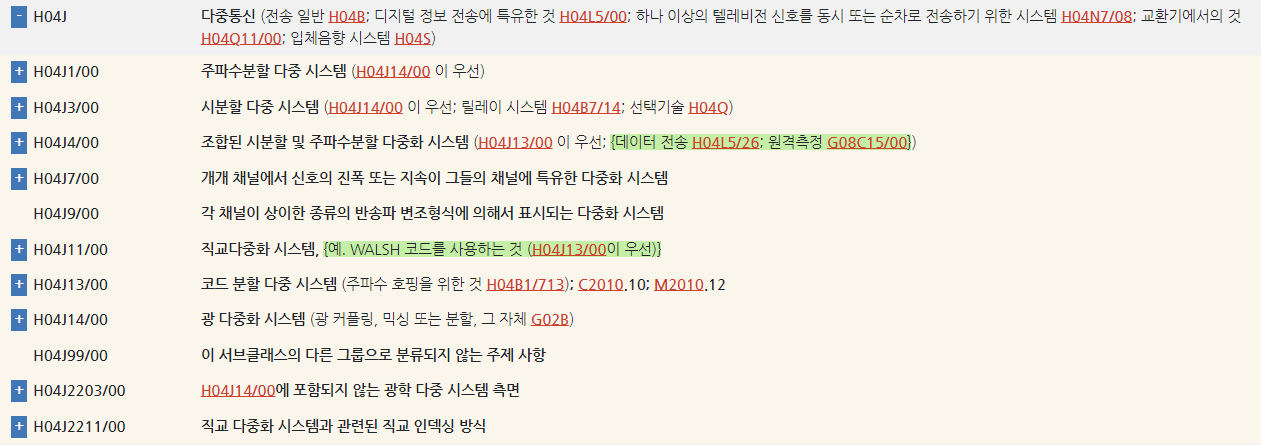

In [ ]:
dataframe = df[df['H04J']==1]
dataframe

,patent_abstract_y,H02N,H03G,H04Q,H03H,H01B,H04J,GoodBad,lemmatization
36,A broadcast signal transmitter includes a firs...,0,0,0,0,0,1,1,"[transmitter, bit, bit, core, layer, data, cor..."
91,Apparatus and methods for guaranteeing a quali...,0,0,1,0,0,1,1,"[apparatus, method, quality, experience, qoe, ..."
222,A transmission apparatus includes: a data-symb...,0,0,0,0,0,1,1,"[transmission, apparatus, data, symbol, genera..."
250,A method for a channel state measurement in a ...,0,0,0,0,0,1,1,"[method, channel, state, measurement, wireless..."
257,A system and method of synchronizing a mesh ne...,0,0,0,0,0,1,1,"[system, method, network, plurality, node, met..."
...,...,...,...,...,...,...,...,...,...
23410,A PTRS processing method and an apparatus. The...,0,0,0,0,0,1,1,"[ptrs, processing, method, apparatus, method, ..."
23534,It is possible to provide a radio communicatio...,0,0,0,0,0,1,1,"[provide, radio, communication, device, radio,..."
23593,The disclosure relates to a distribution devic...,0,0,0,0,0,1,1,"[disclosure, distribution, device, information..."
23861,Techniques are described for wireless communic...,0,0,0,0,0,1,1,"[technique, communication, method, wireless, c..."


데이터가 323개

In [ ]:
# epoch 반복에 따른 coherence변화

import time

coherences=[]
perplexities=[]
passes=[]

dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############


for i in range(11):

    ntopics, nwords = 10, 50
    if i==0:
        p=1
    else:
        p=i*5
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=p, random_state=0)
    print('epoch',p,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherences.append(coherence)

    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexities.append(lda4.log_perplexity(corpus))

epoch 1 1.1541564464569092
Cpherence -4.167661325897052
Perplexity:  -5.935919028586105 




epoch 5 2.161410331726074
Cpherence -4.345333802641019
Perplexity:  -5.870880098075802 


epoch 10 4.737090110778809
Cpherence -4.568020052517077
Perplexity:  -5.840078633111193 


epoch 15 5.189601182937622
Cpherence -4.686566126949155
Perplexity:  -5.824466733679277 


epoch 20 6.6787660121917725
Cpherence -4.619598047914417
Perplexity:  -5.8169040057869585 


epoch 25 7.291560888290405
Cpherence -4.548615624761727
Perplexity:  -5.811851259312544 


epoch 30 8.683237552642822
Cpherence -4.48714647838824
Perplexity:  -5.808273983707984 


epoch 35 9.857842922210693
Cpherence -4.409317804561058
Perplexity:  -5.805157964452355 


epoch 40 11.213565826416016
Cpherence -4.3765889784431815
Perplexity:  -5.802842148402306 


epoch 45 12.525236368179321
Cpherence -4.238701011759863
Perplexity:  -5.800998797592629 


epoch 50 13.370739698410034
Cpherence -4.23095069994579
Perplexity:  -5.799486784305998 




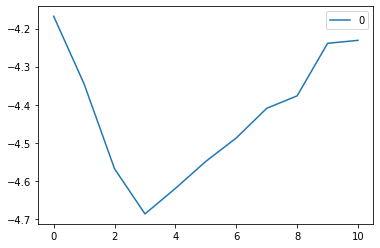

In [ ]:
pd.DataFrame(coherences).plot()

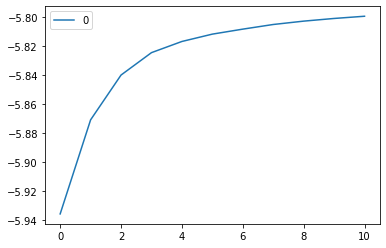

In [ ]:
pd.DataFrame(perplexities).plot()

coherence가 높을수록 좋고, perplexity(거의 비슷)가 낮을수록 좋으므로 9이 best -> passes : 45

In [ ]:
# perplexity, coherence 기준으로 최적의 토픽 개수 선정

coherencesT=[]
perplexitiesT=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(2, 10):
    #nwords = 50
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=i, iterations=400, passes=45, random_state=0) ###
    print('ntopics',ntopics,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherencesT.append(coherence)

    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexitiesT.append(lda4.log_perplexity(corpus))

ntopics 10 17.212887048721313
Cpherence -2.330078916080729
Perplexity:  -5.897387085851634 


ntopics 10 16.918540716171265
Cpherence -2.8520128834463168
Perplexity:  -5.842565858499965 


ntopics 10 13.361300706863403
Cpherence -4.118702201577602
Perplexity:  -5.844650136371318 


ntopics 10 12.348875999450684
Cpherence -3.868368692970507
Perplexity:  -5.803484248456892 


ntopics 10 12.331003427505493
Cpherence -3.9021253414776
Perplexity:  -5.794844349090466 


ntopics 10 12.311869621276855
Cpherence -4.891363153558834
Perplexity:  -5.8055197097773 


ntopics 10 11.724146604537964
Cpherence -4.539178904479364
Perplexity:  -5.800548629822601 


ntopics 10 12.31045937538147
Cpherence -5.094013524256149
Perplexity:  -5.796403673978211 




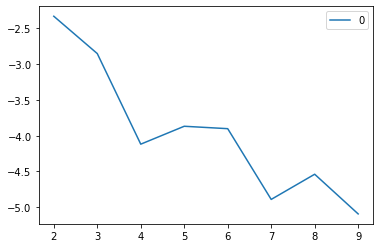

In [ ]:
pd.DataFrame(coherencesT,[2, 3, 4, 5, 6, 7, 8, 9]).plot()

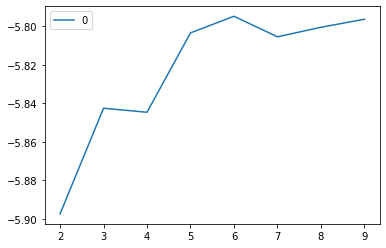

In [ ]:
pd.DataFrame(perplexitiesT,[2, 3, 4, 5, 6, 7, 8, 9]).plot()

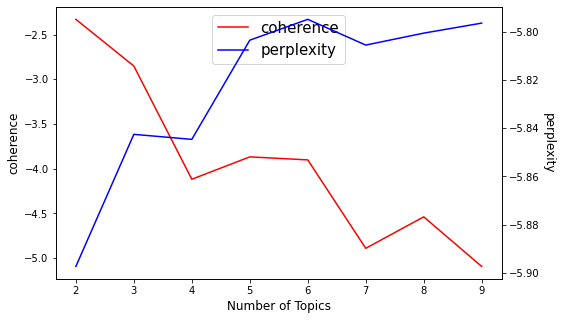

In [ ]:
fig, ax1 = plt.subplots(figsize = (8, 5))
x = [2,3,4,5,6,7,8,9]

ax1.set_xlabel('Number of Topics', fontsize = 12)
ax1.set_ylabel('coherence', rotation = 90, fontsize = 12)
line1 = ax1.plot(x, coherencesT, color = 'red', label = 'coherence')

ax2 =ax1.twinx()
ax2.set_ylabel('perplexity', rotation = -90, labelpad = 15, fontsize = 12)
line2 = ax2.plot(x, perplexitiesT, color = 'blue', label = 'perplexity')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', fontsize = 15)
# plt.title("H01F", fontsize = 20)
plt.show()

최적 토픽 개수 : 3개

In [ ]:
# 최종 모델 돌리기!

import gensim
from gensim import corpora

dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############

## LDA 모델 훈련시키기

NUM_TOPICS = 3 #################
PASSES = 45
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary,  passes=PASSES, random_state=0) #passes는 알고리즘의 동작 횟수
topics = ldamodel.print_topics(num_words=20) #총 8개의 단어만 출력

for topic in topics:
    print(topic)

(0, '0.048*"network" + 0.022*"data" + 0.019*"unit" + 0.016*"plurality" + 0.016*"system" + 0.016*"method" + 0.015*"packet" + 0.014*"information" + 0.013*"fiber" + 0.012*"beam" + 0.012*"device" + 0.012*"stream" + 0.011*"module" + 0.010*"line" + 0.010*"communication" + 0.010*"interface" + 0.010*"time" + 0.009*"embodiment" + 0.009*"power" + 0.008*"switch"')
(1, '0.062*"signal" + 0.031*"data" + 0.029*"network" + 0.021*"plurality" + 0.020*"port" + 0.020*"channel" + 0.019*"device" + 0.018*"time" + 0.017*"node" + 0.017*"transmission" + 0.017*"reference" + 0.016*"synchronization" + 0.016*"clock" + 0.015*"method" + 0.014*"output" + 0.012*"control" + 0.012*"unit" + 0.012*"wavelength" + 0.011*"path" + 0.011*"information"')
(2, '0.043*"communication" + 0.031*"device" + 0.026*"system" + 0.024*"transmission" + 0.024*"station" + 0.022*"information" + 0.021*"base" + 0.019*"sequence" + 0.019*"method" + 0.018*"cell" + 0.017*"resource" + 0.016*"channel" + 0.016*"time" + 0.015*"frequency" + 0.014*"radio" +

In [ ]:
import pyLDAvis.gensim_models   

pyLDAvis.enable_notebook()  
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)  
pyLDAvis.display(vis)  

In [ ]:
# pyLDAvis html 저장   
pyLDAvis.save_html(vis, '/content/drive/MyDrive/Capstone/LDA/lda_result/H04J_45p_3T.html') ##############

In [ ]:
# 문서 별 토픽 분포 보기

def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,2.0,0.6857,"[(1, 0.3051691), (2, 0.6856595)]"
1,1,0.0,0.9885,"[(0, 0.988541)]"
2,2,1.0,0.9849,"[(1, 0.98494756)]"
3,3,2.0,0.9806,"[(1, 0.010137253), (2, 0.9806329)]"
4,4,2.0,0.3982,"[(0, 0.24200879), (1, 0.35979027), (2, 0.39820..."
5,5,1.0,0.9593,"[(0, 0.019304674), (1, 0.9592756), (2, 0.02141..."
6,6,0.0,0.5320,"[(0, 0.5320265), (1, 0.37923855), (2, 0.088734..."
7,7,0.0,0.9692,"[(0, 0.96915025), (1, 0.02036931), (2, 0.01048..."
8,8,0.0,0.9785,"[(0, 0.9785057), (1, 0.010115876), (2, 0.01137..."
9,9,2.0,0.8355,"[(1, 0.15572488), (2, 0.8355046)]"


In [ ]:
dataframe.reset_index(drop = True, inplace = True)

In [ ]:
final = pd.concat([dataframe,topictable.iloc[:,1:]],axis=1)
final.to_csv('/content/drive/MyDrive/Capstone/data/LDA/LDA_H04J_final.csv')
final

,patent_abstract_y,H02N,H03G,H04Q,H03H,H01B,H04J,GoodBad,lemmatization,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,A broadcast signal transmitter includes a firs...,0,0,0,0,0,1,1,"[transmitter, bit, bit, core, layer, data, cor...",2.0,0.6857,"[(1, 0.3051691), (2, 0.6856595)]"
1,Apparatus and methods for guaranteeing a quali...,0,0,1,0,0,1,1,"[apparatus, method, quality, experience, qoe, ...",0.0,0.9885,"[(0, 0.988541)]"
2,A transmission apparatus includes: a data-symb...,0,0,0,0,0,1,1,"[transmission, apparatus, data, symbol, genera...",1.0,0.9849,"[(1, 0.98494756)]"
3,A method for a channel state measurement in a ...,0,0,0,0,0,1,1,"[method, channel, state, measurement, wireless...",2.0,0.9806,"[(1, 0.010137253), (2, 0.9806329)]"
4,A system and method of synchronizing a mesh ne...,0,0,0,0,0,1,1,"[system, method, network, plurality, node, met...",2.0,0.3982,"[(0, 0.24200879), (1, 0.35979027), (2, 0.39820..."
...,...,...,...,...,...,...,...,...,...,...,...,...
318,A PTRS processing method and an apparatus. The...,0,0,0,0,0,1,1,"[ptrs, processing, method, apparatus, method, ...",0.0,0.9826,"[(0, 0.982626)]"
319,It is possible to provide a radio communicatio...,0,0,0,0,0,1,1,"[provide, radio, communication, device, radio,...",1.0,0.7809,"[(1, 0.7808555), (2, 0.21037915)]"
320,The disclosure relates to a distribution devic...,0,0,0,0,0,1,1,"[disclosure, distribution, device, information...",1.0,0.8823,"[(0, 0.010267718), (1, 0.8822504), (2, 0.10748..."
321,Techniques are described for wireless communic...,0,0,0,0,0,1,1,"[technique, communication, method, wireless, c...",2.0,0.9780,"[(0, 0.01089464), (1, 0.011067726), (2, 0.9780..."


In [ ]:
final = pd.read_csv('/content/drive/MyDrive/Capstone/data/LDA/LDA_H04J_final.csv')
final

,Unnamed: 0,patent_abstract_y,H02N,H03G,H04Q,H03H,H01B,H04J,GoodBad,lemmatization,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,A broadcast signal transmitter includes a firs...,0,0,0,0,0,1,1,"['transmitter', 'bit', 'bit', 'core', 'layer',...",2.0,0.6857,"[(1, 0.3051691), (2, 0.6856595)]"
1,1,Apparatus and methods for guaranteeing a quali...,0,0,1,0,0,1,1,"['apparatus', 'method', 'quality', 'experience...",0.0,0.9885,"[(0, 0.988541)]"
2,2,A transmission apparatus includes: a data-symb...,0,0,0,0,0,1,1,"['transmission', 'apparatus', 'data', 'symbol'...",1.0,0.9849,"[(1, 0.98494756)]"
3,3,A method for a channel state measurement in a ...,0,0,0,0,0,1,1,"['method', 'channel', 'state', 'measurement', ...",2.0,0.9806,"[(1, 0.010137253), (2, 0.9806329)]"
4,4,A system and method of synchronizing a mesh ne...,0,0,0,0,0,1,1,"['system', 'method', 'network', 'plurality', '...",2.0,0.3982,"[(0, 0.24200879), (1, 0.35979027), (2, 0.39820..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,318,A PTRS processing method and an apparatus. The...,0,0,0,0,0,1,1,"['ptrs', 'processing', 'method', 'apparatus', ...",0.0,0.9826,"[(0, 0.982626)]"
319,319,It is possible to provide a radio communicatio...,0,0,0,0,0,1,1,"['provide', 'radio', 'communication', 'device'...",1.0,0.7809,"[(1, 0.7808555), (2, 0.21037915)]"
320,320,The disclosure relates to a distribution devic...,0,0,0,0,0,1,1,"['disclosure', 'distribution', 'device', 'info...",1.0,0.8823,"[(0, 0.010267718), (1, 0.8822504), (2, 0.10748..."
321,321,Techniques are described for wireless communic...,0,0,0,0,0,1,1,"['technique', 'communication', 'method', 'wire...",2.0,0.9780,"[(0, 0.01089464), (1, 0.011067726), (2, 0.9780..."


In [ ]:
final['가장 비중이 높은 토픽'].value_counts()

2.0    134
1.0    112
0.0     77
Name: 가장 비중이 높은 토픽, dtype: int64

In [ ]:
final['GoodBad'].value_counts()

1    310
0     13
Name: GoodBad, dtype: int64

In [ ]:
## 확인

check = final.merge(pred, on='patent_abstract_y', how='left')
check

,Unnamed: 0,patent_abstract_y,H02N_x,H03G_x,H04Q_x,H03H_x,H01B_x,H04J_x,GoodBad,lemmatization,...,H04S,H04T,H04W,H05B,H05C,H05F,H05G,H05H,H05K,H99Z
0,0,A broadcast signal transmitter includes a firs...,0,0,0,0,0,1,1,"['transmitter', 'bit', 'bit', 'core', 'layer',...",...,0,0,0,0,0,0,0,0,0,0
1,1,Apparatus and methods for guaranteeing a quali...,0,0,1,0,0,1,1,"['apparatus', 'method', 'quality', 'experience...",...,0,0,1,0,0,0,0,0,0,0
2,2,A transmission apparatus includes: a data-symb...,0,0,0,0,0,1,1,"['transmission', 'apparatus', 'data', 'symbol'...",...,0,0,0,0,0,0,0,0,0,0
3,3,A method for a channel state measurement in a ...,0,0,0,0,0,1,1,"['method', 'channel', 'state', 'measurement', ...",...,0,0,0,0,0,0,0,0,0,0
4,4,A system and method of synchronizing a mesh ne...,0,0,0,0,0,1,1,"['system', 'method', 'network', 'plurality', '...",...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,318,A PTRS processing method and an apparatus. The...,0,0,0,0,0,1,1,"['ptrs', 'processing', 'method', 'apparatus', ...",...,0,0,1,0,0,0,0,0,0,0
331,319,It is possible to provide a radio communicatio...,0,0,0,0,0,1,1,"['provide', 'radio', 'communication', 'device'...",...,0,0,1,0,0,0,0,0,0,0
332,320,The disclosure relates to a distribution devic...,0,0,0,0,0,1,1,"['disclosure', 'distribution', 'device', 'info...",...,0,0,0,0,0,0,0,0,0,0
333,321,Techniques are described for wireless communic...,0,0,0,0,0,1,1,"['technique', 'communication', 'method', 'wire...",...,0,0,1,0,0,0,0,0,0,0


In [ ]:
check['H04J_y'].value_counts() # 예측값(1이 예측한 개수)

0    303
1     32
Name: H04J_y, dtype: int64

In [ ]:
check.iloc[:,13:].sum().sort_values(ascending=False)

H04L      194
H04W      131
H04B      120
H04J_y     32
H03M        8
H04N        8
H01S        5
H04H        3
H04R        2
H02G        1
H03K        1
H03L        1
H04Q_y      1
H03F        1
H04S        1
H01Q        1
H01J        1
H03H_y      0
H04T        0
H04M        0
H05B        0
H04K        0
H05C        0
H05F        0
H05G        0
H05H        0
H05K        0
H03J        0
H01B_y      0
H03G_y      0
H02B        0
H01F        0
H01G        0
H01H        0
H01K        0
H01L        0
H01M        0
H01P        0
H01R        0
H01T        0
H02H        0
H01C        0
H02J        0
H02K        0
H02M        0
H02N_y      0
H02P        0
H02S        0
H03B        0
H03C        0
H03D        0
H99Z        0
dtype: int64

# H01F

In [ ]:
dataframe = df[df['H01F']==1]
dataframe

,patent_abstract_y,H01F,H03K,H04M,H05K,H04B,GoodBad,lemmatization
141,A switch-mode DC-DC power converter includes o...,1,0,0,0,0,1,"[switch, mode, dc, power, converter, input, te..."
219,A power transmission circuit is connected to a...,1,0,0,0,0,0,"[power, transmission, circuit, power, transmis..."
245,A method for producing a sintered R-T-B based ...,1,0,0,0,0,0,"[method, b, magnet, step, b, magnet, work, ear..."
260,"In an embodiment, an electronic component incl...",1,0,0,1,0,1,"[component, part, rectangular, shape, coil, el..."
412,Some aspects pertain to an inductor apparatus ...,1,0,0,0,0,1,"[aspect, inductor, apparatus, metal, layer, pl..."
...,...,...,...,...,...,...,...,...
24093,One object is to provide an electronic compone...,1,0,0,1,0,1,"[provide, component, standoff, solder, compone..."
24117,A reactor includes a core body; a first end pl...,1,0,0,0,0,1,"[reactor, core, body, end, plate, end, plate, ..."
24168,An electrical isolation device including a sup...,1,0,0,0,0,1,"[isolation, device, support, thickness, length..."
24174,An electromagnetic linear actuator is provided...,1,0,0,0,0,1,"[actuator, housing, section, end, piece, coil,..."


파라미터 튜닝

In [ ]:
# epoch 반복에 따른 coherence변화

import time

coherences=[]
perplexities=[]
passes=[]

dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############


for i in tqdm(range(11)):

    ntopics, nwords = 10, 50
    if i==0:
        p=1
    else:
        p=i*5
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=p, random_state=0)
    print('epoch',p,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherences.append(coherence)

    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexities.append(lda4.log_perplexity(corpus))

  0%|          | 0/11 [00:00<?, ?it/s]WARNING:gensim.models.ldamodel:too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


epoch 1 0.8346223831176758
Cpherence -5.495802218716397
Perplexity:  -6.041182195848699 




  9%|▉         | 1/11 [00:01<00:12,  1.20s/it]WARNING:gensim.models.ldamodel:too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


epoch 5 1.9263310432434082
Cpherence -6.015611499433768
Perplexity:  -5.967144120088772 




 18%|█▊        | 2/11 [00:03<00:16,  1.82s/it]

epoch 10 3.254363775253296
Cpherence -6.4824913797088115
Perplexity:  -5.923435170459319 




 27%|██▋       | 3/11 [00:07<00:20,  2.62s/it]

epoch 15 4.5811498165130615
Cpherence -6.839059805167544
Perplexity:  -5.900590465320804 




 36%|███▋      | 4/11 [00:11<00:24,  3.52s/it]

epoch 20 5.854846715927124
Cpherence -7.037208573167296
Perplexity:  -5.8849857782311625 




 45%|████▌     | 5/11 [00:18<00:26,  4.47s/it]

epoch 25 8.905755758285522
Cpherence -7.245851686622807


 55%|█████▍    | 6/11 [00:27<00:30,  6.11s/it]

Perplexity:  -5.873666914568951 


epoch 30 8.00771951675415
Cpherence -7.214800813949475
Perplexity:  -5.866345066954216 




 64%|██████▎   | 7/11 [00:35<00:27,  6.83s/it]

epoch 35 9.045004606246948
Cpherence -7.24931187585789
Perplexity:  -5.86026826977546 




 73%|███████▎  | 8/11 [00:45<00:22,  7.63s/it]

epoch 40 10.393699645996094
Cpherence -7.395562752472529
Perplexity:  -5.856169455398823 




 82%|████████▏ | 9/11 [00:55<00:17,  8.58s/it]

epoch 45 11.85886836051941
Cpherence -7.270111628612189
Perplexity:  -5.853169003654536 




 91%|█████████ | 10/11 [01:07<00:09,  9.68s/it]

epoch 50 12.598223686218262
Cpherence -7.470230685105321
Perplexity:  -5.850580311967005 




100%|██████████| 11/11 [01:20<00:00,  7.34s/it]


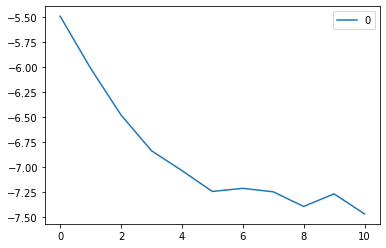

In [ ]:
pd.DataFrame(coherences).plot()

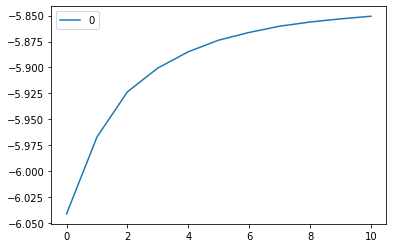

In [ ]:
pd.DataFrame(perplexities).plot()

2가 가장 적당..? -> passes 10

최적 passes   으로 고정 후 토픽 개수 구하기

In [ ]:
import time

dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############

coherencesT=[]
perplexitiesT=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(2, 10):
    nwords = 50
    ntopics = i
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=i, iterations=400, passes=10, random_state=0)
    print('ntopics',ntopics,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherencesT.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexitiesT.append(lda4.log_perplexity(corpus))

ntopics 2 5.491211652755737
Cpherence -2.781611475694747
Perplexity:  -5.999580586991759 


ntopics 3 4.779547929763794
Cpherence -3.843024543559023
Perplexity:  -5.993045933133152 


ntopics 4 4.8016157150268555
Cpherence -3.5997599577847987
Perplexity:  -5.955090026812691 


ntopics 5 3.9854214191436768
Cpherence -4.61545536399833
Perplexity:  -5.931276865656516 


ntopics 6 3.456476926803589
Cpherence -4.7328941206235635
Perplexity:  -5.9238927130283745 


ntopics 7 3.5707836151123047
Cpherence -4.379636469665977
Perplexity:  -5.927649875490278 


ntopics 8 3.3310494422912598
Cpherence -5.1793801469154275
Perplexity:  -5.925043116644012 


ntopics 9 3.3090643882751465
Cpherence -6.110430897332881
Perplexity:  -5.912697506082101 




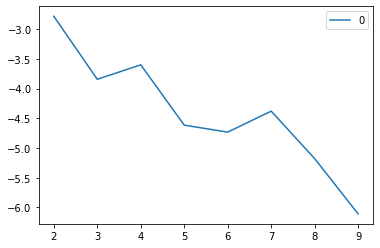

In [ ]:
pd.DataFrame(coherencesT,[2,3,4,5,6,7,8,9]).plot()

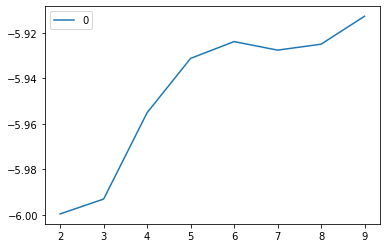

In [ ]:
pd.DataFrame(perplexitiesT,[2,3,4,5,6,7,8,9]).plot()

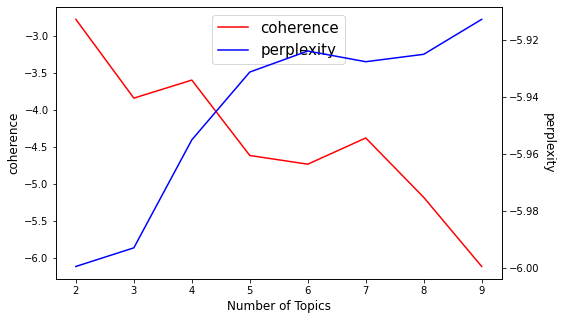

In [ ]:
fig, ax1 = plt.subplots(figsize = (8, 5))
x = [2,3,4,5,6,7,8,9]

ax1.set_xlabel('Number of Topics', fontsize = 12)
ax1.set_ylabel('coherence', rotation = 90, fontsize = 12)
line1 = ax1.plot(x, coherencesT, color = 'red', label = 'coherence')

ax2 =ax1.twinx()
ax2.set_ylabel('perplexity', rotation = -90, labelpad = 15, fontsize = 12)
line2 = ax2.plot(x, perplexitiesT, color = 'blue', label = 'perplexity')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', fontsize = 15)
# plt.title("H01F", fontsize = 20)
plt.show()

passes = 10, topics = 4로 결정!

In [ ]:
dataframe

,patent_abstract_y,H01F,H03K,H04M,H05K,H04B,GoodBad,lemmatization
141,A switch-mode DC-DC power converter includes o...,1,0,0,0,0,1,"[switch, mode, dc, power, converter, input, te..."
219,A power transmission circuit is connected to a...,1,0,0,0,0,0,"[power, transmission, circuit, power, transmis..."
245,A method for producing a sintered R-T-B based ...,1,0,0,0,0,0,"[method, b, magnet, step, b, magnet, work, ear..."
260,"In an embodiment, an electronic component incl...",1,0,0,1,0,1,"[component, part, rectangular, shape, coil, el..."
412,Some aspects pertain to an inductor apparatus ...,1,0,0,0,0,1,"[aspect, inductor, apparatus, metal, layer, pl..."
...,...,...,...,...,...,...,...,...
24093,One object is to provide an electronic compone...,1,0,0,1,0,1,"[provide, component, standoff, solder, compone..."
24117,A reactor includes a core body; a first end pl...,1,0,0,0,0,1,"[reactor, core, body, end, plate, end, plate, ..."
24168,An electrical isolation device including a sup...,1,0,0,0,0,1,"[isolation, device, support, thickness, length..."
24174,An electromagnetic linear actuator is provided...,1,0,0,0,0,1,"[actuator, housing, section, end, piece, coil,..."


In [ ]:
# 최종 모델 돌리기!

import gensim
from gensim import corpora

dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############

## LDA 모델 훈련시키기

NUM_TOPICS = 4 #################
PASSES = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary,  passes=PASSES, random_state=0) #passes는 알고리즘의 동작 횟수
topics = ldamodel.print_topics(num_words=20) #총 8개의 단어만 출력

for topic in topics:
    print(topic)

(0, '0.036*"field" + 0.023*"magnet" + 0.022*"system" + 0.022*"coil" + 0.017*"voltage" + 0.016*"output" + 0.014*"unit" + 0.013*"portion" + 0.011*"capacitor" + 0.011*"input" + 0.011*"plurality" + 0.010*"method" + 0.009*"power" + 0.009*"state" + 0.009*"circuit" + 0.009*"element" + 0.008*"control" + 0.008*"contact" + 0.008*"inductor" + 0.008*"energy"')
(1, '0.050*"core" + 0.042*"coil" + 0.026*"conductor" + 0.024*"circuit" + 0.024*"part" + 0.018*"portion" + 0.017*"surface" + 0.016*"direction" + 0.015*"body" + 0.014*"iron" + 0.010*"transformer" + 0.010*"winding" + 0.010*"board" + 0.009*"layer" + 0.009*"section" + 0.009*"component" + 0.009*"end" + 0.009*"assembly" + 0.008*"powder" + 0.008*"side"')
(2, '0.044*"layer" + 0.030*"magnet" + 0.022*"device" + 0.016*"metal" + 0.015*"element" + 0.015*"magnetization" + 0.014*"housing" + 0.013*"method" + 0.012*"direction" + 0.012*"body" + 0.012*"member" + 0.011*"film" + 0.010*"grain" + 0.010*"position" + 0.010*"plurality" + 0.009*"structure" + 0.009*"mod

In [ ]:
import pyLDAvis.gensim_models   

pyLDAvis.enable_notebook()  
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)  

In [ ]:
pyLDAvis.display(vis)  

In [ ]:
# pyLDAvis html 저장   
pyLDAvis.save_html(vis, '/content/drive/MyDrive/Capstone/LDA/lda_result/H01F_10p_4T.html') ##############

In [ ]:
# 문서 별 토픽 분포 보기

def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,0.0,0.8593,"[(0, 0.8592807), (1, 0.1264033)]"
1,1,3.0,0.9842,"[(3, 0.98423845)]"
2,2,2.0,0.8413,"[(1, 0.14671855), (2, 0.8412764)]"
3,3,1.0,0.6048,"[(1, 0.60480744), (2, 0.15273423), (3, 0.23478..."
4,4,2.0,0.9801,"[(2, 0.98008406)]"
5,5,0.0,0.9697,"[(0, 0.9696505), (3, 0.010562283)]"
6,6,0.0,0.9805,"[(0, 0.9804503)]"
7,7,3.0,0.9693,"[(1, 0.011237264), (3, 0.96926844)]"
8,8,1.0,0.9712,"[(1, 0.97123355)]"
9,9,2.0,0.9743,"[(2, 0.97425514)]"


In [ ]:
topictable

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,0.0,0.8593,"[(0, 0.8592807), (1, 0.1264033)]"
1,1,3.0,0.9842,"[(3, 0.98423845)]"
2,2,2.0,0.8413,"[(1, 0.14671855), (2, 0.8412764)]"
3,3,1.0,0.6048,"[(1, 0.60480744), (2, 0.15273423), (3, 0.23478..."
4,4,2.0,0.9801,"[(2, 0.98008406)]"
...,...,...,...,...
436,436,1.0,0.5774,"[(1, 0.5773561), (3, 0.4095443)]"
437,437,1.0,0.9677,"[(0, 0.010520236), (1, 0.96770304), (2, 0.0106..."
438,438,3.0,0.9673,"[(0, 0.010797549), (1, 0.010972906), (2, 0.010..."
439,439,2.0,0.5761,"[(1, 0.41003242), (2, 0.57608324)]"


In [ ]:
dataframe.reset_index(drop = True, inplace = True)

In [ ]:
final = pd.concat([dataframe,topictable.iloc[:,1:]],axis=1)
final

,patent_abstract_y,H01F,H03K,H04M,H05K,H04B,GoodBad,lemmatization,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,A switch-mode DC-DC power converter includes o...,1,0,0,0,0,1,"[switch, mode, dc, power, converter, input, te...",0.0,0.8593,"[(0, 0.8592807), (1, 0.1264033)]"
1,A power transmission circuit is connected to a...,1,0,0,0,0,0,"[power, transmission, circuit, power, transmis...",3.0,0.9842,"[(3, 0.98423845)]"
2,A method for producing a sintered R-T-B based ...,1,0,0,0,0,0,"[method, b, magnet, step, b, magnet, work, ear...",2.0,0.8413,"[(1, 0.14671855), (2, 0.8412764)]"
3,"In an embodiment, an electronic component incl...",1,0,0,1,0,1,"[component, part, rectangular, shape, coil, el...",1.0,0.6048,"[(1, 0.60480744), (2, 0.15273423), (3, 0.23478..."
4,Some aspects pertain to an inductor apparatus ...,1,0,0,0,0,1,"[aspect, inductor, apparatus, metal, layer, pl...",2.0,0.9801,"[(2, 0.98008406)]"
...,...,...,...,...,...,...,...,...,...,...,...
436,One object is to provide an electronic compone...,1,0,0,1,0,1,"[provide, component, standoff, solder, compone...",1.0,0.5774,"[(1, 0.5773561), (3, 0.4095443)]"
437,A reactor includes a core body; a first end pl...,1,0,0,0,0,1,"[reactor, core, body, end, plate, end, plate, ...",1.0,0.9677,"[(0, 0.010520236), (1, 0.96770304), (2, 0.0106..."
438,An electrical isolation device including a sup...,1,0,0,0,0,1,"[isolation, device, support, thickness, length...",3.0,0.9673,"[(0, 0.010797549), (1, 0.010972906), (2, 0.010..."
439,An electromagnetic linear actuator is provided...,1,0,0,0,0,1,"[actuator, housing, section, end, piece, coil,...",2.0,0.5761,"[(1, 0.41003242), (2, 0.57608324)]"


In [ ]:
final.to_csv('/content/drive/MyDrive/Capstone/data/LDA/LDA_H01F_final.csv')

In [ ]:
final[final['가장 높은 토픽의 비중']<0.7]['가장 비중이 높은 토픽'].value_counts()

3.0    36
1.0    33
0.0    28
2.0    12
Name: 가장 비중이 높은 토픽, dtype: int64

In [ ]:
final[final['가장 비중이 높은 토픽']==3.0].iloc[0,0]

'A power transmission circuit is connected to a power transmission coil having a coil aperture. The power transmission circuit includes a conductive or magnetic power-transmission-coil near member opposed to the coil aperture of the power transmission coil, and a repeating coil arranged on a side opposite to a side on which the power-transmission-coil near member is arranged with respect to the power transmission coil and coupled to the power transmission coil at least via a magnetic field. When a shortest distance between the power transmission coil and the power-transmission-coil near member is expressed as (dt1) and a shortest distance between the power transmission coil and the repeating coil is expressed as (dt2), dt2≤dt1.'

In [ ]:
final[final['가장 비중이 높은 토픽']==3.0].iloc[1,0]

'The invention relates to an inductive power transfer unit, wherein the inductive power transfer unit includes at least one winding structure and at least one flux guiding means, wherein the inductive power transfer unit further includes at least one antenna element, wherein at least one portion of the at least one flux guiding means is a part of the antenna element. The invention further relates to a system for inductive power transfer and a method of communicating.'

In [ ]:
final[final['가장 비중이 높은 토픽']==1.0].iloc[0,0]

'Methods for treating a patient using time varying magnetic field are described. The treatment methods combine various approaches for aesthetic treatment. The methods are focused on enhancing a visual appearance of the patient.'

In [ ]:
final[final['가장 비중이 높은 토픽']==1.0].iloc[1,0]

'Device for transforming and for rectifying polyphase, in particular three-phase, voltage comprising a polyphase transformer comprising a voided central zone, a voltage rectifier circuit that is connected to the transformer and a fan. The voltage rectifier circuit includes at least three heat dissipation units forming a right prism of regular polygonal section comprising a voided central zone, the transformer, the voltage rectifier circuit and the fan being positioned such that at least some of the airflow produced by the fan flows through the voided central zone of the rectifier so as to immerse the transformer.'

In [ ]:
final[final['가장 비중이 높은 토픽']==0.0].iloc[0,0]

'A switch-mode DC-DC power converter includes one or more input terminals and output terminals, and a transformer coupled between the input and output terminals. The transformer includes a plurality of winding sets. Each winding set includes a primary winding and a secondary winding magnetically coupled with one another. The primary winding and the secondary winding include the same number of turns. The primary windings of the plurality of winding sets are connected in series and the secondary windings of the plurality of winding sets are connected in parallel. The power converter also includes at least one spacer positioned to separate an adjacent pair of the plurality of winding sets. A magnetic coupling between the adjacent pair of the plurality of winding sets is less than the magnetic coupling between the primary winding and the secondary winding within each winding set.'

In [ ]:
final[final['가장 비중이 높은 토픽']==0.0].iloc[1,0]

'A wireless power receiver includes one or more tunable capacitors in parallel with an inductor. The wireless power receiver adapted to receive an induced voltage input at the inductor due to a magnetic field generated by a wireless power transmitter. The rectifier has an output with a rectified voltage and a rectified current. A controller has a first input for receiving a signal representative of the rectified voltage and a first output for supplying an adjustment signal to the tunable capacitor. The controller includes a processor coupled to the first input and is configured to operate on the signal representative of rectified voltage to produce a desired capacitance value for capacitor and provide the adjustment signal determined so as to adjust a capacitance value of capacitor to the desired capacitance value.'

In [ ]:
final[final['가장 비중이 높은 토픽']==2.0].iloc[0,0]

'A method for producing a sintered R-T-B based magnet includes the steps of: providing a sintered R1-T-B based magnet work (where R1 is a rare-earth element; T is Fe, or Fe and Co); providing a powder of an alloy in which a rare-earth element R2 accounts for 40 mass % or more of the entire alloy, the rare-earth element R2 always including Dy and/or Tb; subjecting the powder to a heat treatment to obtain a diffusion source; and heating the sintered R1-T-B based magnet work with the diffusion source to allow the at least one of Dy and Tb contained in the diffusion source to diffuse from the surface into the interior of the sintered R1-T-B based magnet work. The alloy powder is a powder produced by atomization.'

In [ ]:
final[final['가장 비중이 높은 토픽']==2.0].iloc[1,0]

'An electronic device may have a housing, a battery, a conductive coil, near-field communications circuitry, amplifier circuitry, and wireless charging circuitry. The housing may have a housing wall. The conductive coil may be adhered to the housing wall. The conductive coil may be coiled around a magnet. The amplifier circuitry may drive audio signals and/or haptic signals onto the conductive coil that cause the conductive coil to vibrate the housing wall. The near-field communications circuitry may convey near-field communications signals through the housing wall using the conductive coil. The wireless charging circuitry may receive wireless power for charging the battery through the housing wall using the conductive coil. If desired, the conductive coil may include a first set of windings that lie within a surface extending along the housing wall and/or a second set of vertically-stacked windings that extend away from the housing wall.'

In [ ]:
browsing_data = final[final['가장 높은 토픽의 비중']<0.7]
no_browsing_data = final[final['가장 높은 토픽의 비중']>=0.7]
browsing_data

,patent_abstract_y,H01F,H03K,H04M,H05K,H04B,GoodBad,lemmatization,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
1,A power transmission circuit is connected to a...,1,0,0,0,0,0,"[power, transmission, circuit, power, transmis...",3.0,0.5960,"[(3, 0.5960291), (4, 0.39031726)]"
2,A method for producing a sintered R-T-B based ...,1,0,0,0,0,0,"[method, b, magnet, step, b, magnet, work, ear...",2.0,0.6242,"[(1, 0.36026052), (2, 0.62416846)]"
6,A system comprising a high voltage (HV) bank s...,1,0,0,0,0,1,"[system, voltage, bank, section, capacitor, ba...",4.0,0.6910,"[(0, 0.098451145), (3, 0.19802183), (4, 0.6909..."
12,A coil unit includes a ferrite plate including...,1,0,0,0,0,1,"[coil, unit, plate, coil, surface, surface, co...",4.0,0.5575,"[(1, 0.41047665), (4, 0.55746794)]"
13,Provided is a group of rare-earth regenerator ...,1,0,0,0,0,1,"[group, earth, regenerator, material, particle...",4.0,0.4335,"[(1, 0.33549115), (4, 0.43350148), (5, 0.21615..."
...,...,...,...,...,...,...,...,...,...,...,...
432,"For changing a property of a polar liquid, a t...",1,0,0,0,0,0,"[property, liquid, transducer, coil, liquid, c...",4.0,0.5274,"[(0, 0.38422292), (1, 0.07259189), (4, 0.52742..."
433,The present disclosure discloses a fixing appa...,1,0,0,0,0,1,"[disclosure, substrate, base, evaporation, pro...",0.0,0.5936,"[(0, 0.5936057), (4, 0.38724834)]"
435,"In a printed article, pigment flakes are magne...",1,0,0,0,0,1,"[article, pigment, flake, form, pattern, plura...",3.0,0.6372,"[(0, 0.11077397), (3, 0.6371582), (4, 0.235733..."
437,A reactor includes a core body; a first end pl...,1,0,0,0,0,1,"[reactor, core, body, end, plate, end, plate, ...",4.0,0.4200,"[(1, 0.32304597), (4, 0.42002583), (5, 0.23606..."


In [ ]:
browsing_data['GoodBad'].value_counts()

1    122
0     50
Name: GoodBad, dtype: int64

레이블에 속하는 GoodBad이 데이터 중 browsing data에 속하는 데이터의 비율

In [ ]:
browsing_data['GoodBad'].value_counts()[1]/dataframe[dataframe['GoodBad']==1].shape[0]

0.4053156146179402

In [ ]:
browsing_data['GoodBad'].value_counts()[0]/dataframe[dataframe['GoodBad']==0].shape[0]

0.35714285714285715

In [ ]:
browsing_data[browsing_data['가장 비중이 높은 토픽']==3.0].iloc[0,0]

'A power transmission circuit is connected to a power transmission coil having a coil aperture. The power transmission circuit includes a conductive or magnetic power-transmission-coil near member opposed to the coil aperture of the power transmission coil, and a repeating coil arranged on a side opposite to a side on which the power-transmission-coil near member is arranged with respect to the power transmission coil and coupled to the power transmission coil at least via a magnetic field. When a shortest distance between the power transmission coil and the power-transmission-coil near member is expressed as (dt1) and a shortest distance between the power transmission coil and the repeating coil is expressed as (dt2), dt2≤dt1.'

In [ ]:
browsing_data[browsing_data['가장 비중이 높은 토픽']==3.0].iloc[1,0]

'A magnetic holding system for securely affixing an object to a wall surface including a first magnetic sheet layer having specific polarity line spacing, a second layer having magnetic receptive properties, and finally an object with a mounting surface designed to abut the second layer, the mounting surface including a magnetic material having specific polarity line spacing that is substantially the same as the specific polarity line spacing of the first layer and a sheet of steel, such that, when the object polarity line spacing is aligned with the first layer polarity line spacing, the object is securely held to the wall.'

In [ ]:
browsing_data[browsing_data['가장 비중이 높은 토픽']==3.0].iloc[2,0]

'The invention pertains to advances in constructing predetermined magnets from appropriate magnetic material that allows for focusing the magnetic field in a target region.'

In [ ]:
no_browsing_data[no_browsing_data['가장 비중이 높은 토픽']==3.0].iloc[0,0]

'The invention relates to an inductive power transfer unit, wherein the inductive power transfer unit includes at least one winding structure and at least one flux guiding means, wherein the inductive power transfer unit further includes at least one antenna element, wherein at least one portion of the at least one flux guiding means is a part of the antenna element. The invention further relates to a system for inductive power transfer and a method of communicating.'

In [ ]:
no_browsing_data[no_browsing_data['가장 비중이 높은 토픽']==3.0].iloc[1,0]

'The present invention provides an oxide superconducting bulk magnet which can obtain a sufficient amount of total magnetic flux, by preventing the superconducting bulk body from being broken due to electromagnetic stress and quenching phenomenon to enable magnetization by a strong magnetic field.An oxide superconducting bulk magnet comprisingan oxide superconducting bulk body wherein RE2BaCuO5 is dispersed in a monocrystalline RE1Ba2Cu3Oy; andan outer peripheral reinforcing ring fitted to the outer periphery of the oxide superconducting bulk body,wherein the outer peripheral reinforcing ring is made of a plurality of metal rings having a multiple ring structure in the radial direction,at least one of the plurality of metal rings has a thermal conductivity of 20 W/(m·K) or more at a temperature of 20 to 70 K and at least one of the plurality of metal rings has a higher strength than the metal ring having a thermal conductivity of 20 W/(m·K) or more.'

In [ ]:
no_browsing_data[no_browsing_data['가장 비중이 높은 토픽']==3.0].iloc[2,0]

'An inductive power transfer assembly comprising a magnetic core having a base portion, a first limb, and a second limb, wherein the first limb and the second limb extend, in a direction, from a surface of the base portion a first power transfer coil and a second power transfer coil, wherein the first power transfer coil is wound about the first limb, and wherein the second power transfer coil is wound about the second limb; and inverter circuitry connected to the first power transfer coil and the second power transfer coil, wherein the inverter circuitry, during operation, causes the first power transfer coil and the second power transfer coil to generate flux having opposing polarity.'

# H03K

In [ ]:
dataframe = df[df['H03K']==1]
dataframe

In [ ]:
import time
dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############

파라미터 튜닝

In [ ]:
# epoch 반복에 따른 coherence변화

# import time

coherences=[]
perplexities=[]
passes=[]

# dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
# corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############


for i in tqdm(range(11)):

    ntopics, nwords = 10, 50
    if i==0:
        p=1
    else:
        p=i*5
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=p, random_state=0)
    print('epoch',p,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherences.append(coherence)

    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexities.append(lda4.log_perplexity(corpus))

  0%|          | 0/11 [00:00<?, ?it/s]WARNING:gensim.models.ldamodel:too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


epoch 1 1.2968857288360596
Cpherence -3.219651665512836
Perplexity:  -5.755264189920977 




  9%|▉         | 1/11 [00:01<00:19,  1.94s/it]WARNING:gensim.models.ldamodel:too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


epoch 5 3.547947645187378
Cpherence -3.4346889107642795
Perplexity:  -5.666866666075935 




 18%|█▊        | 2/11 [00:06<00:29,  3.30s/it]

epoch 10 5.8618810176849365
Cpherence -4.388122058251758
Perplexity:  -5.6204152662293865 




 27%|██▋       | 3/11 [00:12<00:37,  4.71s/it]

epoch 15 7.75484037399292
Cpherence -4.653888038968302
Perplexity:  -5.596721023642343 




 36%|███▋      | 4/11 [00:20<00:42,  6.12s/it]

epoch 20 9.664167881011963
Cpherence -4.64448191568099
Perplexity:  -5.580779460117274 




 45%|████▌     | 5/11 [00:31<00:45,  7.59s/it]

epoch 25 11.698952436447144
Cpherence -4.990964035620509
Perplexity:  -5.56867812156098 




 55%|█████▍    | 6/11 [00:43<00:45,  9.15s/it]

epoch 30 13.90727686882019
Cpherence -4.939923376380113
Perplexity:  -5.560326120052026 




 64%|██████▎   | 7/11 [00:57<00:43, 10.91s/it]

epoch 35 15.61113715171814
Cpherence -5.0690682343963385
Perplexity:  -5.553154516778228 




 73%|███████▎  | 8/11 [01:13<00:37, 12.56s/it]

epoch 40 17.324703216552734
Cpherence -5.0550161675048155
Perplexity:  -5.547888458965103 




 82%|████████▏ | 9/11 [01:31<00:28, 14.21s/it]

epoch 45 19.59555959701538
Cpherence -5.138653882075722
Perplexity:  -5.543356832301132 




 91%|█████████ | 10/11 [01:51<00:16, 16.01s/it]

epoch 50 21.10578203201294
Cpherence -5.32957395787703
Perplexity:  -5.5398375757301865 




100%|██████████| 11/11 [02:13<00:00, 12.12s/it]


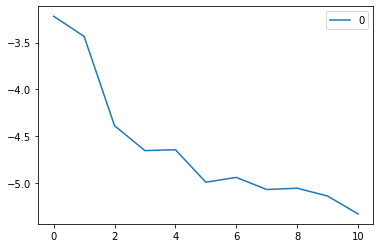

In [ ]:
pd.DataFrame(coherences).plot()

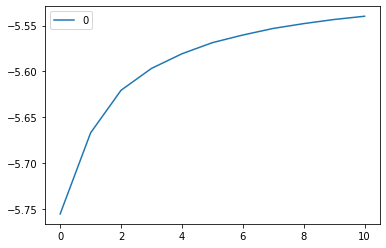

In [ ]:
pd.DataFrame(perplexities).plot()

4이 가장 적당..? -> passes 20

최적 passes   으로 고정 후 토픽 개수 구하기

In [ ]:
coherencesT=[]
perplexitiesT=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(2, 10):
    nwords = 50
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=i, iterations=400, passes=20, random_state=0)
    ntopics = str(i)
    print('ntopics',ntopics,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherencesT.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexitiesT.append(lda4.log_perplexity(corpus))

ntopics 2 13.253059387207031
Cpherence -2.1892258497164825
Perplexity:  -5.70228691921033 


ntopics 3 12.060604810714722
Cpherence -2.4973509847315314
Perplexity:  -5.6645837189372985 


ntopics 4 11.063406944274902
Cpherence -2.5267772204791457
Perplexity:  -5.6578059923575115 


ntopics 5 9.968912839889526
Cpherence -3.1610916322811295
Perplexity:  -5.605177981145812 


ntopics 6 10.289214849472046
Cpherence -3.4969204826186213
Perplexity:  -5.601883282264951 


ntopics 7 11.136347770690918
Cpherence -3.7596714783796257
Perplexity:  -5.602889413110148 


ntopics 8 10.036514282226562
Cpherence -4.480430429847596
Perplexity:  -5.585297929906276 


ntopics 9 9.726200580596924
Cpherence -4.623166873413944
Perplexity:  -5.583922474718136 




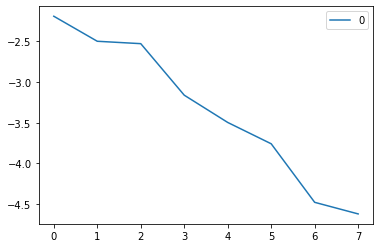

In [ ]:
pd.DataFrame(coherencesT).plot()

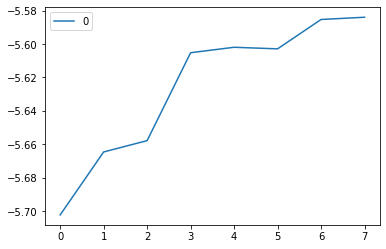

In [ ]:
pd.DataFrame(perplexitiesT).plot()

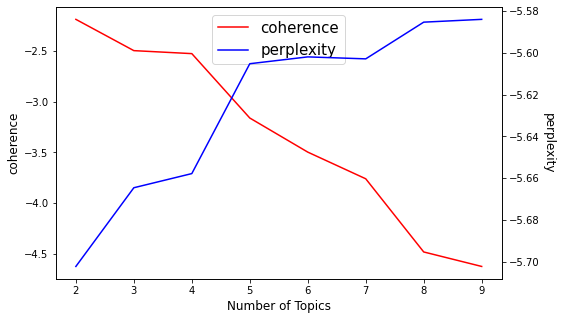

In [ ]:
fig, ax1 = plt.subplots(figsize = (8, 5))
x = [2,3,4,5,6,7,8,9]

ax1.set_xlabel('Number of Topics', fontsize = 12)
ax1.set_ylabel('coherence', rotation = 90, fontsize = 12)
line1 = ax1.plot(x, coherencesT, color = 'red', label = 'coherence')

ax2 =ax1.twinx()
ax2.set_ylabel('perplexity', rotation = -90, labelpad = 15, fontsize = 12)
line2 = ax2.plot(x, perplexitiesT, color = 'blue', label = 'perplexity')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', fontsize = 15)
# plt.title("H01F", fontsize = 20)
plt.show()

passes = 20, topics = 4로 결정!

In [ ]:
dataframe

,patent_abstract_y,H01F,H03K,H04M,H05K,H04B,GoodBad,lemmatization
13,A method for in-phase (I) and quadrature (Q) s...,0,1,0,0,0,1,"[method, phase, quadrature, signal, generation..."
33,"Systems, methods, and apparatus for complement...",0,1,0,0,0,1,"[system, method, self, logic, embodiment, erro..."
45,System and method for controlling one or more ...,0,1,0,0,0,1,"[system, light, diode, example, system, light,..."
47,"A switching converter having a voltage input, ...",0,1,0,0,0,1,"[converter, voltage, input, voltage, output, t..."
85,The invention relates to a power switching dev...,0,1,0,0,0,1,"[invention, power, device, transistor, gan, mo..."
...,...,...,...,...,...,...,...,...
24041,A steering wheel assembly includes a steering ...,0,1,0,0,0,1,"[wheel, housing, wheel, pressure, component, h..."
24067,A circuit for asynchronous data transfer inclu...,0,1,0,0,0,1,"[circuit, data, transfer, device, slave, clock..."
24122,A method and a sense amplifier flip-flop (SAFF...,0,1,0,0,0,0,"[method, sense, amplifier, flip, saff, time, v..."
24181,Disclosed herein is an air conditioner includi...,0,1,0,0,0,1,"[herein, air, plurality, capacitor, series, de..."


In [ ]:
# 최종 모델 돌리기!

import gensim
from gensim import corpora

dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############

## LDA 모델 훈련시키기

NUM_TOPICS = 4 #################
PASSES = 20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary,  passes=PASSES, random_state=0) #passes는 알고리즘의 동작 횟수
topics = ldamodel.print_topics(num_words=20) #총 8개의 단어만 출력

for topic in topics:
    print(topic)

(0, '0.079*"voltage" + 0.030*"transistor" + 0.024*"cell" + 0.019*"source" + 0.018*"supply" + 0.016*"line" + 0.016*"device" + 0.016*"method" + 0.015*"data" + 0.013*"portion" + 0.013*"terminal" + 0.012*"circuit" + 0.012*"power" + 0.012*"plurality" + 0.011*"phase" + 0.010*"type" + 0.010*"system" + 0.010*"control" + 0.010*"circuitry" + 0.010*"mode"')
(1, '0.107*"circuit" + 0.033*"device" + 0.027*"data" + 0.025*"control" + 0.025*"power" + 0.022*"voltage" + 0.019*"semiconductor" + 0.016*"output" + 0.013*"element" + 0.013*"memory" + 0.011*"block" + 0.011*"region" + 0.010*"line" + 0.010*"plurality" + 0.010*"supply" + 0.008*"system" + 0.008*"section" + 0.007*"capacitor" + 0.007*"layer" + 0.007*"logic"')
(2, '0.036*"control" + 0.035*"unit" + 0.033*"switch" + 0.030*"power" + 0.025*"device" + 0.022*"circuit" + 0.022*"value" + 0.020*"voltage" + 0.020*"state" + 0.018*"sensor" + 0.013*"element" + 0.012*"layer" + 0.012*"supply" + 0.011*"output" + 0.010*"signal" + 0.009*"frequency" + 0.008*"load" + 0.0

In [ ]:
import pyLDAvis.gensim_models   

pyLDAvis.enable_notebook()  
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)  
pyLDAvis.display(vis)  

In [ ]:
# pyLDAvis html 저장   
pyLDAvis.save_html(vis, '/content/drive/MyDrive/Capstone/LDA/lda_result/H03K_20p_4T.html') ##############

In [ ]:
# 문서 별 토픽 분포 보기

def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,3.0,0.9759,"[(3, 0.975861)]"
1,1,3.0,0.5256,"[(0, 0.45949832), (3, 0.525589)]"
2,2,0.0,0.9699,"[(0, 0.9699384), (2, 0.01073764)]"
3,3,3.0,0.7560,"[(0, 0.23043606), (3, 0.75601333)]"
4,4,0.0,0.4902,"[(0, 0.4902006), (1, 0.07871051), (2, 0.416802..."
5,5,0.0,0.5364,"[(0, 0.5364193), (1, 0.011300329), (2, 0.24723..."
6,6,0.0,0.9810,"[(0, 0.9810204)]"
7,7,2.0,0.6361,"[(2, 0.6360788), (3, 0.3487189)]"
8,8,3.0,0.5626,"[(0, 0.42477018), (3, 0.5625771)]"
9,9,2.0,0.9818,"[(2, 0.98177487)]"


In [ ]:
topictable

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,3.0,0.9759,"[(3, 0.975861)]"
1,1,3.0,0.5256,"[(0, 0.45949832), (3, 0.525589)]"
2,2,0.0,0.9699,"[(0, 0.9699384), (2, 0.01073764)]"
3,3,3.0,0.7560,"[(0, 0.23043606), (3, 0.75601333)]"
4,4,0.0,0.4902,"[(0, 0.4902006), (1, 0.07871051), (2, 0.416802..."
...,...,...,...,...
591,591,2.0,0.9795,"[(2, 0.9794935)]"
592,592,1.0,0.7207,"[(1, 0.72073585), (3, 0.271155)]"
593,593,0.0,0.6255,"[(0, 0.6255087), (1, 0.1406698), (3, 0.22906296)]"
594,594,1.0,0.9655,"[(0, 0.011429112), (1, 0.9655167), (2, 0.01125..."


In [ ]:
dataframe.reset_index(drop = True, inplace = True)

In [ ]:
final = pd.concat([dataframe,topictable.iloc[:,1:]],axis=1)
final

,patent_abstract_y,H01F,H03K,H04M,H05K,H04B,GoodBad,lemmatization,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,A method for in-phase (I) and quadrature (Q) s...,0,1,0,0,0,1,"[method, phase, quadrature, signal, generation...",3.0,0.9759,"[(3, 0.975861)]"
1,"Systems, methods, and apparatus for complement...",0,1,0,0,0,1,"[system, method, self, logic, embodiment, erro...",3.0,0.5256,"[(0, 0.45949832), (3, 0.525589)]"
2,System and method for controlling one or more ...,0,1,0,0,0,1,"[system, light, diode, example, system, light,...",0.0,0.9699,"[(0, 0.9699384), (2, 0.01073764)]"
3,"A switching converter having a voltage input, ...",0,1,0,0,0,1,"[converter, voltage, input, voltage, output, t...",3.0,0.7560,"[(0, 0.23043606), (3, 0.75601333)]"
4,The invention relates to a power switching dev...,0,1,0,0,0,1,"[invention, power, device, transistor, gan, mo...",0.0,0.4902,"[(0, 0.4902006), (1, 0.07871051), (2, 0.416802..."
...,...,...,...,...,...,...,...,...,...,...,...
591,A steering wheel assembly includes a steering ...,0,1,0,0,0,1,"[wheel, housing, wheel, pressure, component, h...",2.0,0.9795,"[(2, 0.9794935)]"
592,A circuit for asynchronous data transfer inclu...,0,1,0,0,0,1,"[circuit, data, transfer, device, slave, clock...",1.0,0.7207,"[(1, 0.72073585), (3, 0.271155)]"
593,A method and a sense amplifier flip-flop (SAFF...,0,1,0,0,0,0,"[method, sense, amplifier, flip, saff, time, v...",0.0,0.6255,"[(0, 0.6255087), (1, 0.1406698), (3, 0.22906296)]"
594,Disclosed herein is an air conditioner includi...,0,1,0,0,0,1,"[herein, air, plurality, capacitor, series, de...",1.0,0.9655,"[(0, 0.011429112), (1, 0.9655167), (2, 0.01125..."


In [ ]:
final.to_csv('/content/drive/MyDrive/Capstone/data/LDA/LDA_H03K_final.csv')

In [ ]:
t = pd.read_csv('/content/drive/MyDrive/Project/Capstone/data/LDA/LDA_H03K_final.csv')

In [ ]:
t.groupby('가장 비중이 높은 토픽').mean()

,Unnamed: 0,H01F,H03K,H04M,H05K,H04B,GoodBad,가장 높은 토픽의 비중
가장 비중이 높은 토픽,,,,,,,,
0.0,319.272727,0.010101,1.0,0.010101,0.010101,0.030303,0.929293,0.793439
1.0,308.104895,0.000000,1.0,0.006993,0.048951,0.027972,0.888112,0.788569
2.0,288.721212,0.030303,1.0,0.018182,0.024242,0.036364,0.903030,0.793318
3.0,285.735450,0.010582,1.0,0.000000,0.005291,0.047619,0.714286,0.800449


In [ ]:
final[final['가장 높은 토픽의 비중']<0.7]['가장 비중이 높은 토픽'].value_counts()

4.0    65
3.0    57
6.0    55
2.0    34
5.0    33
0.0    32
1.0    30
Name: 가장 비중이 높은 토픽, dtype: int64

In [ ]:
browsing_data = final[final['가장 높은 토픽의 비중']<0.7]
no_browsing_data = final[final['가장 높은 토픽의 비중']>=0.7]
browsing_data

,patent_abstract_y,H01F,H03K,H04M,H05K,H04B,GoodBad,lemmatization,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,A method for in-phase (I) and quadrature (Q) s...,0,1,0,0,0,1,"[method, phase, quadrature, signal, generation...",3.0,0.5883,"[(3, 0.5883264), (5, 0.38932914)]"
1,"Systems, methods, and apparatus for complement...",0,1,0,0,0,1,"[system, method, self, logic, embodiment, erro...",0.0,0.6516,"[(0, 0.65160763), (3, 0.3279116)]"
3,"A switching converter having a voltage input, ...",0,1,0,0,0,1,"[converter, voltage, input, voltage, output, t...",6.0,0.5389,"[(3, 0.14484589), (4, 0.30159983), (6, 0.53888..."
4,The invention relates to a power switching dev...,0,1,0,0,0,1,"[invention, power, device, transistor, gan, mo...",0.0,0.4250,"[(0, 0.42495558), (4, 0.37937093), (6, 0.16550..."
5,An RF switch includes serially coupled RF cell...,0,1,0,0,0,1,"[switch, cell, switch, node, wherein, cell, tr...",0.0,0.5537,"[(0, 0.5536607), (2, 0.22205338), (4, 0.199391..."
...,...,...,...,...,...,...,...,...,...,...,...
584,A signal generation circuit includes a synchro...,0,1,0,0,0,1,"[generation, circuit, synchronization, circuit...",4.0,0.5501,"[(3, 0.42889085), (4, 0.55006945)]"
589,An apparatus is described having a latch circu...,0,1,0,0,0,0,"[apparatus, circuit, latch, circuit, data, inp...",3.0,0.5701,"[(0, 0.011946779), (1, 0.37022558), (2, 0.0119..."
590,A power system includes at least one power uni...,0,1,0,0,0,1,"[power, system, power, unit, power, unit, powe...",6.0,0.5432,"[(2, 0.09777823), (4, 0.10685655), (5, 0.24053..."
593,A method and a sense amplifier flip-flop (SAFF...,0,1,0,0,0,0,"[method, sense, amplifier, flip, saff, time, v...",0.0,0.6759,"[(0, 0.67592496), (1, 0.05562866), (3, 0.25783..."


In [ ]:
final['가장 비중이 높은 토픽'].value_counts()

4.0    120
3.0    108
6.0     96
1.0     73
2.0     71
5.0     65
0.0     63
Name: 가장 비중이 높은 토픽, dtype: int64

In [ ]:
final[final['GoodBad']==0]['가장 비중이 높은 토픽'].value_counts()[5.0]/dataframe[dataframe['GoodBad']==0].shape[0]

0.03225806451612903

In [ ]:
final[final['GoodBad']==1]['가장 비중이 높은 토픽'].value_counts()[5.0]/dataframe[dataframe['GoodBad']==1].shape[0]

0.12326043737574553

In [ ]:
final[final['GoodBad']==0]['가장 비중이 높은 토픽'].value_counts()[0.0]/dataframe[dataframe['GoodBad']==0].shape[0]

0.07526881720430108

In [ ]:
final[final['GoodBad']==1]['가장 비중이 높은 토픽'].value_counts()[0.0]/dataframe[dataframe['GoodBad']==1].shape[0]

0.11133200795228629

In [ ]:
final[final['GoodBad']==0]['가장 비중이 높은 토픽'].value_counts()[6.0]/dataframe[dataframe['GoodBad']==0].shape[0]

0.08602150537634409

In [ ]:
final[final['GoodBad']==1]['가장 비중이 높은 토픽'].value_counts()[6.0]/dataframe[dataframe['GoodBad']==1].shape[0]

0.1749502982107356

In [ ]:
final[final['GoodBad']==0]['가장 비중이 높은 토픽'].value_counts()[2.0]/dataframe[dataframe['GoodBad']==0].shape[0]

0.10752688172043011

In [ ]:
final[final['GoodBad']==1]['가장 비중이 높은 토픽'].value_counts()[2.0]/dataframe[dataframe['GoodBad']==1].shape[0]

0.12127236580516898

In [ ]:
final[final['GoodBad']==0]['가장 비중이 높은 토픽'].value_counts()[1.0]/dataframe[dataframe['GoodBad']==0].shape[0]

0.15053763440860216

In [ ]:
final[final['GoodBad']==1]['가장 비중이 높은 토픽'].value_counts()[2.0]/dataframe[dataframe['GoodBad']==1].shape[0]

0.12127236580516898

In [ ]:
final[final['GoodBad']==0]['가장 비중이 높은 토픽'].value_counts()[3.0]/dataframe[dataframe['GoodBad']==0].shape[0]

0.25806451612903225

In [ ]:
final[final['GoodBad']==1]['가장 비중이 높은 토픽'].value_counts()[3.0]/dataframe[dataframe['GoodBad']==1].shape[0]

0.16699801192842942

In [ ]:
final[final['GoodBad']==0]['가장 비중이 높은 토픽'].value_counts()[4.0]/dataframe[dataframe['GoodBad']==0].shape[0]

0.2903225806451613

In [ ]:
final[final['GoodBad']==1]['가장 비중이 높은 토픽'].value_counts()[4.0]/dataframe[dataframe['GoodBad']==1].shape[0]

0.1848906560636183

In [ ]:
browsing_data['GoodBad'].value_counts()

레이블에 속하는 GoodBad이 데이터 중 browsing data에 속하는 데이터의 비율

In [ ]:
browsing_data['GoodBad'].value_counts()[0]/dataframe[dataframe['GoodBad']==0].shape[0]

0.5483870967741935

In [ ]:
browsing_data[browsing_data['가장 비중이 높은 토픽']==4.0].iloc[0,0]

'The present disclosure provides implementations of a level shifter (LS), an integrated circuit, and a method. A LS may run in a first mode and a second mode, alternating with each other. The LS may include: an input unit that is configured to: transmit a first signal to a latch unit in the first mode, and be turned off in the second mode; a power supply switch unit that is configured to: transmit a first power supply voltage to the latch unit in the first mode, and transmit a second power supply voltage to the latch unit in the second mode, where the first power supply voltage is lower than the second power supply voltage; the latch unit that is configured to: latch the first signal in the first mode, change a level amplitude of the first signal from the first power supply voltage to the second power supply voltage in the second mode, and output a second signal whose logic is opposite to that of the first signal to an output unit; and the output unit that is configured to: isolate the

In [ ]:
browsing_data[browsing_data['가장 비중이 높은 토픽']==4.0].iloc[1,0]

'In a PIN diode drive circuit, a forward voltage is applied to a PIN diode through a first switching element and a reverse voltage is applied to the PIN diode through a second switching element. A limiting unit limits an increase rate of an absolute value of a reverse recovery current to a value smaller than a threshold value, the reverse recovery current flowing through the PIN diode when a voltage applied to the PIN diode changes from a forward voltage to a reverse voltage. The threshold value is less than 1 time and 0.5 times or more of a maximum value of the increase rate when a second peak appears regarding the reverse recovery current.'

In [ ]:
no_browsing_data[no_browsing_data['가장 비중이 높은 토픽']==4.0].iloc[0,0]

'A sensor assembly is provided for a fingerboard latch assembly that comprises: a latch bracket; bolts for mounting the latch bracket to a fingerboard; a latch; and a bracket pin rotatably supporting the latch on the latch bracket to allow rotation of the latch between an open position and a closed position. The sensor assembly has a mounting arrangement that mounts to the bolts, holding a closed-position proximity sensor probe facing downwardly for sensing proximity of a crank portion of the latch and/or the piston head in the closed position, and also holding an open-position proximity sensor probe facing forwardly for sensing proximity of an arm of the latch in the open position.'

In [ ]:
no_browsing_data[no_browsing_data['가장 비중이 높은 토픽']==4.0].iloc[1,0]

'In various examples there is a capacitance measurement circuit for measuring capacitance of an electrode. The circuit comprises a charging/discharging circuit part which charges the electrode or discharges the electrode, and a counter which measures a charging measurement being a time taken by the charging/discharging circuit part to charge the electrode between two charging thresholds, and which measures a discharging measurement being a time taken by the charging/discharging circuit part to discharge the electrode between two discharging thresholds. The circuit has a controller configured to control the charging/discharging circuit part and the counter such that a plurality of discharging measurements are obtained and a plurality of charging measurements are obtained. The circuit has an averaging logic which computes the measured capacitance in relation to an average of the measurements. In this way high frequency and low frequency noise is attenuated and fine resolution, high accur

# H04M

In [ ]:
dataframe = df[df['H04M']==1]
dataframe

,patent_abstract_y,H01F,H03K,H04M,H05K,H04B,GoodBad,lemmatization
88,"This disclosure relates to methods, systems, a...",0,0,1,0,0,1,"[disclosure, method, system, medium, performan..."
91,Apparatus and methods for guaranteeing a quali...,0,0,1,0,0,1,"[apparatus, method, quality, experience, qoe, ..."
117,A method for initialization of a group of cust...,0,0,1,0,1,1,"[initialization, group, customer, equipment, d..."
138,An approach is provided for providing mechanis...,0,0,1,0,0,1,"[approach, mechanism, control, notification, a..."
179,Embodiments described herein includes a system...,0,0,1,0,0,1,"[embodiment, system, processor, display, devic..."
...,...,...,...,...,...,...,...,...
24091,A method of managing a media file storage relo...,0,0,1,0,0,1,"[method, medium, storage, relocation, process,..."
24092,A method for configuring a mobile communicatio...,0,0,1,0,0,1,"[method, communication, device, perform, trans..."
24101,A bone conduction headset includes a support m...,0,0,1,0,1,1,"[bone, conduction, headset, member, shape, pai..."
24195,A method of initiating a voice call via a dial...,0,0,1,0,0,1,"[method, voice, call, dialler, user, interface..."


In [ ]:
import time
dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############

파라미터 튜닝

In [ ]:
# epoch 반복에 따른 coherence변화

import time

coherences=[]
perplexities=[]
passes=[]

dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############


for i in range(11):

    ntopics, nwords = 10, 50
    if i==0:
        p=1
    else:
        p=i*5
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=p, random_state=0)
    print('epoch',p,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherences.append(coherence)

    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexities.append(lda4.log_perplexity(corpus))

epoch 1 1.8925018310546875
Cpherence -4.0780054586848244
Perplexity:  -6.116187700979126 




epoch 5 4.015983581542969
Cpherence -4.564890717380498
Perplexity:  -6.018639959194 


epoch 10 6.1947922706604
Cpherence -4.304486123538489
Perplexity:  -5.9650177813716 


epoch 15 8.225456476211548
Cpherence -4.157430510205385
Perplexity:  -5.939780745323143 


epoch 20 10.2594633102417
Cpherence -4.135484451463132
Perplexity:  -5.925255998639653 


epoch 25 12.532814741134644
Cpherence -3.8887767212392816
Perplexity:  -5.9159247780077076 


epoch 30 14.891563892364502
Cpherence -4.041756229358181
Perplexity:  -5.909318130241877 


epoch 35 16.58799958229065
Cpherence -3.9699314962230767
Perplexity:  -5.904687032422615 


epoch 40 18.87545371055603
Cpherence -3.9580944514667302
Perplexity:  -5.901382391564276 


epoch 45 20.917855739593506
Cpherence -3.9571647772320633
Perplexity:  -5.899121249208222 


epoch 50 23.10726809501648
Cpherence -3.8480552535405055
Perplexity:  -5.897430389529692 




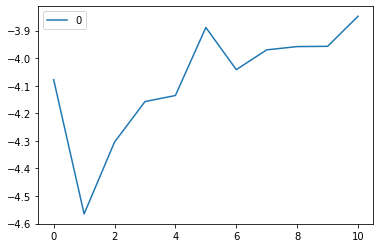

In [ ]:
pd.DataFrame(coherences).plot()

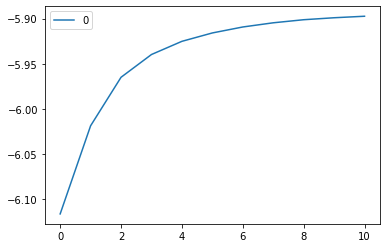

In [ ]:
pd.DataFrame(perplexities).plot()

5이 가장 적당..? -> passes 25

최적 passes   으로 고정 후 토픽 개수 구하기

In [ ]:
coherencesT=[]
perplexitiesT=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(2, 10):
    nwords = 50
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=i, iterations=400, passes=25, random_state=0)
    print('ntopics',ntopics,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherencesT.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexitiesT.append(lda4.log_perplexity(corpus))

ntopics 10 15.383878469467163
Cpherence -2.6783676974797914
Perplexity:  -5.984201765690759 


ntopics 10 15.445789098739624
Cpherence -2.318013515290257
Perplexity:  -5.9288432160352516 


ntopics 10 13.820605754852295
Cpherence -2.906454161499365
Perplexity:  -5.934441024234962 


ntopics 10 13.427541017532349
Cpherence -3.4020649513458734
Perplexity:  -5.9511368601952 


ntopics 10 12.863692998886108
Cpherence -4.33736692539021
Perplexity:  -5.962732057589992 


ntopics 10 12.573720455169678
Cpherence -4.451098412710697
Perplexity:  -5.946452510980568 


ntopics 10 12.977605819702148
Cpherence -4.341165957808744
Perplexity:  -5.934759653998063 


ntopics 10 12.86984920501709
Cpherence -4.68526043502479
Perplexity:  -5.919413510625057 




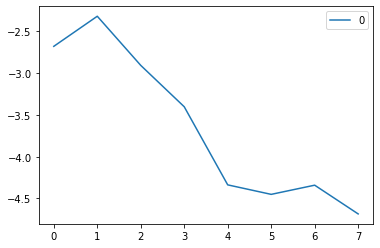

In [ ]:
pd.DataFrame(coherencesT).plot()

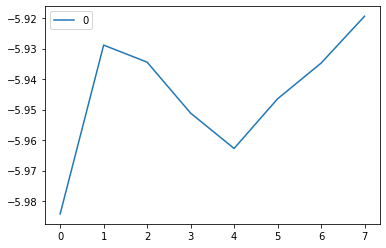

In [ ]:
pd.DataFrame(perplexitiesT).plot()

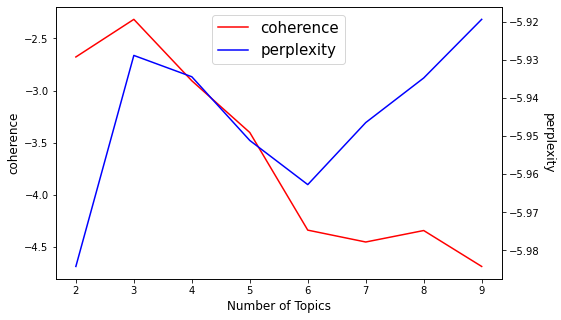

In [ ]:
fig, ax1 = plt.subplots(figsize = (8, 5))
x = [2,3,4,5,6,7,8,9]

ax1.set_xlabel('Number of Topics', fontsize = 12)
ax1.set_ylabel('coherence', rotation = 90, fontsize = 12)
line1 = ax1.plot(x, coherencesT, color = 'red', label = 'coherence')

ax2 =ax1.twinx()
ax2.set_ylabel('perplexity', rotation = -90, labelpad = 15, fontsize = 12)
line2 = ax2.plot(x, perplexitiesT, color = 'blue', label = 'perplexity')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', fontsize = 15)
# plt.title("H01F", fontsize = 20)
plt.show()

passes = 25, topics = 5로 결정

In [ ]:
dataframe

,patent_abstract_y,H01F,H03K,H04M,H05K,H04B,GoodBad,lemmatization
88,"This disclosure relates to methods, systems, a...",0,0,1,0,0,1,"[disclosure, method, system, medium, performan..."
91,Apparatus and methods for guaranteeing a quali...,0,0,1,0,0,1,"[apparatus, method, quality, experience, qoe, ..."
117,A method for initialization of a group of cust...,0,0,1,0,1,1,"[initialization, group, customer, equipment, d..."
138,An approach is provided for providing mechanis...,0,0,1,0,0,1,"[approach, mechanism, control, notification, a..."
179,Embodiments described herein includes a system...,0,0,1,0,0,1,"[embodiment, system, processor, display, devic..."
...,...,...,...,...,...,...,...,...
24091,A method of managing a media file storage relo...,0,0,1,0,0,1,"[method, medium, storage, relocation, process,..."
24092,A method for configuring a mobile communicatio...,0,0,1,0,0,1,"[method, communication, device, perform, trans..."
24101,A bone conduction headset includes a support m...,0,0,1,0,1,1,"[bone, conduction, headset, member, shape, pai..."
24195,A method of initiating a voice call via a dial...,0,0,1,0,0,1,"[method, voice, call, dialler, user, interface..."


In [ ]:
# 최종 모델 돌리기!

import gensim
from gensim import corpora

dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############

## LDA 모델 훈련시키기

NUM_TOPICS = 5 #################
PASSES = 25
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary,  passes=PASSES, random_state=0) #passes는 알고리즘의 동작 횟수
topics = ldamodel.print_topics(num_words=20) #총 8개의 단어만 출력

for topic in topics:
    print(topic)

(0, '0.070*"call" + 0.050*"service" + 0.030*"data" + 0.025*"method" + 0.023*"network" + 0.021*"customer" + 0.017*"system" + 0.014*"time" + 0.014*"session" + 0.014*"user" + 0.013*"record" + 0.012*"party" + 0.012*"equipment" + 0.011*"provider" + 0.009*"event" + 0.009*"target" + 0.009*"medium" + 0.009*"agent" + 0.008*"telephone" + 0.008*"request"')
(1, '0.029*"system" + 0.021*"information" + 0.020*"layer" + 0.020*"notification" + 0.017*"element" + 0.016*"center" + 0.016*"unit" + 0.015*"contact" + 0.015*"value" + 0.015*"customer" + 0.014*"method" + 0.014*"connection" + 0.013*"display" + 0.013*"request" + 0.012*"interaction" + 0.012*"device" + 0.012*"agent" + 0.011*"control" + 0.011*"server" + 0.010*"plurality"')
(2, '0.124*"device" + 0.031*"system" + 0.031*"communication" + 0.023*"user" + 0.023*"information" + 0.019*"message" + 0.018*"method" + 0.018*"network" + 0.017*"data" + 0.016*"interface" + 0.016*"application" + 0.013*"location" + 0.012*"image" + 0.010*"wireless" + 0.010*"input" + 0.

In [ ]:
import pyLDAvis.gensim_models   

pyLDAvis.enable_notebook()  
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)  
pyLDAvis.display(vis)  

In [ ]:
# pyLDAvis html 저장   
pyLDAvis.save_html(vis, '/content/drive/MyDrive/Capstone/LDA/lda_result/H04M_25p_5T.html') ##############

In [ ]:
# 문서 별 토픽 분포 보기

def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,0.0,0.9788,"[(0, 0.97876155)]"
1,1,0.0,0.9872,"[(0, 0.98721635)]"
2,2,1.0,0.9727,"[(1, 0.9727269)]"
3,3,2.0,0.7818,"[(0, 0.011221378), (1, 0.011571108), (2, 0.781..."
4,4,2.0,0.9796,"[(2, 0.9795803)]"
5,5,2.0,0.8203,"[(2, 0.82028675), (4, 0.15629283)]"
6,6,2.0,0.9711,"[(2, 0.97110415)]"
7,7,0.0,0.9344,"[(0, 0.93442595), (1, 0.05472774)]"
8,8,2.0,0.6414,"[(0, 0.30829778), (1, 0.0167806), (2, 0.641405..."
9,9,1.0,0.4754,"[(1, 0.475394), (2, 0.3449296), (3, 0.1675395)]"


In [ ]:
topictable

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,0.0,0.9788,"[(0, 0.97876155)]"
1,1,0.0,0.9872,"[(0, 0.98721635)]"
2,2,1.0,0.9727,"[(1, 0.9727269)]"
3,3,2.0,0.7818,"[(0, 0.011221378), (1, 0.011571108), (2, 0.781..."
4,4,2.0,0.9796,"[(2, 0.9795803)]"
...,...,...,...,...
692,692,2.0,0.5619,"[(0, 0.37447855), (2, 0.5619087), (4, 0.054347..."
693,693,3.0,0.7074,"[(2, 0.274014), (3, 0.7073631)]"
694,694,4.0,0.9730,"[(4, 0.97301173)]"
695,695,2.0,0.9428,"[(0, 0.044978667), (2, 0.94282633)]"


In [ ]:
dataframe.reset_index(drop = True, inplace = True)

In [ ]:
final = pd.concat([dataframe,topictable.iloc[:,1:]],axis=1)
final

,patent_abstract_y,H01F,H03K,H04M,H05K,H04B,GoodBad,lemmatization,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,"This disclosure relates to methods, systems, a...",0,0,1,0,0,1,"[disclosure, method, system, medium, performan...",0.0,0.9788,"[(0, 0.97876155)]"
1,Apparatus and methods for guaranteeing a quali...,0,0,1,0,0,1,"[apparatus, method, quality, experience, qoe, ...",0.0,0.9872,"[(0, 0.98721635)]"
2,A method for initialization of a group of cust...,0,0,1,0,1,1,"[initialization, group, customer, equipment, d...",1.0,0.9727,"[(1, 0.9727269)]"
3,An approach is provided for providing mechanis...,0,0,1,0,0,1,"[approach, mechanism, control, notification, a...",2.0,0.7818,"[(0, 0.011221378), (1, 0.011571108), (2, 0.781..."
4,Embodiments described herein includes a system...,0,0,1,0,0,1,"[embodiment, system, processor, display, devic...",2.0,0.9796,"[(2, 0.9795803)]"
...,...,...,...,...,...,...,...,...,...,...,...
692,A method of managing a media file storage relo...,0,0,1,0,0,1,"[method, medium, storage, relocation, process,...",2.0,0.5619,"[(0, 0.37447855), (2, 0.5619087), (4, 0.054347..."
693,A method for configuring a mobile communicatio...,0,0,1,0,0,1,"[method, communication, device, perform, trans...",3.0,0.7074,"[(2, 0.274014), (3, 0.7073631)]"
694,A bone conduction headset includes a support m...,0,0,1,0,1,1,"[bone, conduction, headset, member, shape, pai...",4.0,0.9730,"[(4, 0.97301173)]"
695,A method of initiating a voice call via a dial...,0,0,1,0,0,1,"[method, voice, call, dialler, user, interface...",2.0,0.9428,"[(0, 0.044978667), (2, 0.94282633)]"


In [ ]:
final.to_csv('/content/drive/MyDrive/Capstone/data/LDA/LDA_H04M_final.csv')

In [ ]:
t = pd.read_csv('/content/drive/MyDrive/Project/Capstone/data/LDA/LDA_H04M_final.csv')

In [ ]:
t.groupby('가장 비중이 높은 토픽').mean()

,Unnamed: 0,H01F,H03K,H04M,H05K,H04B,GoodBad,가장 높은 토픽의 비중
가장 비중이 높은 토픽,,,,,,,,
0.0,361.413043,0.000000,0.000000,1.0,0.010870,0.032609,0.880435,0.738776
1.0,333.433735,0.000000,0.024096,1.0,0.048193,0.084337,0.903614,0.714001
2.0,347.588679,0.000000,0.007547,1.0,0.022642,0.116981,0.935849,0.810451
3.0,339.637097,0.008065,0.000000,1.0,0.016129,0.112903,0.935484,0.790496
4.0,356.428571,0.030075,0.007519,1.0,0.248120,0.315789,0.894737,0.786200


In [ ]:
final[final['가장 높은 토픽의 비중']<0.7]['가장 비중이 높은 토픽'].value_counts()

2.0    73
1.0    50
4.0    50
0.0    39
3.0    38
Name: 가장 비중이 높은 토픽, dtype: int64

In [ ]:
browsing_data = final[final['가장 높은 토픽의 비중']<0.7]
no_browsing_data = final[final['가장 높은 토픽의 비중']>=0.7]
browsing_data

,patent_abstract_y,H01F,H03K,H04M,H05K,H04B,GoodBad,lemmatization,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
8,A system for user device profiling that includ...,0,0,1,0,0,1,"[system, device, operation, profile, user, dev...",2.0,0.6045,"[(0, 0.34516576), (1, 0.01678319), (2, 0.60452..."
9,The present invention is related with a modem ...,0,0,1,0,0,1,"[invention, device, conjunction, power, contro...",1.0,0.4599,"[(1, 0.4598822), (2, 0.3491169), (3, 0.17886125)]"
10,A return call routing system verifies that the...,0,0,1,0,0,0,"[return, call, system, verifies, telephone, nu...",0.0,0.5652,"[(0, 0.56517184), (1, 0.4192453)]"
16,Methods and devices are provided of pairing gl...,0,0,1,0,0,1,"[method, device, glass, device, glass, identif...",2.0,0.6337,"[(2, 0.6336614), (4, 0.3499351)]"
17,An example embodiment may involve obtaining an...,0,0,1,0,0,1,"[example, embodiment, incident, record, embodi...",4.0,0.3802,"[(0, 0.25977132), (1, 0.028308747), (2, 0.3025..."
...,...,...,...,...,...,...,...,...,...,...,...
686,A system for providing emergency telephone cal...,0,0,1,0,0,1,"[system, emergency, telephone, call, solution,...",2.0,0.6456,"[(0, 0.34391987), (2, 0.6455959)]"
688,The embodiments herein relate to a method in a...,0,0,1,0,0,1,"[embodiment, method, pcrf, service, differenti...",4.0,0.4555,"[(0, 0.31570968), (1, 0.2091945), (4, 0.4555119)]"
691,Controlled access to a physical area or secure...,0,0,1,0,1,1,"[access, area, service, tone, key, device, sec...",0.0,0.6395,"[(0, 0.63950443), (4, 0.33682767)]"
692,A method of managing a media file storage relo...,0,0,1,0,0,1,"[method, medium, storage, relocation, process,...",2.0,0.5595,"[(0, 0.37367696), (2, 0.5594982), (4, 0.057557..."


In [ ]:
browsing_data['GoodBad'].value_counts()

1    234
0     16
Name: GoodBad, dtype: int64

레이블에 속하는 GoodBad이 데이터 중 browsing data에 속하는 데이터의 비율

In [ ]:
browsing_data['GoodBad'].value_counts()[1]/dataframe[dataframe['GoodBad']==1].shape[0]

0.36619718309859156

In [ ]:
browsing_data['GoodBad'].value_counts()[0]/dataframe[dataframe['GoodBad']==0].shape[0]

0.27586206896551724

In [ ]:
print(final[final['GoodBad']==1]['가장 비중이 높은 토픽'].value_counts()[4.0]/dataframe[dataframe['GoodBad']==1].shape[0])
print(final[final['GoodBad']==0]['가장 비중이 높은 토픽'].value_counts()[4.0]/dataframe[dataframe['GoodBad']==0].shape[0])

0.18622848200312989
0.22413793103448276


In [ ]:
print(final[final['GoodBad']==1]['가장 비중이 높은 토픽'].value_counts()[2.0]/dataframe[dataframe['GoodBad']==1].shape[0])
print(final[final['GoodBad']==0]['가장 비중이 높은 토픽'].value_counts()[2.0]/dataframe[dataframe['GoodBad']==0].shape[0])

0.38341158059467917
0.29310344827586204


# H05K

In [ ]:
dataframe = df[df['H05K']==1]
dataframe

,patent_abstract_y,H01F,H03K,H04M,H05K,H04B,GoodBad,lemmatization
2,"A screen plate, a packaging method, a display ...",0,0,0,1,0,1,"[plate, packaging, method, display, panel, dis..."
6,Disclosed herein is a system for drilling in a...,0,0,0,1,0,0,"[herein, system, multilayer, circuit, board, s..."
19,A low dielectric resin composition comprises a...,0,0,0,1,0,0,"[resin, composition, resin, epoxy, resin, cros..."
22,A device used for attaching a semiconductor de...,0,0,0,1,0,1,"[device, semiconductor, device, circuit, board..."
76,A component assembly includes a body having an...,0,0,0,1,0,1,"[component, body, electronics, component, face..."
...,...,...,...,...,...,...,...,...
24182,"Methods, systems, and apparatuses related to m...",0,0,0,1,0,1,"[method, system, apparatus, memory, operation,..."
24212,An optical unit with a shake correction functi...,0,0,0,1,0,1,"[unit, correction, function, body, module, bod..."
24216,An image pickup module includes a printed wiri...,0,0,0,1,0,1,"[image, pickup, module, board, component, sold..."
24230,A display panel including a substrate is discl...,0,0,0,1,0,1,"[display, panel, substrate, area, unit, line, ..."


In [ ]:
import time
dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############


파라미터 튜닝

In [ ]:
# epoch 반복에 따른 coherence변화

import time

coherences=[]
perplexities=[]
passes=[]

dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############


for i in range(11):

    ntopics, nwords = 10, 50
    if i==0:
        p=1
    else:
        p=i*5
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=p, random_state=0)
    print('epoch',p,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherences.append(coherence)

    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexities.append(lda4.log_perplexity(corpus))

epoch 1 2.822162628173828
Cpherence -2.4598618594852693
Perplexity:  -6.161163697802277 




epoch 5 7.0552167892456055
Cpherence -3.2549840873651577
Perplexity:  -6.06670381299778 


epoch 10 11.288707733154297
Cpherence -3.315028844524265
Perplexity:  -6.017289783006708 


epoch 15 15.40324592590332
Cpherence -3.4049741374039764
Perplexity:  -5.991672689226083 


epoch 20 19.69442653656006
Cpherence -3.4873113646040466
Perplexity:  -5.974374585396841 


epoch 25 24.306405544281006
Cpherence -3.5980274705437694
Perplexity:  -5.961336190333907 


epoch 30 28.1842622756958
Cpherence -3.648776160973024
Perplexity:  -5.952130966081451 


epoch 35 31.49988603591919
Cpherence -3.5776340982176165
Perplexity:  -5.944820264581678 


epoch 40 35.68181395530701
Cpherence -3.624985328068635
Perplexity:  -5.93863884801337 


epoch 45 39.715351819992065
Cpherence -3.605922857293322
Perplexity:  -5.933838406754195 


epoch 50 43.328436851501465
Cpherence -3.534478584735453
Perplexity:  -5.92948056159603 




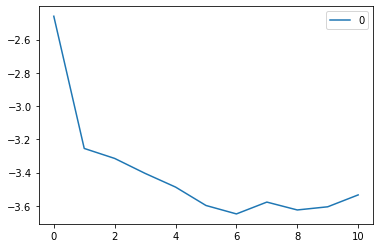

In [ ]:
pd.DataFrame(coherences).plot()

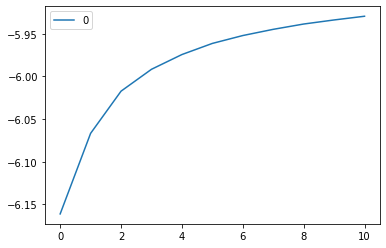

In [ ]:
pd.DataFrame(perplexities).plot()

2이 가장 적당..? -> passes 10

최적 passes   으로 고정 후 토픽 개수 구하기

In [ ]:
coherencesT=[]
perplexitiesT=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(2, 10):
    nwords = 50
    tic = time.time()
    ntopics = i
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=i, iterations=400, passes=10, random_state=0)
    print('ntopics',ntopics,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherencesT.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexitiesT.append(lda4.log_perplexity(corpus))

ntopics 2 15.298400402069092
Cpherence -2.098689084805013
Perplexity:  -6.061543383307119 


ntopics 3 15.311909437179565
Cpherence -2.2299958143601493
Perplexity:  -6.07264879634349 


ntopics 4 13.231692552566528
Cpherence -2.351397049670161
Perplexity:  -6.073160251085685 


ntopics 5 12.521389722824097
Cpherence -2.4890308079344963
Perplexity:  -6.059640816696842 


ntopics 6 11.814105749130249
Cpherence -2.5483224432430496
Perplexity:  -6.060041642492663 


ntopics 7 11.873229265213013
Cpherence -2.880958752997352
Perplexity:  -6.04788874335911 


ntopics 8 11.280468702316284
Cpherence -3.0125244608754898
Perplexity:  -6.030603926631741 


ntopics 9 11.141580820083618
Cpherence -3.2899651280313043
Perplexity:  -6.025193677763706 




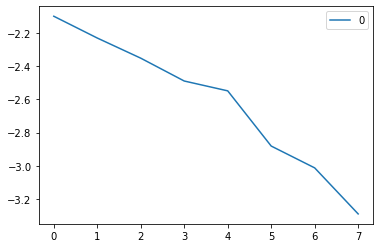

In [ ]:
pd.DataFrame(coherencesT).plot()

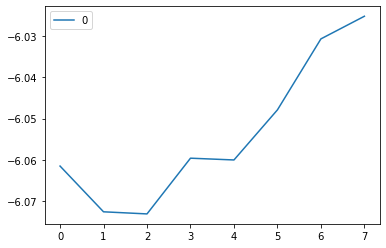

In [ ]:
pd.DataFrame(perplexitiesT).plot()

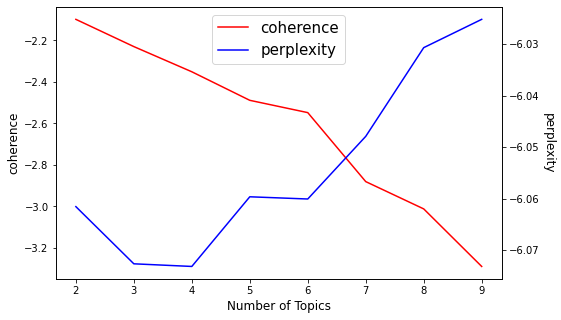

In [ ]:
fig, ax1 = plt.subplots(figsize = (8, 5))
x = [2,3,4,5,6,7,8,9]

ax1.set_xlabel('Number of Topics', fontsize = 12)
ax1.set_ylabel('coherence', rotation = 90, fontsize = 12)
line1 = ax1.plot(x, coherencesT, color = 'red', label = 'coherence')

ax2 =ax1.twinx()
ax2.set_ylabel('perplexity', rotation = -90, labelpad = 15, fontsize = 12)
line2 = ax2.plot(x, perplexitiesT, color = 'blue', label = 'perplexity')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', fontsize = 15)
# plt.title("H01F", fontsize = 20)
plt.show()

passes = 10, topics = 6로 결정!

In [ ]:
dataframe

,patent_abstract_y,H01F,H03K,H04M,H05K,H04B,GoodBad,lemmatization
2,"A screen plate, a packaging method, a display ...",0,0,0,1,0,1,"[plate, packaging, method, display, panel, dis..."
6,Disclosed herein is a system for drilling in a...,0,0,0,1,0,0,"[herein, system, multilayer, circuit, board, s..."
19,A low dielectric resin composition comprises a...,0,0,0,1,0,0,"[resin, composition, resin, epoxy, resin, cros..."
22,A device used for attaching a semiconductor de...,0,0,0,1,0,1,"[device, semiconductor, device, circuit, board..."
76,A component assembly includes a body having an...,0,0,0,1,0,1,"[component, body, electronics, component, face..."
...,...,...,...,...,...,...,...,...
24182,"Methods, systems, and apparatuses related to m...",0,0,0,1,0,1,"[method, system, apparatus, memory, operation,..."
24212,An optical unit with a shake correction functi...,0,0,0,1,0,1,"[unit, correction, function, body, module, bod..."
24216,An image pickup module includes a printed wiri...,0,0,0,1,0,1,"[image, pickup, module, board, component, sold..."
24230,A display panel including a substrate is discl...,0,0,0,1,0,1,"[display, panel, substrate, area, unit, line, ..."


In [ ]:
# 최종 모델 돌리기!

import gensim
from gensim import corpora

dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############

## LDA 모델 훈련시키기

NUM_TOPICS = 6 #################
PASSES = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary,  passes=PASSES, random_state=0) #passes는 알고리즘의 동작 횟수
topics = ldamodel.print_topics(num_words=20) #총 8개의 단어만 출력

for topic in topics:
    print(topic)

(0, '0.054*"portion" + 0.049*"display" + 0.030*"member" + 0.029*"area" + 0.028*"heat" + 0.026*"surface" + 0.025*"board" + 0.025*"device" + 0.022*"panel" + 0.020*"circuit" + 0.016*"housing" + 0.015*"connector" + 0.015*"side" + 0.012*"structure" + 0.012*"connection" + 0.011*"component" + 0.010*"image" + 0.009*"substrate" + 0.009*"frame" + 0.008*"module"')
(1, '0.034*"device" + 0.028*"system" + 0.025*"component" + 0.023*"air" + 0.021*"heat" + 0.017*"housing" + 0.015*"connector" + 0.013*"unit" + 0.012*"end" + 0.011*"rack" + 0.010*"data" + 0.010*"storage" + 0.010*"position" + 0.010*"switch" + 0.009*"section" + 0.009*"channel" + 0.009*"chassis" + 0.009*"resin" + 0.008*"control" + 0.008*"plurality"')
(2, '0.061*"surface" + 0.044*"plate" + 0.037*"substrate" + 0.024*"side" + 0.023*"base" + 0.020*"conductor" + 0.017*"component" + 0.017*"line" + 0.017*"device" + 0.016*"heat" + 0.014*"portion" + 0.011*"electrode" + 0.010*"end" + 0.009*"capacitor" + 0.009*"bar" + 0.008*"system" + 0.008*"segment" + 

In [ ]:
import pyLDAvis.gensim_models   

pyLDAvis.enable_notebook()  
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)  
pyLDAvis.display(vis)  

In [ ]:
# pyLDAvis html 저장   
pyLDAvis.save_html(vis, '/content/drive/MyDrive/Capstone/LDA/lda_result/H05K_10p_6T.html') ##############

In [ ]:
# 문서 별 토픽 분포 보기

def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,0.0,0.8081,"[(0, 0.80810887), (2, 0.16613974)]"
1,1,4.0,0.6204,"[(1, 0.3555432), (4, 0.62040144)]"
2,2,1.0,0.8034,"[(1, 0.8034248), (5, 0.1686204)]"
3,3,0.0,0.9720,"[(0, 0.9719584)]"
4,4,4.0,0.7386,"[(2, 0.23903465), (4, 0.7385719)]"
5,5,0.0,0.5667,"[(0, 0.5666932), (1, 0.22526656), (2, 0.189361..."
6,6,2.0,0.3732,"[(0, 0.1557616), (1, 0.16310547), (2, 0.373182..."
7,7,3.0,0.7091,"[(3, 0.7090858), (5, 0.27325013)]"
8,8,2.0,0.9474,"[(0, 0.010525633), (1, 0.01052351), (2, 0.9474..."
9,9,3.0,0.7606,"[(1, 0.21785077), (3, 0.7605587)]"


In [ ]:
topictable

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,0.0,0.8081,"[(0, 0.80810887), (2, 0.16613974)]"
1,1,4.0,0.6204,"[(1, 0.3555432), (4, 0.62040144)]"
2,2,1.0,0.8034,"[(1, 0.8034248), (5, 0.1686204)]"
3,3,0.0,0.9720,"[(0, 0.9719584)]"
4,4,4.0,0.7386,"[(2, 0.23903465), (4, 0.7385719)]"
...,...,...,...,...
1256,1256,1.0,0.8723,"[(1, 0.8723032), (4, 0.113093324)]"
1257,1257,4.0,0.7172,"[(2, 0.05128588), (4, 0.7172287), (5, 0.217475..."
1258,1258,0.0,0.9753,"[(0, 0.97529066)]"
1259,1259,2.0,0.5720,"[(0, 0.41237876), (2, 0.57200795)]"


In [ ]:
dataframe.reset_index(drop = True, inplace = True)

In [ ]:
final = pd.concat([dataframe,topictable.iloc[:,1:]],axis=1)
final

,patent_abstract_y,H01F,H03K,H04M,H05K,H04B,GoodBad,lemmatization,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,"A screen plate, a packaging method, a display ...",0,0,0,1,0,1,"[plate, packaging, method, display, panel, dis...",0.0,0.8081,"[(0, 0.80810887), (2, 0.16613974)]"
1,Disclosed herein is a system for drilling in a...,0,0,0,1,0,0,"[herein, system, multilayer, circuit, board, s...",4.0,0.6204,"[(1, 0.3555432), (4, 0.62040144)]"
2,A low dielectric resin composition comprises a...,0,0,0,1,0,0,"[resin, composition, resin, epoxy, resin, cros...",1.0,0.8034,"[(1, 0.8034248), (5, 0.1686204)]"
3,A device used for attaching a semiconductor de...,0,0,0,1,0,1,"[device, semiconductor, device, circuit, board...",0.0,0.9720,"[(0, 0.9719584)]"
4,A component assembly includes a body having an...,0,0,0,1,0,1,"[component, body, electronics, component, face...",4.0,0.7386,"[(2, 0.23903465), (4, 0.7385719)]"
...,...,...,...,...,...,...,...,...,...,...,...
1256,"Methods, systems, and apparatuses related to m...",0,0,0,1,0,1,"[method, system, apparatus, memory, operation,...",1.0,0.8723,"[(1, 0.8723032), (4, 0.113093324)]"
1257,An optical unit with a shake correction functi...,0,0,0,1,0,1,"[unit, correction, function, body, module, bod...",4.0,0.7172,"[(2, 0.05128588), (4, 0.7172287), (5, 0.217475..."
1258,An image pickup module includes a printed wiri...,0,0,0,1,0,1,"[image, pickup, module, board, component, sold...",0.0,0.9753,"[(0, 0.97529066)]"
1259,A display panel including a substrate is discl...,0,0,0,1,0,1,"[display, panel, substrate, area, unit, line, ...",2.0,0.5720,"[(0, 0.41237876), (2, 0.57200795)]"


In [ ]:
final.to_csv('/content/drive/MyDrive/Capstone/data/LDA/LDA_H05K_final_2T.csv')

In [ ]:
t = pd.read_csv('/content/drive/MyDrive/Project/Capstone/data/LDA/LDA_H03H_final.csv')

In [ ]:
t.groupby('가장 비중이 높은 토픽').mean()

,Unnamed: 0,H02N,H03G,H04Q,H03H,H01B,H04J,GoodBad,가장 높은 토픽의 비중
가장 비중이 높은 토픽,,,,,,,,,
0.0,104.821429,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.785714,0.843721
1.0,140.490566,0.0,0.000000,0.0,1.0,0.018868,0.000000,0.754717,0.821119
2.0,107.714286,0.0,0.035714,0.0,1.0,0.000000,0.000000,0.964286,0.901404
3.0,117.692308,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.661538,0.814831
4.0,115.651515,0.0,0.015152,0.0,1.0,0.000000,0.015152,0.969697,0.876289


In [ ]:
final[final['가장 높은 토픽의 비중']<0.7]['가장 비중이 높은 토픽'].value_counts()

4.0    147
0.0    136
1.0    111
2.0    100
3.0     73
Name: 가장 비중이 높은 토픽, dtype: int64

In [ ]:
browsing_data = final[final['가장 높은 토픽의 비중']<0.7]
no_browsing_data = final[final['가장 높은 토픽의 비중']>=0.7]
browsing_data

,patent_abstract_y,H01F,H03K,H04M,H05K,H04B,GoodBad,lemmatization,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
2,A low dielectric resin composition comprises a...,0,0,0,1,0,0,"[resin, composition, resin, epoxy, resin, cros...",7.0,0.6749,"[(1, 0.20018001), (5, 0.09885537), (7, 0.67490..."
3,A device used for attaching a semiconductor de...,0,0,0,1,0,1,"[device, semiconductor, device, circuit, board...",0.0,0.6907,"[(0, 0.69071287), (2, 0.20275496), (5, 0.08566..."
4,A component assembly includes a body having an...,0,0,0,1,0,1,"[component, body, electronics, component, face...",4.0,0.6524,"[(0, 0.059443206), (4, 0.6524286), (6, 0.26728..."
5,A CPU of a controller of a mounting device det...,0,0,0,1,0,1,"[cpu, controller, device, determines, aperture...",1.0,0.3750,"[(0, 0.34660348), (1, 0.37496737), (2, 0.13146..."
6,A high-efficiency water-cooled heat dissipatio...,0,0,0,1,0,1,"[efficiency, water, heat, dissipation, device,...",1.0,0.4553,"[(0, 0.07538318), (1, 0.45529136), (2, 0.45286..."
...,...,...,...,...,...,...,...,...,...,...,...
1256,"Methods, systems, and apparatuses related to m...",0,0,0,1,0,1,"[method, system, apparatus, memory, operation,...",6.0,0.5990,"[(3, 0.13674624), (5, 0.25065425), (6, 0.59900..."
1257,An optical unit with a shake correction functi...,0,0,0,1,0,1,"[unit, correction, function, body, module, bod...",4.0,0.6347,"[(4, 0.6347265), (5, 0.27499208), (6, 0.072902..."
1258,An image pickup module includes a printed wiri...,0,0,0,1,0,1,"[image, pickup, module, board, component, sold...",0.0,0.5108,"[(0, 0.510793), (2, 0.27050647), (5, 0.0969790..."
1259,A display panel including a substrate is discl...,0,0,0,1,0,1,"[display, panel, substrate, area, unit, line, ...",2.0,0.6140,"[(0, 0.36852407), (2, 0.61401963)]"


In [ ]:
browsing_data['GoodBad'].value_counts()

1    578
0    164
Name: GoodBad, dtype: int64

레이블에 속하는 GoodBad이 데이터 중 browsing data에 속하는 데이터의 비율

In [ ]:
browsing_data['GoodBad'].value_counts()[1]/dataframe[dataframe['GoodBad']==1].shape[0]

0.5850202429149798

In [ ]:
browsing_data['GoodBad'].value_counts()[0]/dataframe[dataframe['GoodBad']==0].shape[0]

0.6007326007326007

# H04B

In [ ]:
dataframe = df[df['H04B']==1]
dataframe

,patent_abstract_y,H01F,H03K,H04M,H05K,H04B,GoodBad,lemmatization
9,"Methods, systems, and apparatus, including com...",0,0,0,0,1,1,"[method, system, computer, program, computer, ..."
23,"Disclosed is a method, a computer program appl...",0,0,0,0,1,0,"[computer, program, application, system, commu..."
24,A system is provided in which a first waveguid...,0,0,0,0,1,1,"[system, resonator, end, resonator, waveguide,..."
35,Aspects of the disclosure provide an optical c...,0,0,0,0,1,0,"[aspect, disclosure, communication, system, sy..."
36,A broadcast signal transmitter includes a firs...,0,0,0,0,1,1,"[transmitter, bit, bit, core, layer, data, cor..."
...,...,...,...,...,...,...,...,...
24227,A method and apparatus are disclosed. In an ex...,0,0,0,0,1,1,"[method, apparatus, example, perspective, user..."
24249,"A multi-channel, multi-band system for wireles...",0,0,0,0,1,0,"[channel, multi, band, system, communication, ..."
24265,One embodiment is directed to a radio access n...,0,0,0,0,1,1,"[embodiment, radio, access, network, system, b..."
24271,"In an example embodiment, a communication syst...",0,0,0,0,1,1,"[example, embodiment, communication, system, e..."


In [ ]:
import time
dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############


파라미터 튜닝

In [ ]:
# epoch 반복에 따른 coherence변화

import time

coherences=[]
perplexities=[]
passes=[]

dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############


for i in range(11):

    ntopics, nwords = 10, 50
    if i==0:
        p=1
    else:
        p=i*5
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=p, random_state=0)
    print('epoch',p,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherences.append(coherence)

    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexities.append(lda4.log_perplexity(corpus))

epoch 1 4.810810565948486
Cpherence -2.07347974923666
Perplexity:  -6.244072895334561 




epoch 5 12.427804708480835
Cpherence -2.5719285612344733
Perplexity:  -6.1479792457056 


epoch 10 20.493367433547974
Cpherence -2.8708563645438554
Perplexity:  -6.089466256427112 


epoch 15 28.41541886329651
Cpherence -3.0092276811961787
Perplexity:  -6.058621926592675 


epoch 20 35.91243505477905
Cpherence -2.9980201518034213
Perplexity:  -6.0403288890193085 


epoch 25 43.16381216049194
Cpherence -2.9272026081466604
Perplexity:  -6.029168183285587 


epoch 30 49.89050626754761
Cpherence -3.10566306652938
Perplexity:  -6.021065213435984 


epoch 35 56.34622550010681
Cpherence -3.0090597224672857
Perplexity:  -6.015292751407804 


epoch 40 62.73343777656555
Cpherence -3.1556478956041634
Perplexity:  -6.010925866880253 


epoch 45 69.10638642311096
Cpherence -3.251905457692613
Perplexity:  -6.0075258432853476 


epoch 50 76.49795007705688
Cpherence -3.27204639572635
Perplexity:  -6.004913551317706 




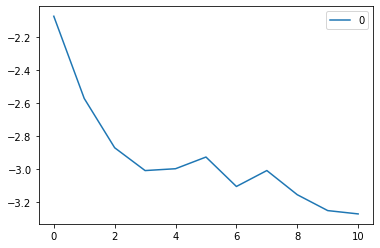

In [ ]:
pd.DataFrame(coherences).plot()

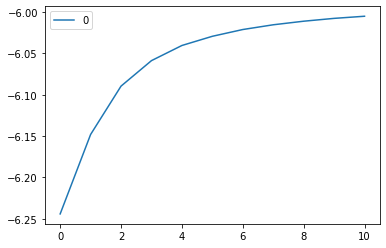

In [ ]:
pd.DataFrame(perplexities).plot()

5이 가장 적당..? -> passes 25

최적 passes   으로 고정 후 토픽 개수 구하기

In [ ]:
coherencesT=[]
perplexitiesT=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(2, 10):
    nwords = 50
    tic = time.time()
    ntopics = i
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=i, iterations=400, passes=25, random_state=0)
    print('ntopics',ntopics,time.time() - tic)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherencesT.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexitiesT.append(lda4.log_perplexity(corpus))

ntopics 2 47.59877872467041
Cpherence -1.9345139749203881
Perplexity:  -6.096790046201389 


ntopics 3 53.05369162559509
Cpherence -1.9848003189502632
Perplexity:  -6.085347028811659 


ntopics 4 46.33393597602844
Cpherence -2.0190795082325477
Perplexity:  -6.080640578591469 


ntopics 5 45.712809324264526
Cpherence -2.277433480885944
Perplexity:  -6.060151923835346 


ntopics 6 45.58846473693848
Cpherence -2.4605024250198664
Perplexity:  -6.059659948566786 


ntopics 7 44.09583783149719
Cpherence -2.63598169936571
Perplexity:  -6.047948324645592 


ntopics 8 44.38983941078186
Cpherence -2.849259806481091
Perplexity:  -6.037907790993904 


ntopics 9 42.290324449539185
Cpherence -2.854474990780834
Perplexity:  -6.0236226087672495 




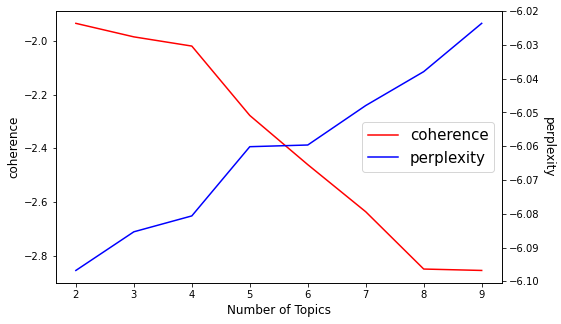

In [ ]:
fig, ax1 = plt.subplots(figsize = (8, 5))
x = [2,3,4,5,6,7,8,9]

ax1.set_xlabel('Number of Topics', fontsize = 12)
ax1.set_ylabel('coherence', rotation = 90, fontsize = 12)
line1 = ax1.plot(x, coherencesT, color = 'red', label = 'coherence')

ax2 =ax1.twinx()
ax2.set_ylabel('perplexity', rotation = -90, labelpad = 15, fontsize = 12)
line2 = ax2.plot(x, perplexitiesT, color = 'blue', label = 'perplexity')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='center right', fontsize = 15)
# plt.title("H01F", fontsize = 20)
plt.show()

passes = 25, topics = 4로 결정!

In [ ]:
dataframe

,patent_abstract_y,H01F,H03K,H04M,H05K,H04B,GoodBad,lemmatization
9,"Methods, systems, and apparatus, including com...",0,0,0,0,1,1,"[method, system, computer, program, computer, ..."
23,"Disclosed is a method, a computer program appl...",0,0,0,0,1,0,"[computer, program, application, system, commu..."
24,A system is provided in which a first waveguid...,0,0,0,0,1,1,"[system, resonator, end, resonator, waveguide,..."
35,Aspects of the disclosure provide an optical c...,0,0,0,0,1,0,"[aspect, disclosure, communication, system, sy..."
36,A broadcast signal transmitter includes a firs...,0,0,0,0,1,1,"[transmitter, bit, bit, core, layer, data, cor..."
...,...,...,...,...,...,...,...,...
24227,A method and apparatus are disclosed. In an ex...,0,0,0,0,1,1,"[method, apparatus, example, perspective, user..."
24249,"A multi-channel, multi-band system for wireles...",0,0,0,0,1,0,"[channel, multi, band, system, communication, ..."
24265,One embodiment is directed to a radio access n...,0,0,0,0,1,1,"[embodiment, radio, access, network, system, b..."
24271,"In an example embodiment, a communication syst...",0,0,0,0,1,1,"[example, embodiment, communication, system, e..."


In [ ]:
# 최종 모델 돌리기!

import gensim
from gensim import corpora

dictionary = corpora.Dictionary(dataframe['lemmatization'])#############
corpus = [dictionary.doc2bow(text) for text in dataframe['lemmatization']]###############

## LDA 모델 훈련시키기

NUM_TOPICS = 4 #################
PASSES = 25
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary,  passes=PASSES, random_state=0) #passes는 알고리즘의 동작 횟수
topics = ldamodel.print_topics(num_words=20) #총 8개의 단어만 출력

for topic in topics:
    print(topic)

(0, '0.035*"communication" + 0.035*"information" + 0.035*"transmission" + 0.031*"unit" + 0.029*"power" + 0.025*"station" + 0.024*"signal" + 0.024*"method" + 0.021*"channel" + 0.019*"system" + 0.018*"base" + 0.016*"control" + 0.016*"resource" + 0.015*"data" + 0.015*"device" + 0.013*"frequency" + 0.011*"time" + 0.010*"wireless" + 0.010*"reference" + 0.010*"configuration"')
(1, '0.051*"signal" + 0.035*"circuit" + 0.028*"frequency" + 0.027*"output" + 0.016*"antenna" + 0.016*"power" + 0.015*"module" + 0.015*"input" + 0.013*"phase" + 0.013*"portion" + 0.011*"voltage" + 0.011*"system" + 0.010*"surface" + 0.009*"radio" + 0.009*"plurality" + 0.009*"device" + 0.008*"component" + 0.008*"amplifier" + 0.007*"end" + 0.007*"filter"')
(2, '0.059*"beam" + 0.051*"plurality" + 0.026*"channel" + 0.024*"antenna" + 0.021*"system" + 0.020*"signal" + 0.018*"port" + 0.015*"node" + 0.013*"element" + 0.012*"reference" + 0.012*"path" + 0.011*"network" + 0.011*"method" + 0.011*"group" + 0.010*"array" + 0.009*"comm

In [ ]:
import pyLDAvis.gensim_models   

pyLDAvis.enable_notebook()  
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)  
pyLDAvis.display(vis)  

In [ ]:
# pyLDAvis html 저장   
pyLDAvis.save_html(vis, '/content/drive/MyDrive/Capstone/LDA/lda_result/H04B_25p_4T.html') ##############

In [ ]:
# 문서 별 토픽 분포 보기

def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,3.0,0.8226,"[(0, 0.16533834), (3, 0.82258356)]"
1,1,3.0,0.9784,"[(3, 0.9784114)]"
2,2,1.0,0.5870,"[(0, 0.013014725), (1, 0.58696586), (2, 0.3872..."
3,3,2.0,0.9771,"[(2, 0.9770901)]"
4,4,0.0,0.6985,"[(0, 0.6984974), (1, 0.29341248)]"
5,5,0.0,0.6386,"[(0, 0.63855475), (1, 0.011252128), (2, 0.0121..."
6,6,0.0,0.6129,"[(0, 0.6129055), (1, 0.25619972), (3, 0.123626..."
7,7,1.0,0.9124,"[(0, 0.010168776), (1, 0.9123919), (2, 0.01017..."
8,8,2.0,0.5458,"[(0, 0.43882692), (2, 0.54575944)]"
9,9,3.0,0.8552,"[(1, 0.12927423), (3, 0.85524344)]"


In [ ]:
topictable

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,3.0,0.8226,"[(0, 0.16533834), (3, 0.82258356)]"
1,1,3.0,0.9784,"[(3, 0.9784114)]"
2,2,1.0,0.5870,"[(0, 0.013014725), (1, 0.58696586), (2, 0.3872..."
3,3,2.0,0.9771,"[(2, 0.9770901)]"
4,4,0.0,0.6985,"[(0, 0.6984974), (1, 0.29341248)]"
...,...,...,...,...
1982,1982,2.0,0.5442,"[(0, 0.44254842), (2, 0.5441885)]"
1983,1983,1.0,0.8319,"[(1, 0.83185154), (2, 0.15582867)]"
1984,1984,3.0,0.5345,"[(0, 0.4555282), (3, 0.53445566)]"
1985,1985,2.0,0.8798,"[(2, 0.87981606), (3, 0.10514327)]"


In [ ]:
dataframe.reset_index(drop = True, inplace = True)

In [ ]:
final = pd.concat([dataframe,topictable.iloc[:,1:]],axis=1)
final

,patent_abstract_y,H01F,H03K,H04M,H05K,H04B,GoodBad,lemmatization,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,"Methods, systems, and apparatus, including com...",0,0,0,0,1,1,"[method, system, computer, program, computer, ...",3.0,0.8226,"[(0, 0.16533834), (3, 0.82258356)]"
1,"Disclosed is a method, a computer program appl...",0,0,0,0,1,0,"[computer, program, application, system, commu...",3.0,0.9784,"[(3, 0.9784114)]"
2,A system is provided in which a first waveguid...,0,0,0,0,1,1,"[system, resonator, end, resonator, waveguide,...",1.0,0.5870,"[(0, 0.013014725), (1, 0.58696586), (2, 0.3872..."
3,Aspects of the disclosure provide an optical c...,0,0,0,0,1,0,"[aspect, disclosure, communication, system, sy...",2.0,0.9771,"[(2, 0.9770901)]"
4,A broadcast signal transmitter includes a firs...,0,0,0,0,1,1,"[transmitter, bit, bit, core, layer, data, cor...",0.0,0.6985,"[(0, 0.6984974), (1, 0.29341248)]"
...,...,...,...,...,...,...,...,...,...,...,...
1982,A method and apparatus are disclosed. In an ex...,0,0,0,0,1,1,"[method, apparatus, example, perspective, user...",2.0,0.5442,"[(0, 0.44254842), (2, 0.5441885)]"
1983,"A multi-channel, multi-band system for wireles...",0,0,0,0,1,0,"[channel, multi, band, system, communication, ...",1.0,0.8319,"[(1, 0.83185154), (2, 0.15582867)]"
1984,One embodiment is directed to a radio access n...,0,0,0,0,1,1,"[embodiment, radio, access, network, system, b...",3.0,0.5345,"[(0, 0.4555282), (3, 0.53445566)]"
1985,"In an example embodiment, a communication syst...",0,0,0,0,1,1,"[example, embodiment, communication, system, e...",2.0,0.8798,"[(2, 0.87981606), (3, 0.10514327)]"


In [ ]:
final.to_csv('/content/drive/MyDrive/Capstone/data/LDA/LDA_H04B_final.csv')

In [ ]:
final[final['가장 높은 토픽의 비중']<0.7]['가장 비중이 높은 토픽'].value_counts()

3.0    239
5.0    228
4.0    181
1.0    156
0.0    138
2.0     88
Name: 가장 비중이 높은 토픽, dtype: int64

In [ ]:
browsing_data = final[final['가장 높은 토픽의 비중']<0.7]
no_browsing_data = final[final['가장 높은 토픽의 비중']>=0.7]
browsing_data

,patent_abstract_y,H01F,H03K,H04M,H05K,H04B,GoodBad,lemmatization,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
2,A system is provided in which a first waveguid...,0,0,0,0,1,1,"[system, resonator, end, resonator, waveguide,...",4.0,0.6815,"[(1, 0.2864592), (4, 0.6814668)]"
3,Aspects of the disclosure provide an optical c...,0,0,0,0,1,0,"[aspect, disclosure, communication, system, sy...",2.0,0.5632,"[(1, 0.41759932), (2, 0.56318456)]"
4,A broadcast signal transmitter includes a firs...,0,0,0,0,1,1,"[transmitter, bit, bit, core, layer, data, cor...",5.0,0.5909,"[(1, 0.13131778), (4, 0.27015853), (5, 0.59086..."
5,This disclosure relates to performing grouped ...,0,0,0,0,1,1,"[disclosure, mimo, communication, communicatio...",5.0,0.6845,"[(3, 0.2117319), (4, 0.08179086), (5, 0.6844896)]"
8,There is provided a solution for transmitting ...,0,0,0,0,1,0,"[solution, signal, aspect, method, network, no...",5.0,0.6478,"[(2, 0.20811594), (3, 0.12971333), (5, 0.64776..."
...,...,...,...,...,...,...,...,...,...,...,...
1978,A method for downlink signal transmission and ...,0,0,0,0,1,1,"[method, transmission, device, method, operati...",5.0,0.5483,"[(3, 0.43346405), (5, 0.54833674)]"
1979,"Methods, systems, and devices for wireless com...",0,0,0,0,1,1,"[method, system, device, communication, system...",2.0,0.4941,"[(2, 0.49414262), (3, 0.41564918), (5, 0.07657..."
1980,Provided is a node unit which is branch-connec...,0,0,0,0,1,1,"[unit, branch, communication, node, transport,...",0.0,0.6962,"[(0, 0.6961597), (2, 0.2914103)]"
1981,Methods and systems for modulating an amplifie...,0,0,0,0,1,1,"[method, system, power, supply, output, power,...",4.0,0.4506,"[(1, 0.30041668), (3, 0.2280313), (4, 0.450585..."


In [ ]:
browsing_data['GoodBad'].value_counts()

1    870
0    160
Name: GoodBad, dtype: int64

레이블에 속하는 GoodBad이 데이터 중 browsing data에 속하는 데이터의 비율

In [ ]:
browsing_data['GoodBad'].value_counts()[1]/dataframe[dataframe['GoodBad']==1].shape[0]

0.514488468361916

In [ ]:
browsing_data['GoodBad'].value_counts()[0]/dataframe[dataframe['GoodBad']==0].shape[0]

0.5405405405405406

In [ ]:
H05list = []
for i in true.columns.tolist(): 
  if 'H05' in i: 
    H05list.append(i)

In [ ]:
H05list

['H05B', 'H05C', 'H05F', 'H05G', 'H05H', 'H05K']

In [ ]:
for i in H05list: 
  print(str(i),'레이블의 특허 개수: ', true[true[i]==1].shape[0])

H05B 레이블의 특허 개수:  666
H05C 레이블의 특허 개수:  0
H05F 레이블의 특허 개수:  11
H05G 레이블의 특허 개수:  41
H05H 레이블의 특허 개수:  64
H05K 레이블의 특허 개수:  1261


In [ ]:
brbr = pd.read_csv('/content/drive/MyDrive/Project/Capstone/data/wd(0.005)_lr(1e-5)_raw_epoch6_pred_label.csv')

In [ ]:
brbr.columns.tolist()[2:]

['H01B',
 'H01C',
 'H01F',
 'H01G',
 'H01H',
 'H01J',
 'H01K',
 'H01L',
 'H01M',
 'H01P',
 'H01Q',
 'H01R',
 'H01S',
 'H01T',
 'H02B',
 'H02G',
 'H02H',
 'H02J',
 'H02K',
 'H02M',
 'H02N',
 'H02P',
 'H02S',
 'H03B',
 'H03C',
 'H03D',
 'H03F',
 'H03G',
 'H03H',
 'H03J',
 'H03K',
 'H03L',
 'H03M',
 'H04B',
 'H04H',
 'H04J',
 'H04K',
 'H04L',
 'H04M',
 'H04N',
 'H04Q',
 'H04R',
 'H04S',
 'H04T',
 'H04W',
 'H05B',
 'H05C',
 'H05F',
 'H05G',
 'H05H',
 'H05K',
 'H99Z']

<BarContainer object of 52 artists>

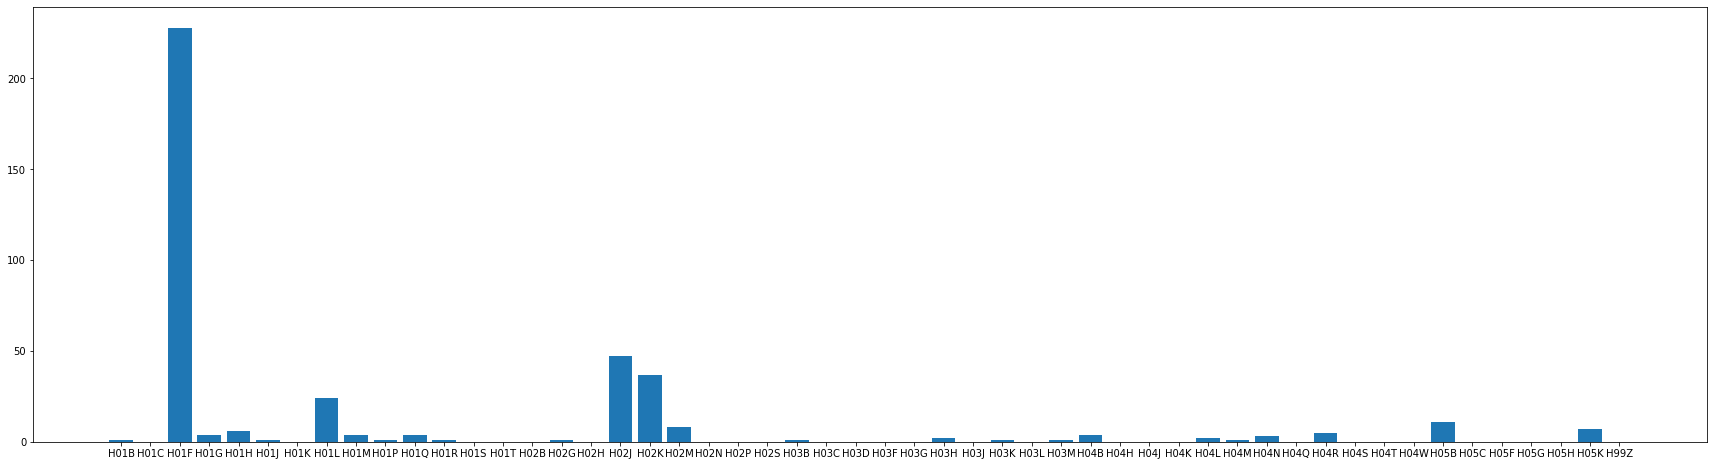

In [ ]:
plt.figure(figsize = (30, 8))
plt.bar(brbr.columns.tolist()[2:], brbr.loc[true[true['H01F']==1].index.tolist(),:].iloc[:,2:].sum())


In [ ]:
brbr[brbr['H04R']==1].index.tolist()

[75,
 104,
 120,
 207,
 236,
 248,
 443,
 456,
 462,
 516,
 676,
 717,
 750,
 958,
 960,
 1101,
 1104,
 1147,
 1190,
 1316,
 1347,
 1378,
 1483,
 1484,
 1490,
 1508,
 1518,
 1530,
 1564,
 1571,
 1615,
 1638,
 1656,
 1715,
 1742,
 1822,
 1837,
 1876,
 1949,
 2059,
 2070,
 2113,
 2117,
 2131,
 2183,
 2236,
 2350,
 2414,
 2429,
 2444,
 2495,
 2537,
 2558,
 2633,
 2722,
 2754,
 2769,
 2785,
 2908,
 2921,
 2925,
 2988,
 3022,
 3163,
 3185,
 3223,
 3234,
 3289,
 3296,
 3307,
 3350,
 3357,
 3600,
 3606,
 3617,
 3762,
 3773,
 3807,
 3856,
 3870,
 3908,
 3945,
 3988,
 4003,
 4010,
 4024,
 4206,
 4237,
 4356,
 4438,
 4507,
 4558,
 4575,
 4578,
 4714,
 4748,
 4750,
 4769,
 4776,
 4838,
 4887,
 4951,
 4975,
 4977,
 5035,
 5039,
 5066,
 5164,
 5185,
 5194,
 5198,
 5207,
 5240,
 5266,
 5358,
 5387,
 5419,
 5521,
 5524,
 5570,
 5630,
 5671,
 5806,
 5812,
 5818,
 5819,
 5821,
 5867,
 5868,
 5929,
 5964,
 5971,
 5999,
 6014,
 6048,
 6058,
 6064,
 6136,
 6142,
 6156,
 6238,
 6378,
 6416,
 6479,
 6581,
 

TRUE LABEL중 H04인 애들 가지고 와서 어떤 서브클래스로 예측했나 살펴보기

In [ ]:
h04_df = []
for i in H04list:
  h04_df.append(true[true[i]==1])

In [ ]:
hhh = pd.concat([h04_df[0],h04_df[1]],axis = 0)
for i in range(2, len(h04_df)):
  hhh = pd.concat([hhh, h04_df[i]], axis = 0)

hhh

,patent_abstract_y,H01B,H01C,H01F,H01G,H01H,H01J,H01K,H01L,H01M,...,H04T,H04W,H05B,H05C,H05F,H05G,H05H,H05K,H99Z,GoodBad
9,"Methods, systems, and apparatus, including com...",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
23,"Disclosed is a method, a computer program appl...",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
24,A system is provided in which a first waveguid...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
35,Aspects of the disclosure provide an optical c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,A broadcast signal transmitter includes a firs...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24262,A server for and a method of providing sensing...,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
24264,A combination of target images and control ima...,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
24265,One embodiment is directed to a radio access n...,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
24268,Techniques are provided for providing multi-fa...,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
hhh = hhh.drop_duplicates()

<BarContainer object of 52 artists>

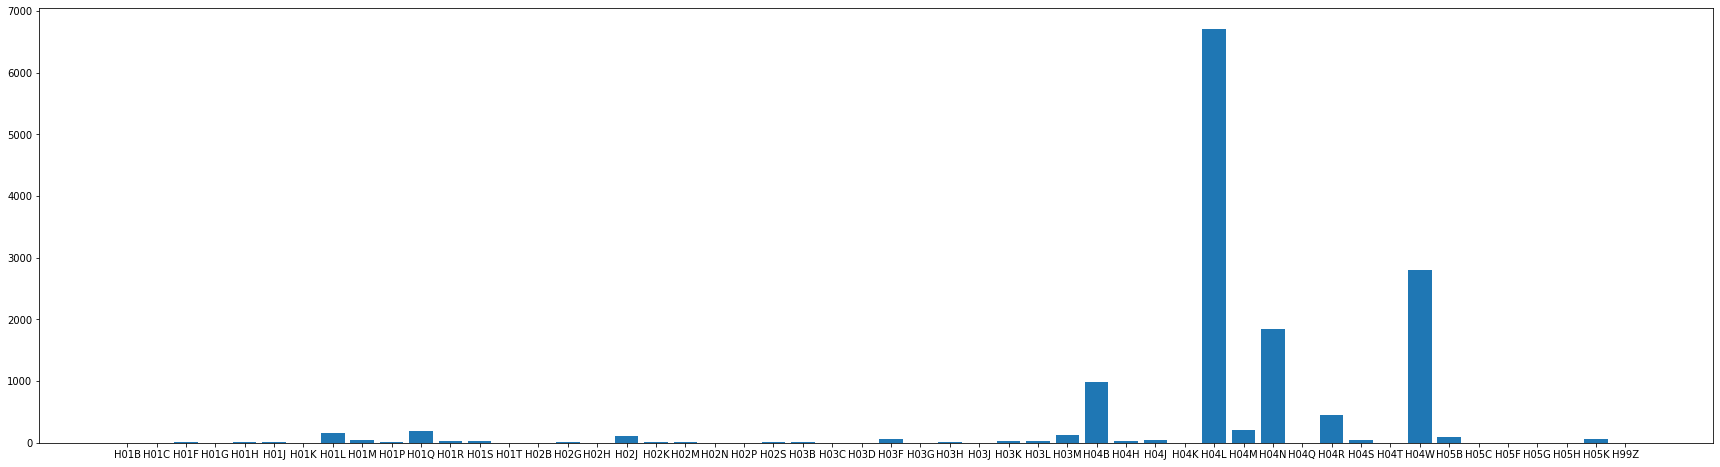

In [ ]:
plt.figure(figsize = (30, 8))
plt.bar(brbr.columns.tolist()[2:], brbr.loc[hhh.iloc[:,2:].index.tolist(),:].sum()[2:])

In [ ]:
brbr.loc[hhh.iloc[:,2:].index.tolist(),:].sum()[2:]

H01B       3
H01C       0
H01F      12
H01G       0
H01H      10
H01J      12
H01K       0
H01L     152
H01M      44
H01P      16
H01Q     185
H01R      35
H01S      24
H01T       0
H02B       0
H02G      17
H02H       1
H02J     111
H02K      14
H02M       9
H02N       0
H02P       1
H02S       7
H03B       7
H03C       0
H03D       0
H03F      67
H03G       0
H03H      19
H03J       0
H03K      29
H03L      27
H03M     128
H04B     993
H04H      22
H04J      40
H04K       0
H04L    6715
H04M     202
H04N    1847
H04Q       2
H04R     447
H04S      40
H04T       0
H04W    2797
H05B      87
H05C       0
H05F       0
H05G       0
H05H       0
H05K      69
H99Z       0
dtype: object

In [ ]:
import pandas as pd

In [ ]:
f = pd.read_csv('/content/drive/MyDrive/Project/Capstone/data/LDA/LDA_H01F_final.csv')

In [ ]:
from ast import literal_eval
f['lemmatization'] = f['lemmatization'].apply(literal_eval)

In [ ]:
f

,Unnamed: 0,patent_abstract_y,H01F,H03K,H04M,H05K,H04B,GoodBad,lemmatization,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,A switch-mode DC-DC power converter includes o...,1,0,0,0,0,1,"['switch', 'mode', 'dc', 'power', 'converter',...",0.0,0.9038,"[(0, 0.9037795), (3, 0.07809596)]"
1,1,A power transmission circuit is connected to a...,1,0,0,0,0,0,"['power', 'transmission', 'circuit', 'power', ...",3.0,0.5960,"[(3, 0.5960291), (4, 0.39031726)]"
2,2,A method for producing a sintered R-T-B based ...,1,0,0,0,0,0,"['method', 'b', 'magnet', 'step', 'b', 'magnet...",2.0,0.6242,"[(1, 0.36026052), (2, 0.62416846)]"
3,3,"In an embodiment, an electronic component incl...",1,0,0,1,0,1,"['component', 'part', 'rectangular', 'shape', ...",4.0,0.9753,"[(4, 0.9753115)]"
4,4,Some aspects pertain to an inductor apparatus ...,1,0,0,0,0,1,"['aspect', 'inductor', 'apparatus', 'metal', '...",4.0,0.9790,"[(4, 0.9790389)]"
...,...,...,...,...,...,...,...,...,...,...,...,...
436,436,One object is to provide an electronic compone...,1,0,0,1,0,1,"['provide', 'component', 'standoff', 'solder',...",4.0,0.7076,"[(0, 0.07201667), (4, 0.70763385), (5, 0.20746..."
437,437,A reactor includes a core body; a first end pl...,1,0,0,0,0,1,"['reactor', 'core', 'body', 'end', 'plate', 'e...",4.0,0.4200,"[(1, 0.32304597), (4, 0.42002583), (5, 0.23606..."
438,438,An electrical isolation device including a sup...,1,0,0,0,0,1,"['isolation', 'device', 'support', 'thickness'...",3.0,0.5326,"[(3, 0.5325783), (4, 0.43938425)]"
439,439,An electromagnetic linear actuator is provided...,1,0,0,0,0,1,"['actuator', 'housing', 'section', 'end', 'pie...",5.0,0.7558,"[(2, 0.22742048), (5, 0.75580096)]"


In [ ]:
f[f['가장 비중이 높은 토픽']==2.0]['GoodBad'].value_counts()[1]/f[f['GoodBad']==1].shape[0]

0.12956810631229235

In [ ]:
f[f['가장 비중이 높은 토픽']==2.0]['GoodBad'].value_counts()[0]/f[f['GoodBad']==0].shape[0]

0.12857142857142856

In [ ]:
f[f['가장 비중이 높은 토픽']==2.0]['GoodBad'].value_counts()

1    39
0    18
Name: GoodBad, dtype: int64

In [ ]:
a = f[(f['가장 비중이 높은 토픽']==2.0) & f['GoodBad']==1]['lemmatization'].values.tolist()
browse = pd.DataFrame()
from tqdm import tqdm
for i in tqdm(range(len(a))) : 
  browse[str(i)] = a[i][:5]
browse

100%|██████████| 39/39 [00:00<00:00, 1765.13it/s]


,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,device,frequency,apparatus,device,comprises,tunnel,device,method,method,device,...,sensor,assembly,example,process,magnet,hand,sensor,user,adjustment,device
1,housing,multiplexer,method,frame,redistribution,junction,structure,valve,lamination,light,...,sensor,key,embodiment,deposition,magnet,device,core,input,device,light
2,battery,frequency,disclosure,display,layer,structure,layer,fluid,stack,panel,...,plane,assembly,memory,dense,material,device,plane,device,magnet,panel
3,coil,multiplexer,relate,member,planar,planar,heusler,system,machine,plurality,...,magnetoresistive,depression,operation,film,magnet,board,side,input,rotation,plurality
4,field,structure,device,member,device,reference,compound,time,step,housing,...,sensor,force,method,material,material,magnet,plunger,control,axis,housing


In [ ]:
a = f[(f['가장 비중이 높은 토픽']==2.0) & f['GoodBad']==0]['lemmatization'].values.tolist()
browse = pd.DataFrame()
from tqdm import tqdm
for i in tqdm(range(len(a))) : 
  browse[str(i)] = a[i][:5]
browse

 23%|██▎       | 92/402 [00:00<00:00, 914.38it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """
100%|██████████| 402/402 [00:00<00:00, 1144.19it/s]


,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
0,switch,power,method,component,aspect,method,system,invention,system,magneto,...,example,property,disclosure,performance,article,provide,reactor,isolation,actuator,coil
1,mode,transmission,b,part,inductor,precursor,voltage,power,device,caloric,...,invention,liquid,substrate,magnet,pigment,component,core,device,housing,component
2,dc,circuit,magnet,rectangular,apparatus,devitrification,bank,transfer,imd,diode,...,apparatus,transducer,base,magnet,flake,standoff,body,support,section,method
3,power,power,step,shape,metal,precursor,section,unit,coil,assembly,...,load,coil,evaporation,composition,form,solder,end,thickness,end,manufacturing
4,converter,transmission,b,coil,layer,devitrification,capacitor,power,sense,magneto,...,power,liquid,process,formula,pattern,component,plate,length,piece,component


In [ ]:
a = f[(f['가장 비중이 높은 토픽']==4.0) & f['GoodBad']==1]['lemmatization'].values.tolist()
browse = pd.DataFrame()
from tqdm import tqdm
for i in tqdm(range(len(a))) : 
  browse[str(i)] = a[i][:5]
browse

100%|██████████| 96/96 [00:00<00:00, 3573.61it/s]


,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,component,aspect,system,system,coil,group,system,package,vibration,igniter,...,system,terminal,inductor,vehicle,system,side,coil,structure,provide,reactor
1,part,inductor,voltage,device,unit,earth,implementation,carrier,actuator,ignition,...,operation,member,core,motor,device,compressor,unit,coil,component,core
2,rectangular,apparatus,bank,imd,plate,regenerator,inductance,structure,body,coil,...,generator,surface,coil,compressor,imd,system,coil,device,standoff,body
3,shape,metal,section,coil,coil,material,system,layer,number,end,...,mode,part,coil,compression,coil,compressor,wire,disclosure,solder,end
4,coil,layer,capacitor,sense,surface,particle,range,plurality,core,assembly,...,cool,wall,wound,unit,sense,housing,capacitor,attachment,component,plate


In [ ]:
a = f[(f['가장 비중이 높은 토픽']==4.0) & f['GoodBad']==0]['lemmatization'].values.tolist()
browse = pd.DataFrame()
from tqdm import tqdm
for i in tqdm(range(len(a))) : 
  browse[str(i)] = a[i][:5]
browse

  0%|          | 0/345 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """
100%|██████████| 345/345 [00:00<00:00, 1781.43it/s]


,0,1,2,3,4,5,6,7,8,9,...,335,336,337,338,339,340,341,342,343,344
0,switch,power,method,method,invention,magneto,invention,transformer,iron,mode,...,aspect,chip,example,property,disclosure,performance,article,isolation,actuator,coil
1,mode,transmission,b,precursor,power,caloric,magnet,yoke,loss,noise,...,disclosure,inductor,invention,liquid,substrate,magnet,pigment,device,housing,component
2,dc,circuit,magnet,devitrification,transfer,diode,amount,lamination,flux,filter,...,voltage,surface,apparatus,transducer,base,magnet,flake,support,section,method
3,power,power,step,precursor,unit,assembly,flux,plane,density,body,...,waveform,layer,load,coil,evaporation,composition,form,thickness,end,manufacturing
4,converter,transmission,b,devitrification,power,magneto,bulk,yoke,steel,coil,...,core,surface,power,liquid,process,formula,pattern,length,piece,component
